In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import scienceplots
plt.style.use('science')  # Requires matplotlib-style package

import seaborn as sns
from multiprocessing import Pool
from pprint import pprint
from IPython.display import clear_output

import os
from tqdm import tqdm
import json
os.chdir("../")
import src.utils as utils
import src.envs as envs
import src.models as mm

print(os.getcwd())
import main
from scipy.ndimage import convolve1d

from src.utils import setup_logger
logger = setup_logger(level=2)
logger(f"{logger}")

2025-01-30 11:52:45 | LoggerWrapper(name=MAIN,level=2, debugging=True, warning=True)


/Users/daniekru/Research/lab/minBandit


In [244]:
class Settings:

    verbose = False
    rounds = 2
    trials = 2
    reps = 10
    K = 10
    model = None
    load = True
    plot = False
    env = "v0"
    multiple = 1
    visual = False
    save = True
    idx = 4

In [245]:
def make_new_env(K: int, env_type: str, nb_trials: int=3) -> object:

    probabilities_set = np.random.normal(0.5, 0.2, (nb_trials, K)).clip(0, 1)
    
    # define the environment
    if env_type == "driftv0":
        env = envs.KABdriftv0(K=K,
                              probabilities_set=probabilities_set,
                              verbose=False,
                              tau=100)
    elif env_type == "sinv0":
        frequencies = np.random.uniform(0, 0.1, K)
        phases = np.random.uniform(0, 6.28, K)
        env = envs.KABsinv0(K=K,
                            frequencies=frequencies,
                            normalize=False,
                            phases=phases,
                            verbose=False)
    elif env_type == "sinv1":
        frequencies = np.random.uniform(0, 0.1, K)
        phases = np.random.uniform(0, 6.28, K)
        constants = np.random.uniform(0, 0.7, K//2)
        env = envs.KABsinv0(K=K,
                            frequencies=frequencies,
                            normalize=False,
                            phases=phases,
                            constants=constants,
                            verbose=False)
    elif env_type == "v0":
        env = envs.KABv0(K=K,
                         probabilities_set=probabilities_set,
                         verbose=False)
    else:
        raise NameError(f"\n==> {env_type=} not recognized")
    
    return env

---
## **single main**

#### study I

In [4]:
params = utils.load_model(idx=None)
pprint(params)

{0: '6_best.json',
 1: '14_best.json',
 2: '12_best.json',
 3: '18_best.json',
 4: '20_best.json',
 5: '1_best.json',
 6: '26_best.json',
 7: '16_best.json',
 8: '2_best.json',
 9: '10_best.json',
 10: '22_best.json',
 11: '8_best.json',
 12: '3_best.json',
 13: '24_best.json'}


Enter the model number:  6


{'alpha': 1.4,
 'alpha_lr': 2.9,
 'beta': 3.1,
 'beta_lr': 8.1,
 'dur_post': 2256,
 'dur_pre': 2712,
 'gain': 0.3,
 'lr': 0.022,
 'lr_function': 'gaussian',
 'mu': -1.1,
 'mu_lr': -0.6,
 'r': 0.93,
 'r_lr': 0.07,
 'sigma': 2.3,
 'sigma_lr': 6.0,
 'tau_u': 9,
 'tau_v': 42,
 'threshold': 2.52,
 'value_function': 'gaussian',
 'w_max': 3.8}


In [7]:
record = {}

settings1 = Settings()
settings1.rounds = 2000
settings1.trials = 2
settings1.reps = 1
settings1.verbose = True
settings1.env = "v0"
settings1.load = True
settings1.idx = 6

""" run """
Ks = [10]
record = {}
for i, k in tqdm(zip(range(len(Ks)), Ks)):
    settings1.K = k
    results, model = main.main(args=settings1, return_model=True)
    record[str(k)] = results

print("done")

0it [00:00, ?it/s]
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [01:35<00:00, 47.74s/it]
1it [01:35, 95.49s/it]

done


In [20]:
results.keys()

dict_keys(['rewards_list', 'chance_list', 'optimal_list', 'score', 'chance', 'upper_bound', 'selection_list', 'weights'])

**performance**

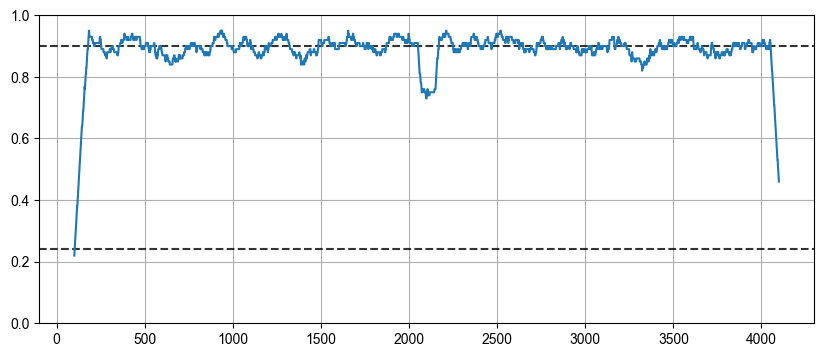

In [8]:
size = 100
scores = np.convolve(np.array(results['rewards_list']).flatten(), np.ones(size), mode="same") / size

plt.figure(figsize=(10, 4))
plt.axhline(results['upper_bound'], linestyle="--", color='k', alpha=0.8)
plt.axhline(results['chance'], linestyle="--", color='k', alpha=0.8)
plt.plot(range(size, size+len(scores)), scores)
plt.ylim((0, 1.))
plt.grid()
plt.show()

**analysis**

In [9]:
w = np.array(results["weights"])
w.shape

(10, 4000)

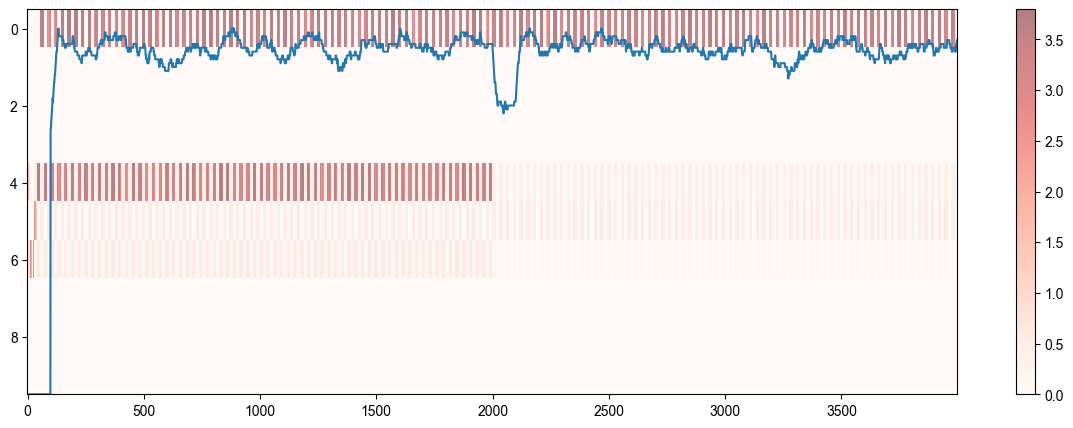

In [10]:
plt.figure(figsize=(15, 5))
plt.imshow(w, aspect="auto", interpolation="nearest", cmap="Reds", alpha=0.5)

size = 100
sc = np.convolve(np.array(results["rewards_list"]).flatten(), np.ones(size), mode='valid') / size
sc = [0] * (size - 1) + sc.tolist()
plt.plot(range(len(sc)), settings1.K-np.array(sc)*settings1.K - 0.5)
plt.colorbar()
plt.show()

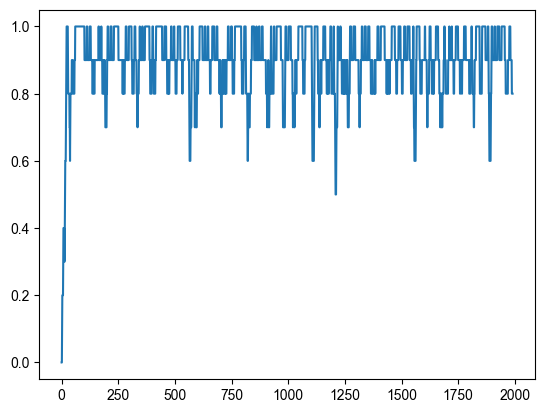

In [11]:
size = 10
sc = np.convolve(results["rewards_list"][1], np.ones(size), mode='valid') / size

plt.plot(range(len(sc)), sc);

#### study II - *weight update*

2025-01-30 18:41:33 | KABv0


{0: '6_best.json',
 1: '38_best.json',
 2: '14_best.json',
 3: '35_best.json',
 4: '27_best.json',
 5: '12_best.json',
 6: '18_best.json',
 7: '39_best.json',
 8: '20_best.json',
 9: '1_best.json',
 10: '26_best.json',
 11: '37_best.json',
 12: '16_best.json',
 13: '2_best.json',
 14: '28_best.json',
 15: '10_best.json',
 16: '31_best.json',
 17: '22_best.json',
 18: '8_best.json',
 19: '3_best.json',
 20: '29_best.json',
 21: '24_best.json'}


Enter the model number:  1


2025-01-30 18:41:36 | Invalid parameters for Model, using Modelv2 instead
100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:33<00:00, 16.81s/it]
2025-01-30 18:42:09 | Invalid parameters for Model, using Modelv2 instead
100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:33<00:00, 16.70s/it]
2025-01-30 18:42:43 | Invalid parameters for Model, using Modelv2 instead
100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:33<00:00, 16.96s/it]
2025-01-30 18:43:16 | Invalid parameters for Model, using Modelv2 instead
100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:33<00:00, 16.85s/it]
2025-01-30 18:43:50 | Invalid parameters for Model, using Modelv2 instead
100%|█████████████████████████████████████████████████████████████████████████████████████████████

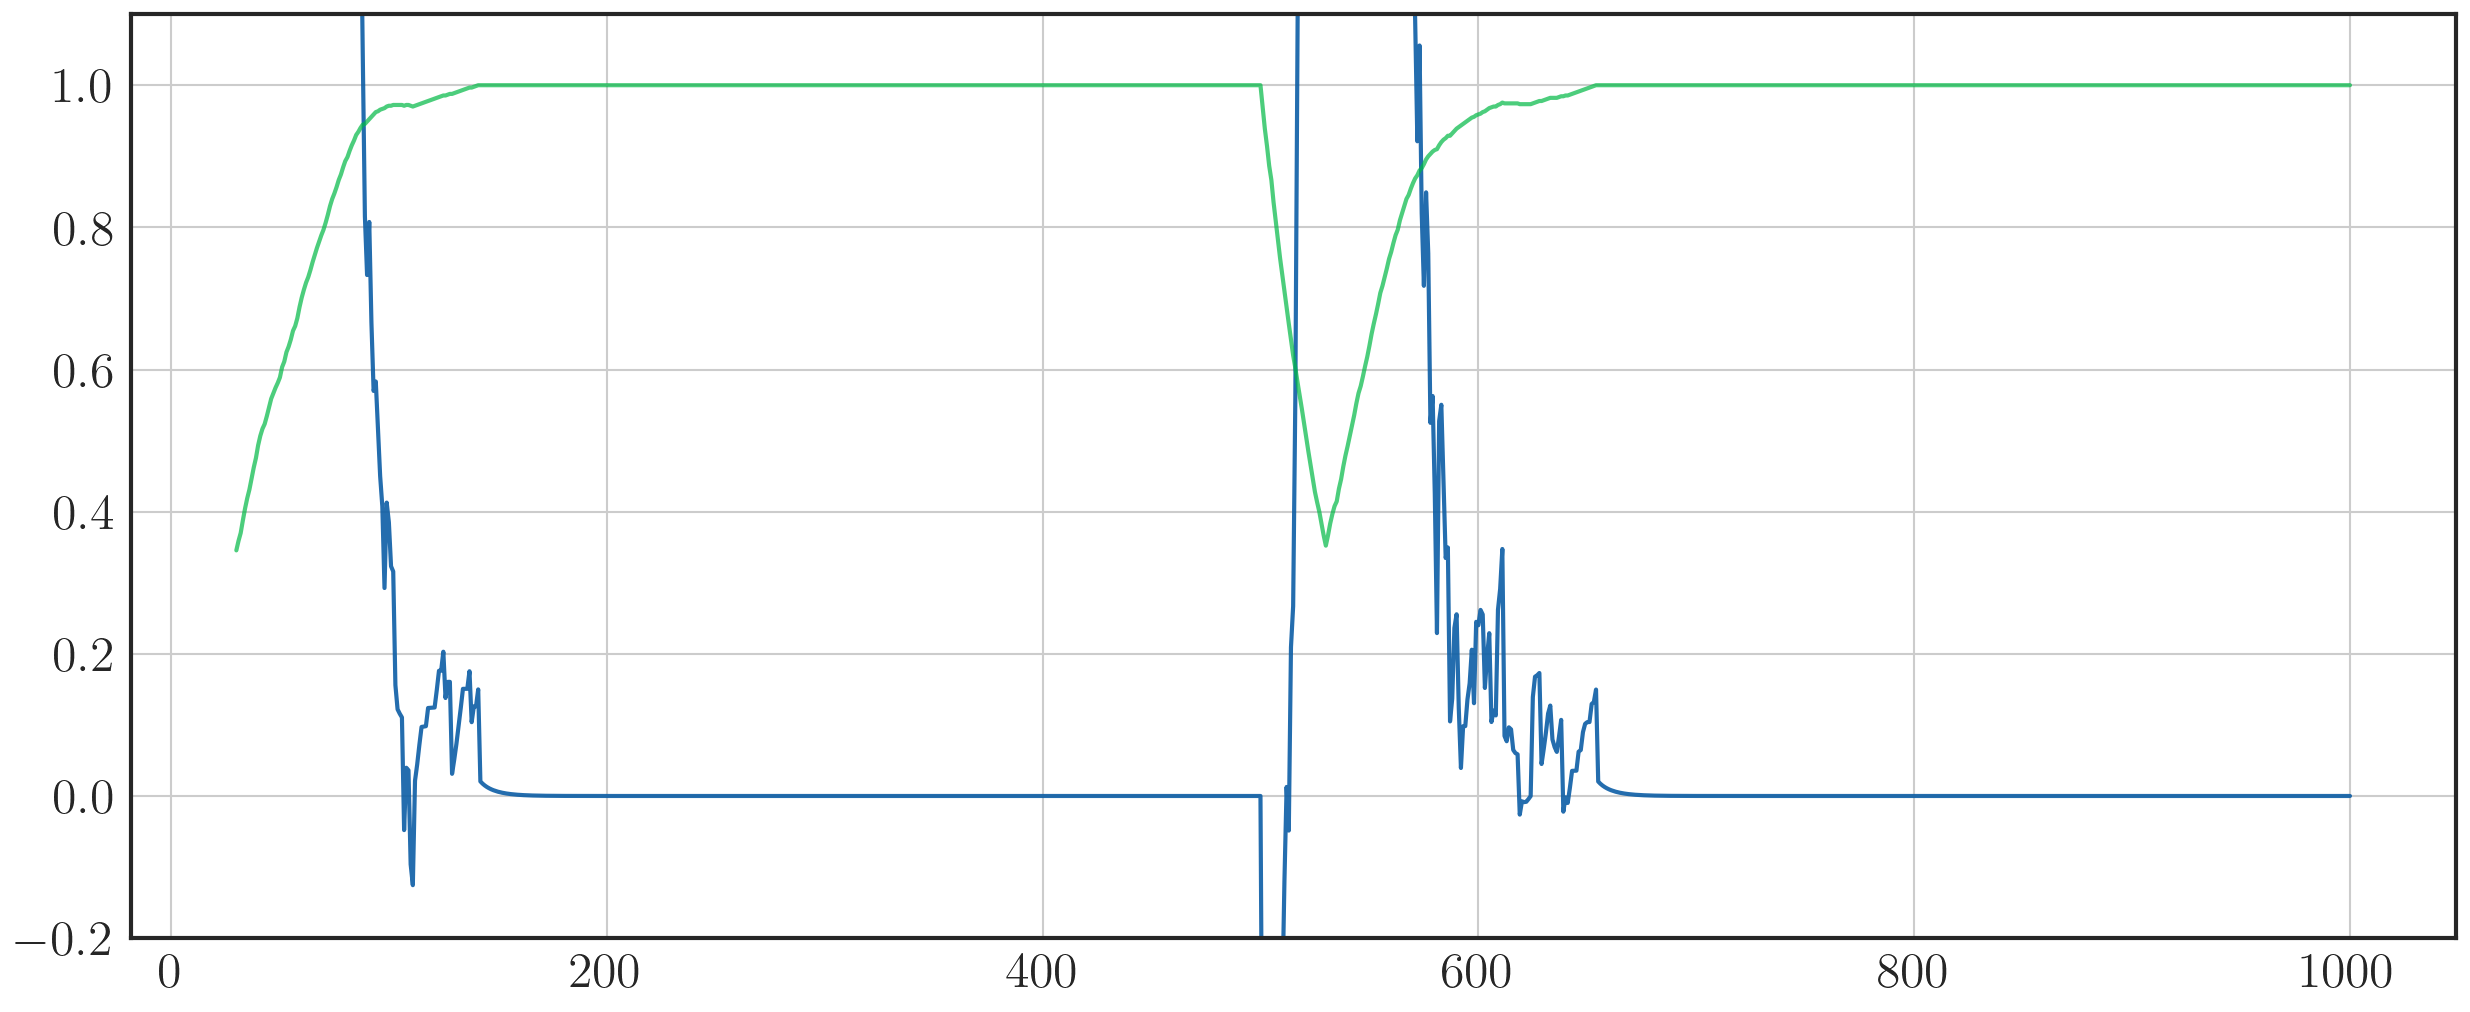

In [303]:
""" settings """

K = 20
nb_trials = 2
nb_rounds = 500

""" env """
probabilities_set = utils.make_probability_set(K=K,
                                         nb_trials=nb_trials,
                                         fixed_p=1.,
                                         normalize=False)

env = envs.KABv0(K=K,
                 probabilities_set=probabilities_set,
                 verbose=False)
logger(env)

""" model """
params = utils.load_model(idx=None)
params["K"] = K
params["track_weights"] = True



size = 30
size_s = size
DWY = None
SY = None

reps = 30
for i in range(reps):

    model = mm.Model(**params)
    results = envs.trial(model=model,
                         environment=env,
                         nb_trials=nb_trials,
                         nb_rounds=nb_rounds,
                         verbose=True)
    dw = model.get_delta_record()
    if i == 0:
        DWY = np.convolve(dw.flatten(), np.ones(size), mode="valid")
        SY = np.convolve(np.array(results["rewards_list"]).flatten(), np.ones(size_s), mode="valid")
        continue
    DWY += np.convolve(dw.flatten(), np.ones(size), mode="valid")
    SY += np.convolve(np.array(results["rewards_list"]).flatten(), np.ones(size_s), mode="valid")

dwy = DWY /reps
sy = SY / reps

plt.figure(figsize=(10, 4))
plt.plot(range(size, len(dwy)+size), DWY/size, lw=1., alpha=0.9)
plt.plot(range(size_s, len(sy)+size_s), sy/size_s, alpha=0.7)
plt.ylim((-0.2, 1.1))

plt.grid()
plt.show()

In [299]:
dwy = DWY / (i+1)
sy = SY / (i+1)

In [298]:
i

13

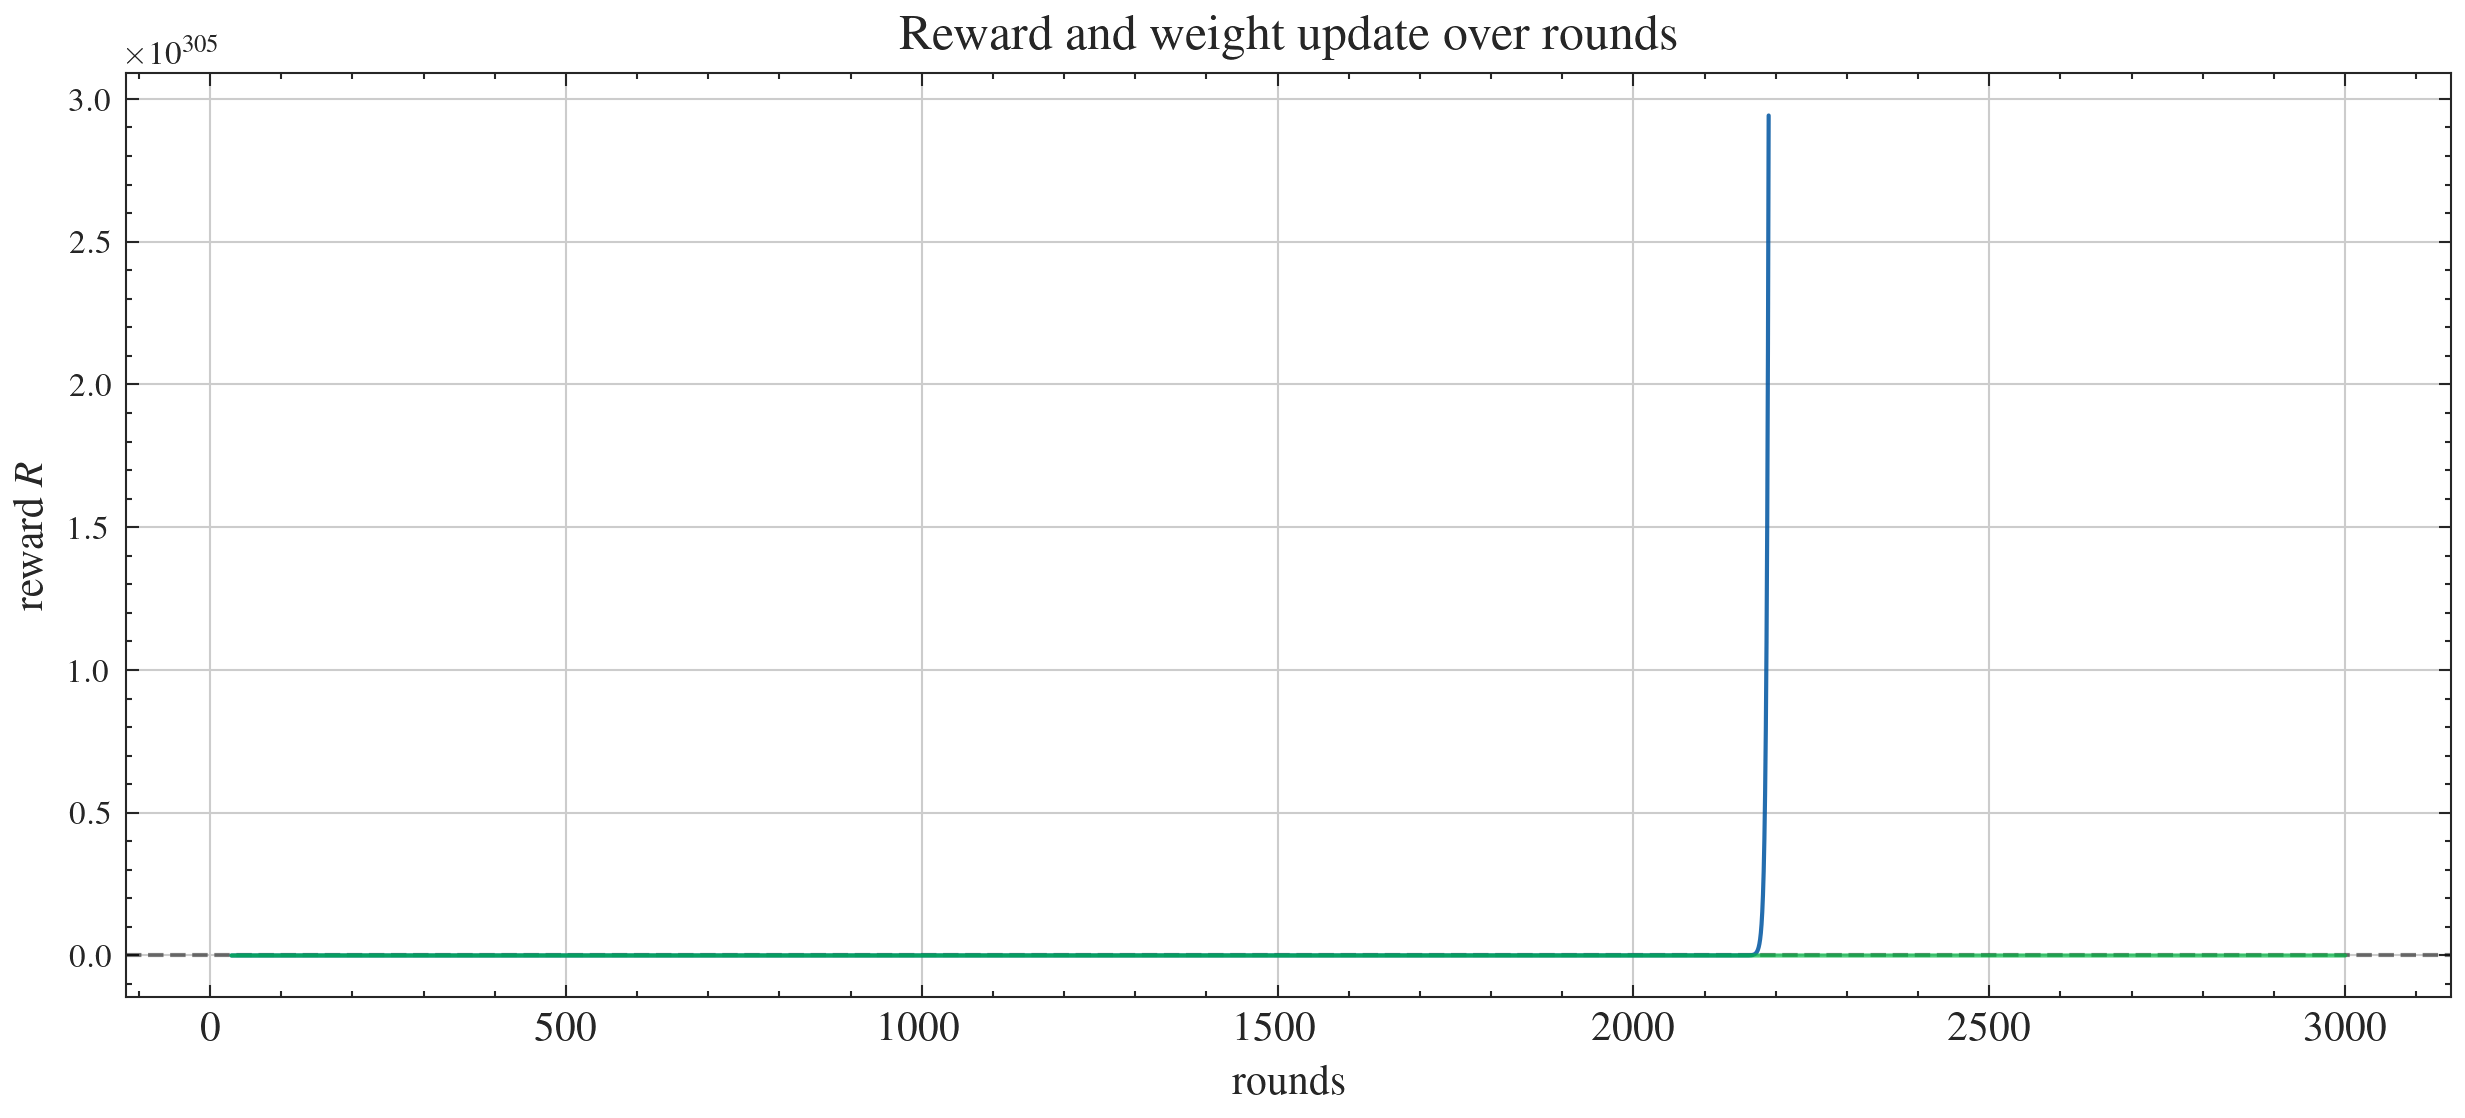

In [472]:
plt.figure(figsize=(10, 4))
plt.axhline(0.9, color="black", linestyle="--", alpha=0.5, label="max reward")
plt.plot(range(size, len(dwy)+size), dwy/size, lw=1., alpha=0.9, label="weight update")
plt.plot(range(size_s, len(sy)+size_s), sy/size_s, alpha=0.7, label="cumulative reward")

plt.xlabel("rounds")
plt.ylabel("reward $R$")
#plt.ylabel("update $\\Delta W$") # second y-axis

plt.title("Reward and weight update over rounds")
#plt.ylim((-0.2, 1.))
plt.grid()
plt.show()

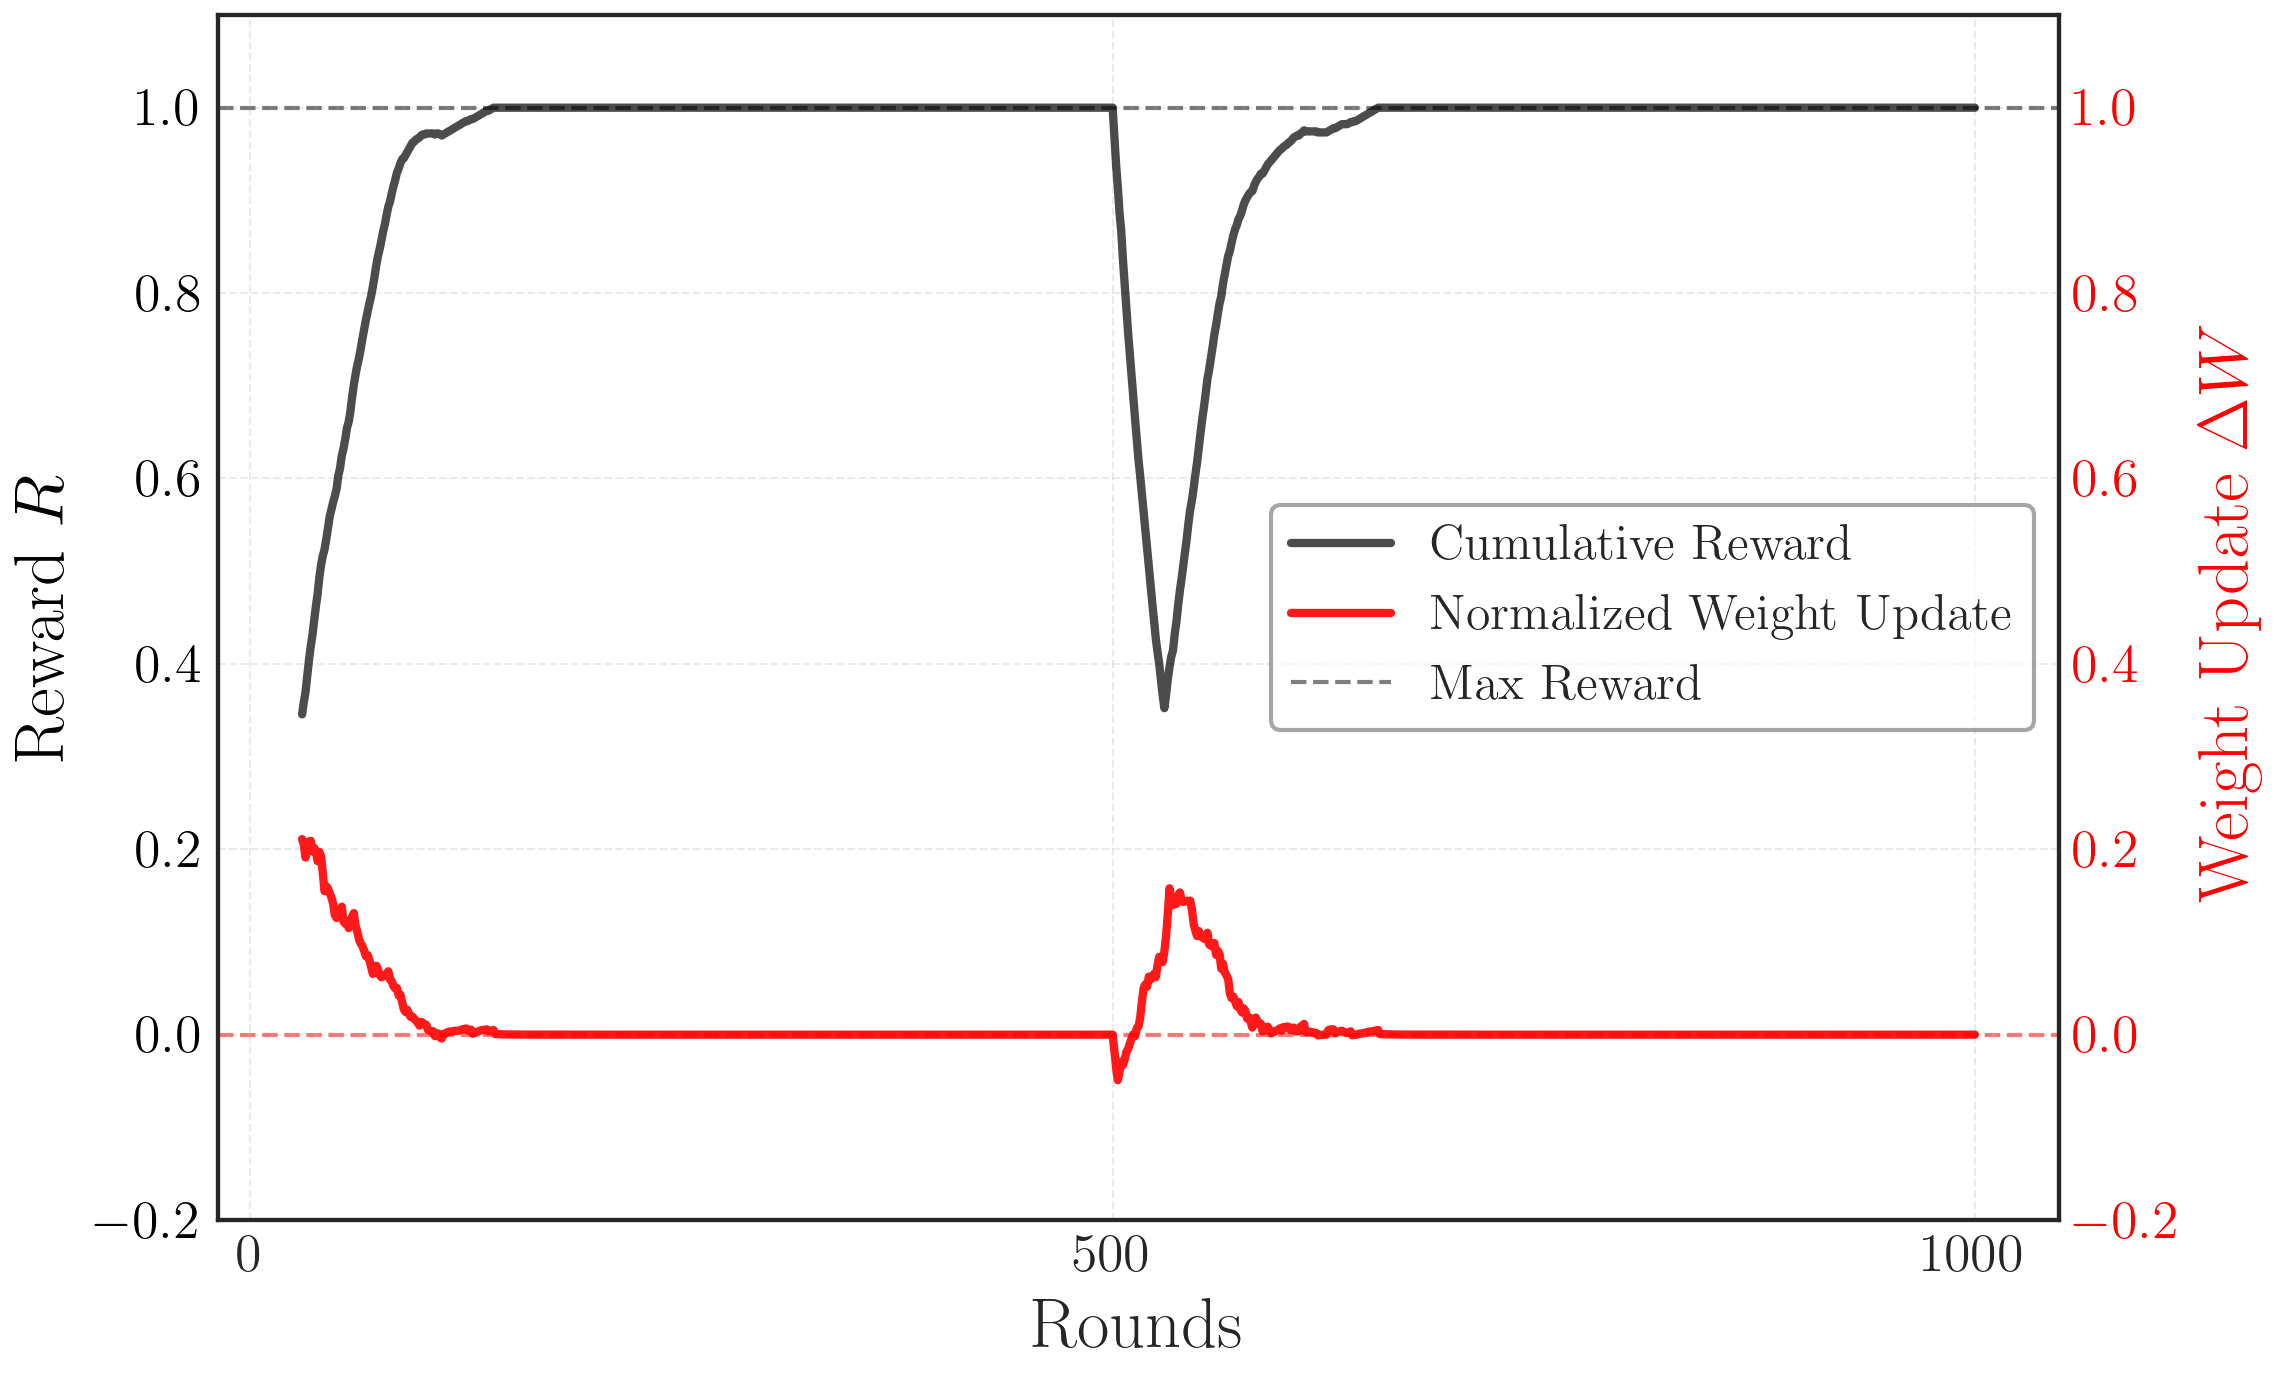

In [349]:
# Set the style and font for a professional, publication-ready look
#plt.style.use('science')  # Requires matplotlib-style package
# Update rcParams with the required settings
plt.rcParams.update({
    'figure.figsize': (10, 4),
    'figure.dpi': 300,
    'figure.subplot.wspace': 0.1,
    'figure.subplot.hspace': 0.3,
    
    'text.usetex': True,
    
    'font.size': 17,
    'font.family': 'serif',
    'font.weight': 'normal',
    'font.serif': ['Computer Modern Roman'],
    
    'legend.fontsize': 12,
    'legend.frameon': False,

    'axes.labelsize': 17,
    'axes.titlesize': 17,
    'axes.labelweight': 'normal',
    'axes.spines.top': True,
    'axes.spines.right': True,

    'lines.linewidth': 1.0,
    'lines.markeredgewidth': 0.5,
    'lines.markeredgecolor': 'black',

    'xtick.labelsize': 13,
    'ytick.labelsize': 13,

    'savefig.format': 'pdf'
})

# Create figure
fig, ax1 = plt.subplots(figsize=(8, 5))

# Color palette
#colors = sns.color_palette("husl", 4)

# First y-axis (Reward)
ax1.set_xlabel(r"Rounds", fontweight='bold')
ax1.set_ylabel(r"Reward $R$", color="black", fontweight='bold')
ax1.tick_params(axis='y', labelcolor="black")
ax1.set_ylim(-0.2, 1.1)

# Horizontal line for max reward
ax1.axhline(1., color="black", linestyle="--", alpha=0.5, 
            label="Max Reward", linewidth=1.)

# Cumulative reward plot
reward_line, = ax1.plot(range(size_s, len(sy)+size_s), sy/size_s, 
                        color="black",
                        lw=2, 
                        alpha=0.7, 
                        label="Cumulative Reward")

# Second y-axis (Weight Update)
ax2 = ax1.twinx()
ax2.set_ylabel(r"Weight Update $\Delta W$", color="red", fontweight='bold')
ax2.tick_params(axis='y', labelcolor="red")
ax2.set_xticks([0, 500, 1000])
ax2.set_ylim(-0.2, 1.1)


# Normalize weight update to make it more explicit
#dwy_normalized = (dwy/size - np.mean(dwy/size)) / np.std(dwy/size)

# Weight update plot with normalization
update_line, = ax2.plot(range(size, len(dwy)+size), dwy/size, 
                        color="red",
                        lw=2, 
                        alpha=0.9, 
                        label="Normalized Weight Update")

# Add reference lines for normalized weight update
ax2.axhline(0, color='red', linewidth=1, alpha=0.5, linestyle='--')
#ax2.axhline(1, color='black', linewidth=1, alpha=0.3, linestyle=':')
#ax2.axhline(-1, color='black', linewidth=1, alpha=0.3, linestyle=':')

# Title
#fig.suptitle(r'\textbf{Reward and Normalized Weight Update over Rounds}')

# Grid
ax1.grid(alpha=0.4, linestyle='--')

# Combined legend
lines = [reward_line, update_line, ax1.get_lines()[0]]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='right', 
           frameon=True, 
           fancybox=True, 
           framealpha=0.7, 
           edgecolor='gray')

# Adjust layout and save
plt.tight_layout()
plt.savefig('paper/figures/reward_update_plot.png', dpi=300, bbox_inches='tight')
plt.show()

### run

In [239]:
nb_rounds = 2000
nb_trials = 3
K = 500
env_type = "v0"
record_env = True

env = envs.make_new_env(K=K, env_type=env_type, nb_trials=nb_trials)
env.record = record_env
logger.info(f"%env: {env.__repr__()}")

# define model parameters
params = utils.load_model(idx=1)
params["K"] = K


# run
results = envs.trial_multiple_models(
                     models=[mm.Model(**params)],
    
                     environment=env,
                     nb_trials=nb_trials,
                     nb_rounds=nb_rounds,
                     nb_reps=1,
                     verbose=True)

logger(f"{results['names'][0]}:\t{results['score_list'][0][0]}")

results.keys(), results['reward_list'].shape

2025-01-30 15:50:01 | %env: KABv0(500, #sets=3)
2025-01-30 15:50:01 | Invalid parameters for Model, using Modelv2 instead
  0%|                                                                                                                                                                                                                                               | 0/3 [00:07<?, ?it/s]


KeyboardInterrupt: 

In [240]:
nb_rounds = 2000
nb_trials = 3
K = 500
env_type = "v0"
record_env = True

env = envs.make_new_env(K=K, env_type=env_type, nb_trials=nb_trials)
env.record = record_env
logger.info(f"%env: {env.__repr__()}")

# define model parameters
params = utils.load_model(idx=1)
params["K"] = K


# run
results2 = envs.trial_multiple_models(
                     models=[mm.Model(**params)],
                     environment=env,
                     nb_trials=nb_trials,
                     nb_rounds=nb_rounds,
                     nb_reps=1,
                     verbose=True)

logger(f"{results2['names'][0]}:\t{results2['score_list'][0][0]}")

results2.keys(), results2['reward_list'].shape

2025-01-30 15:50:11 | %env: KABv0(500, #sets=3)
2025-01-30 15:50:11 | Invalid parameters for Model, using Modelv2 instead
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [08:03<00:00, 161.22s/it]
2025-01-30 15:58:15 | Model:	[1.   0.78 1.  ]


(dict_keys(['reward_list', 'chance_list', 'upper_bound_list', 'best_arm_list', 'arm_list', 'scores', 'score_list', 'names']),
 (1, 1, 3, 2000))

### analysis

[500]


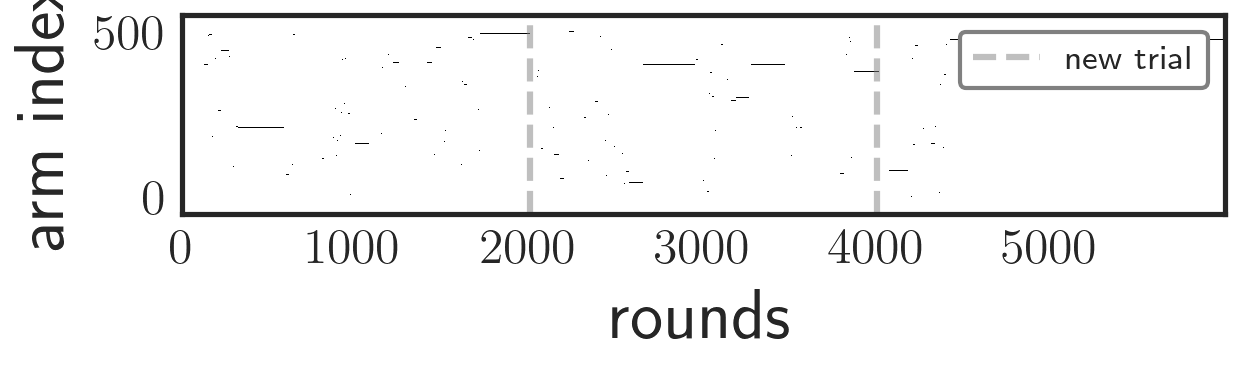

In [241]:
plt.style.use('seaborn-v0_8-white')


size = 20
trials = nb_trials
rounds = nb_rounds
rep_i = 0

print(f"[{K}]")

fig, ax = plt.subplots(1, 1, figsize=(5, 2), sharex=True)
fig.tight_layout(pad=3.0, h_pad=2.0)

# Heatmap plot
heatmap_data = np.array(results2['arm_list']).reshape(rounds*trials, K).T
ax.imshow(heatmap_data, cmap="Greys", aspect="auto", interpolation="nearest", vmin=0, vmax=0.1)

# Add vertical lines for trial boundaries
for t in range(0, trials):
    if t == 0:
        #ax.plot(range(rounds*t, rounds*(t+1)), [probabilities_set.argmax(axis=1)[t]]*rounds,
        #          color='red', label="best arm")
        continue
    if t == 1:
        ax.axvline(x=t*rounds, color='grey', linestyle='--', alpha=0.5, lw=1.5,
                  label="new trial")
        continue
    ax.axvline(x=t*rounds, color='grey', linestyle='--', alpha=0.5, lw=1.5)
    #ax.plot(range(rounds*t, rounds*(t+1)), [probabilities_set.argmax(axis=1)[t]]*rounds,
    #              color='red')

# Formatting primary axis (heatmap)
ax.set_ylim((-50, K+50))
ax.set_ylabel('arm index')
ax.set_xlabel('rounds')
#ax.set_xticks(range(0, rounds*trials+1, 2000))
#ax.set_yticks((0, 499), (500, 1))

#ax.set_xticklabels(range(0, rounds*trials+1, 150))

ax.legend(loc='best', 
          frameon=True, 
          fancybox=True, 
          framealpha=1., 
          edgecolor='gray')

# Title with performance metrics
#ax.set_title(f"Model - $R=${results['scores']:.3f} - $\\langle H \\rangle=${entropy.mean():.3f}")

# X-axis label for the bottom subplot

# Adjust layout and add a overall title
#plt.suptitle(r'\textbf{Selections over rounds}', fontsize=16, y=1.0)

#plt.savefig(f'media/forfigures/selections_3.png', bbox_inches='tight', dpi=500)
#print("saved")
    
plt.show()

In [60]:
results["arm_list"][0, 0, 1].sum()

2000.0

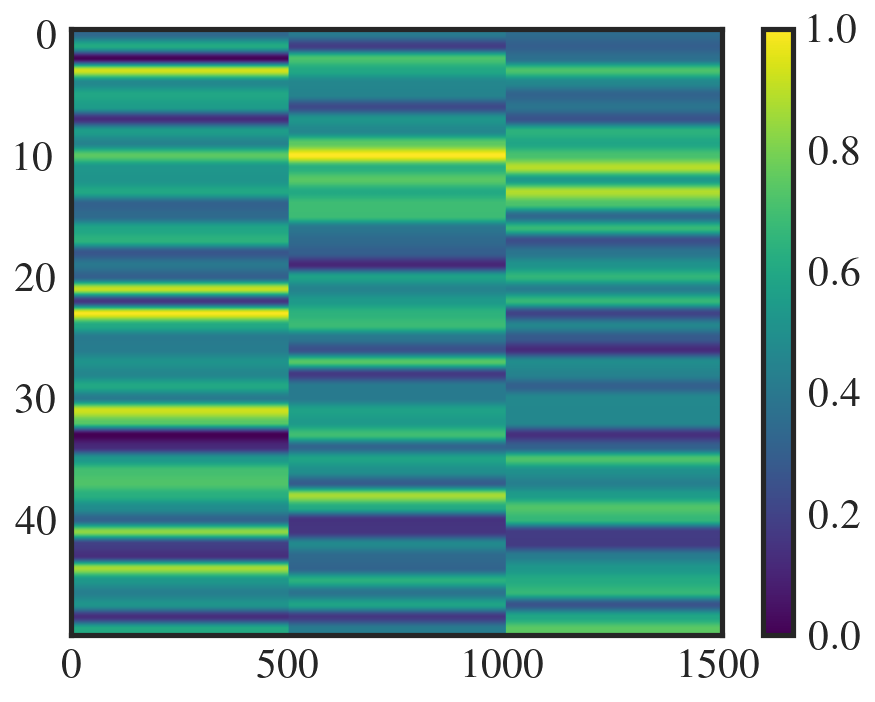

In [31]:
plt.imshow(np.array(env.probabilities_record).T, aspect="auto", cmap="viridis", vmin=0, vmax=1)
plt.colorbar();

### run over many envs

In [7]:
settings1 = Settings()
settings1.rounds = 2000
settings1.trials = 2
settings1.reps = 15
settings1.verbose = True
settings1.K = 5
    
logger(f"reps:   {settings1.reps}")
logger(f"trials: {settings1.trials}")
logger(f"rounds: {settings1.rounds}")

all_results = {}

for env_name in ("v0", "driftv0", "driftv1", "sinv0"):
    
    settings1.env = env_name
    logger(f"env:    {settings1.env}")
    
    
    # parameters
    K = settings1.K
    nb_rounds = settings1.rounds
    nb_trials = settings1.trials
    nb_reps = settings1.reps
    verbose = settings1.verbose
    env_type = settings1.env
    
    # define proababilities set
    probabilities_set = []
    for i in range(nb_trials):
        p = np.around(np.random.uniform(0.05, 0.3, K), 2)
        p[i%K] = 0.9
        # p[np.random.randint(0, K)] = 0.9
        probabilities_set += [p.tolist()]
    
    probabilities_set = np.array(probabilities_set)
    
    # define the environment
    if env_type == "driftv0":
        env = envs.KABdriftv0(K=K,
                              probabilities_set=probabilities_set,
                              verbose=verbose,
                              tau=5)
    elif env_type == "driftv1":
        env = envs.KABdriftv1(K=K,
                              verbose=verbose,
                              tau=100,
                              normalize=True,
                              fixed_p=0.9)
    elif env_type == "sinv0":
        frequencies = np.linspace(0, 0.4, K)
        env = envs.KABsinv0(K=K,
                            frequencies=frequencies,
                            normalize=True,
                            verbose=verbose)
    else:
        env = envs.KABv0(K=K,
                         probabilities_set=probabilities_set,
                         verbose=verbose)
    
    if verbose:
        logger.info(f"%env: {env}")
    
    # define models
    if settings1.load:
        # params = utils.load_model(idx=args.idx,
        #                           verbose=verbose)
    
        idx = settings1.idx if settings1.idx >= 0 else None
        params = utils.load_model(idx=idx)
        # params["K"] = K
        params["K"] = K
    
    else:
        params = {
            "K": K,
            "dur_pre": 2000,
            "dur_post": 2000,
            "lr": 0.1,
            "gain": 1.,
            "threshold": 0.5,
            "alpha": 0.,
            "beta": 1.,
            "mu": 0.,
            "sigma": 1.,
            "r": 1.,
            "alpha_lr": 0.1,
            "beta_lr": 0.1,
            "mu_lr": 0.1,
            "sigma_lr": 0.1,
            "r_lr": 0.1,
            "w_max": 5.,
            "value_function": "gaussian",
            "lr_function": "gaussian",
        }
    
    model_list = [
        mm.ThompsonSampling(K=K),
        mm.EpsilonGreedy(K=K, epsilon=0.1),
        mm.UCB1(K=K),
        mm.Model(**params)
    ]
    
    # run
    results = envs.trial_multiple_models(
                         models=model_list,
                         environment=env,
                         nb_trials=nb_trials,
                         nb_rounds=nb_rounds,
                         nb_reps=nb_reps,
                         verbose=settings1.verbose)
    
    all_results[env_name] = results

logger()
logger("#done")

2024-11-26 19:06:52 | reps:   15
2024-11-26 19:06:52 | trials: 2
2024-11-26 19:06:52 | rounds: 2000
2024-11-26 19:06:52 | env:    v0
2024-11-26 19:06:52 | %env: KABv0
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [22:50<00:00, 91.38s/it]
2024-11-26 19:29:42 | env:    driftv0
2024-11-26 19:29:42 | %env: KABdriftv0
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [22:46<00:00, 91.12s/it]
2024-11-26 19:52:29 | env:    driftv1
2024-11-26 19:52:29 | %env: KABdriftv1
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [22:46<00:00, 91.07s/it]
2024-11-26 20:15:15 | env:    sinv0
2024-11-26 20:15:15 | %env: KABsinv0
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [22

In [9]:
all_results['v0'].keys()

dict_keys(['reward_list', 'chance_list', 'upper_bound_list', 'best_arm_list', 'arm_list', 'scores', 'score_list', 'mean_scores', 'entropy_list', 'names'])

In [28]:
""" print score for all """

for (k, v) in all_results.items():

    print(f"[{k}]")
    print(f"\tmax:    {np.mean(v['upper_bound_list']):.3f}")
    print(f"\tchance: {np.mean(v['chance_list']):.3f}")

    for i, name in enumerate(v['names']):
        print(f"\t{name}:\t{v['scores'][i]:.3f} +/- {np.var(v['score_list'][i]):.5f}")

    print()

[v0]
	max:    0.900
	chance: 0.345
	`Thompson Sampling`:	0.901 +/- 0.00052
	`Epsilon-Greedy`:	0.537 +/- 0.09204
	`UCB1`:	0.895 +/- 0.00046
	`Model`:	0.904 +/- 0.00018

[driftv0]
	max:    0.870
	chance: 0.389
	`Thompson Sampling`:	0.759 +/- 0.01718
	`Epsilon-Greedy`:	0.688 +/- 0.01897
	`UCB1`:	0.773 +/- 0.01124
	`Model`:	0.771 +/- 0.00917

[driftv1]
	max:    0.629
	chance: 0.200
	`Thompson Sampling`:	0.553 +/- 0.04150
	`Epsilon-Greedy`:	0.334 +/- 0.06692
	`UCB1`:	0.585 +/- 0.03186
	`Model`:	0.633 +/- 0.01240

[sinv0]
	max:    0.200
	chance: 0.200
	`Thompson Sampling`:	0.189 +/- 0.00054
	`Epsilon-Greedy`:	0.203 +/- 0.00069
	`UCB1`:	0.205 +/- 0.00056
	`Model`:	0.208 +/- 0.00082



### environments

In [246]:
def make_new_env(K, env_type, nb_trials=3):

    probabilities_set = np.random.normal(0.5 * np.exp(-(K/300)**2/100), 0.2, (nb_trials, K)).clip(0, 1)
   
    
    # define the environment
    if env_type == "driftv0":
        env = envs.KABdriftv0(K=K,
                              probabilities_set=probabilities_set,
                              verbose=False,
                              tau=100)
    elif env_type == "driftv1":
        env = envs.KABdriftv1(K=K,
                              verbose=False,
                              tau=10,
                              normalize=False,
                              fixed_p=0.9)
    elif env_type == "sinv0":
        #frequencies = np.linspace(0, 0.2, K)
        frequencies = np.random.uniform(0, 0.1, K)
        phases = np.random.uniform(0, 6.28, K)
        env = envs.KABsinv0(K=K,
                            frequencies=frequencies,
                            normalize=False,
                            phases=phases,
                            verbose=False)
    elif env_type == "sinv1":
        #frequencies = np.linspace(0, 0.2, K)
        frequencies = np.random.uniform(0, 0.1, K)
        phases = np.random.uniform(0, 6.28, K)
        constants = np.random.uniform(0, 0.7, K//2)
        env = envs.KABsinv0(K=K,
                            frequencies=frequencies,
                            normalize=False,
                            phases=phases,
                            constants=constants,
                            verbose=False)
    else:
        env = envs.KABv0(K=K,
                         probabilities_set=probabilities_set,
                         verbose=False)
    
    #logger(env.__repr__())
    return env

NameError: name 'make_new_env' is not defined

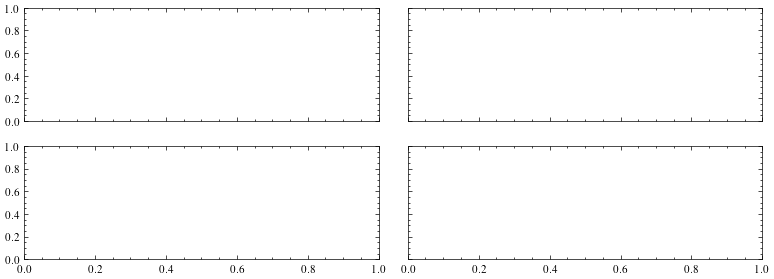

In [3]:
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times', 'Computer Modern Roman'],
    'text.usetex': True,
    'axes.labelsize': 10,
    'font.size': 10,
    'legend.fontsize': 8,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8
})

fig, axs = plt.subplots(2, 2, figsize=(8, 3), sharex=1, sharey=1)
fig.tight_layout()
names = (r"KAB-P", r"KAB-D", r"KAB-$sin$", r"KAB-$sin$P")
axs = axs.flatten()
for i, n in enumerate(("v0", "driftv0", "sinv0", "sinv1")):

    K = 1000
    env = make_new_env(K=K, env_type=n, nb_trials=3)
    env.record = True
    env.reset(complete=True)
    env.reset(complete=True)

    p = []
    for t in range(2000):
        env._update()
        env.sample(0, update_flag=False)
        p += [env.probabilities.tolist()] 
        if t == 1000:
            env.reset()
    p = np.array(env.probabilities_record)
    
    im = axs[i].imshow(p.T, vmin=0, vmax=1, aspect="auto", cmap="viridis")
    cbar = plt.colorbar(im, ax=axs[i], orientation="vertical")
    cbar.set_ticks([0, 1])
    cbar.set_ticklabels(['0', '1'])
    axs[i].set_title(f"{names[i]} {p.max()=:0.3f} H={utils.calc_entropy(p):.3f} {sum(p[0, :]>0.9)}")
    axs[i].set_xticks([0, 2000])
    axs[i].set_xticklabels([0, 2000])
    if i // 2 == 1:
        axs[i].set_xlabel("rounds")
    axs[i].set_yticks([0, K])
    axs[i].set_yticklabels([K, 1])
    if i % 2 == 0:
        axs[i].set_ylabel("arm index")
    
plt.show()

In [314]:
p[:,0].shape

(2001,)

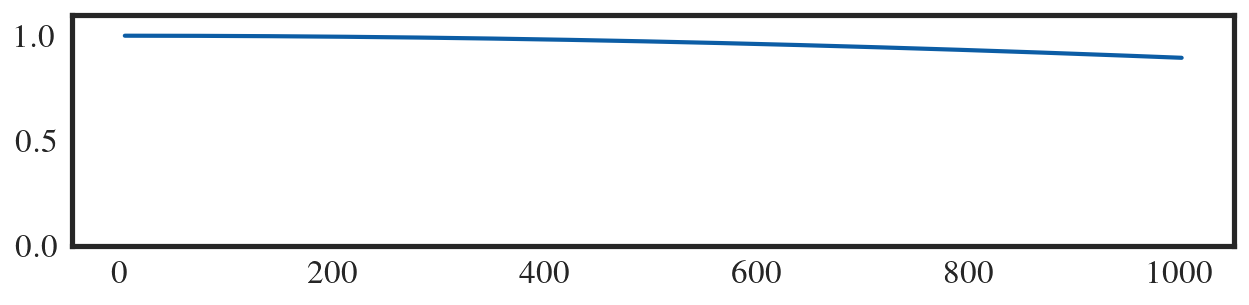

In [216]:
xx = np.linspace(5, 1000, 1000)
#yy = 1/1.001**xx
yy = np.exp(-(xx/300)**2/100)
plt.figure(figsize=(5, 1))
plt.ylim((0, 1.1))
plt.plot(xx, yy);

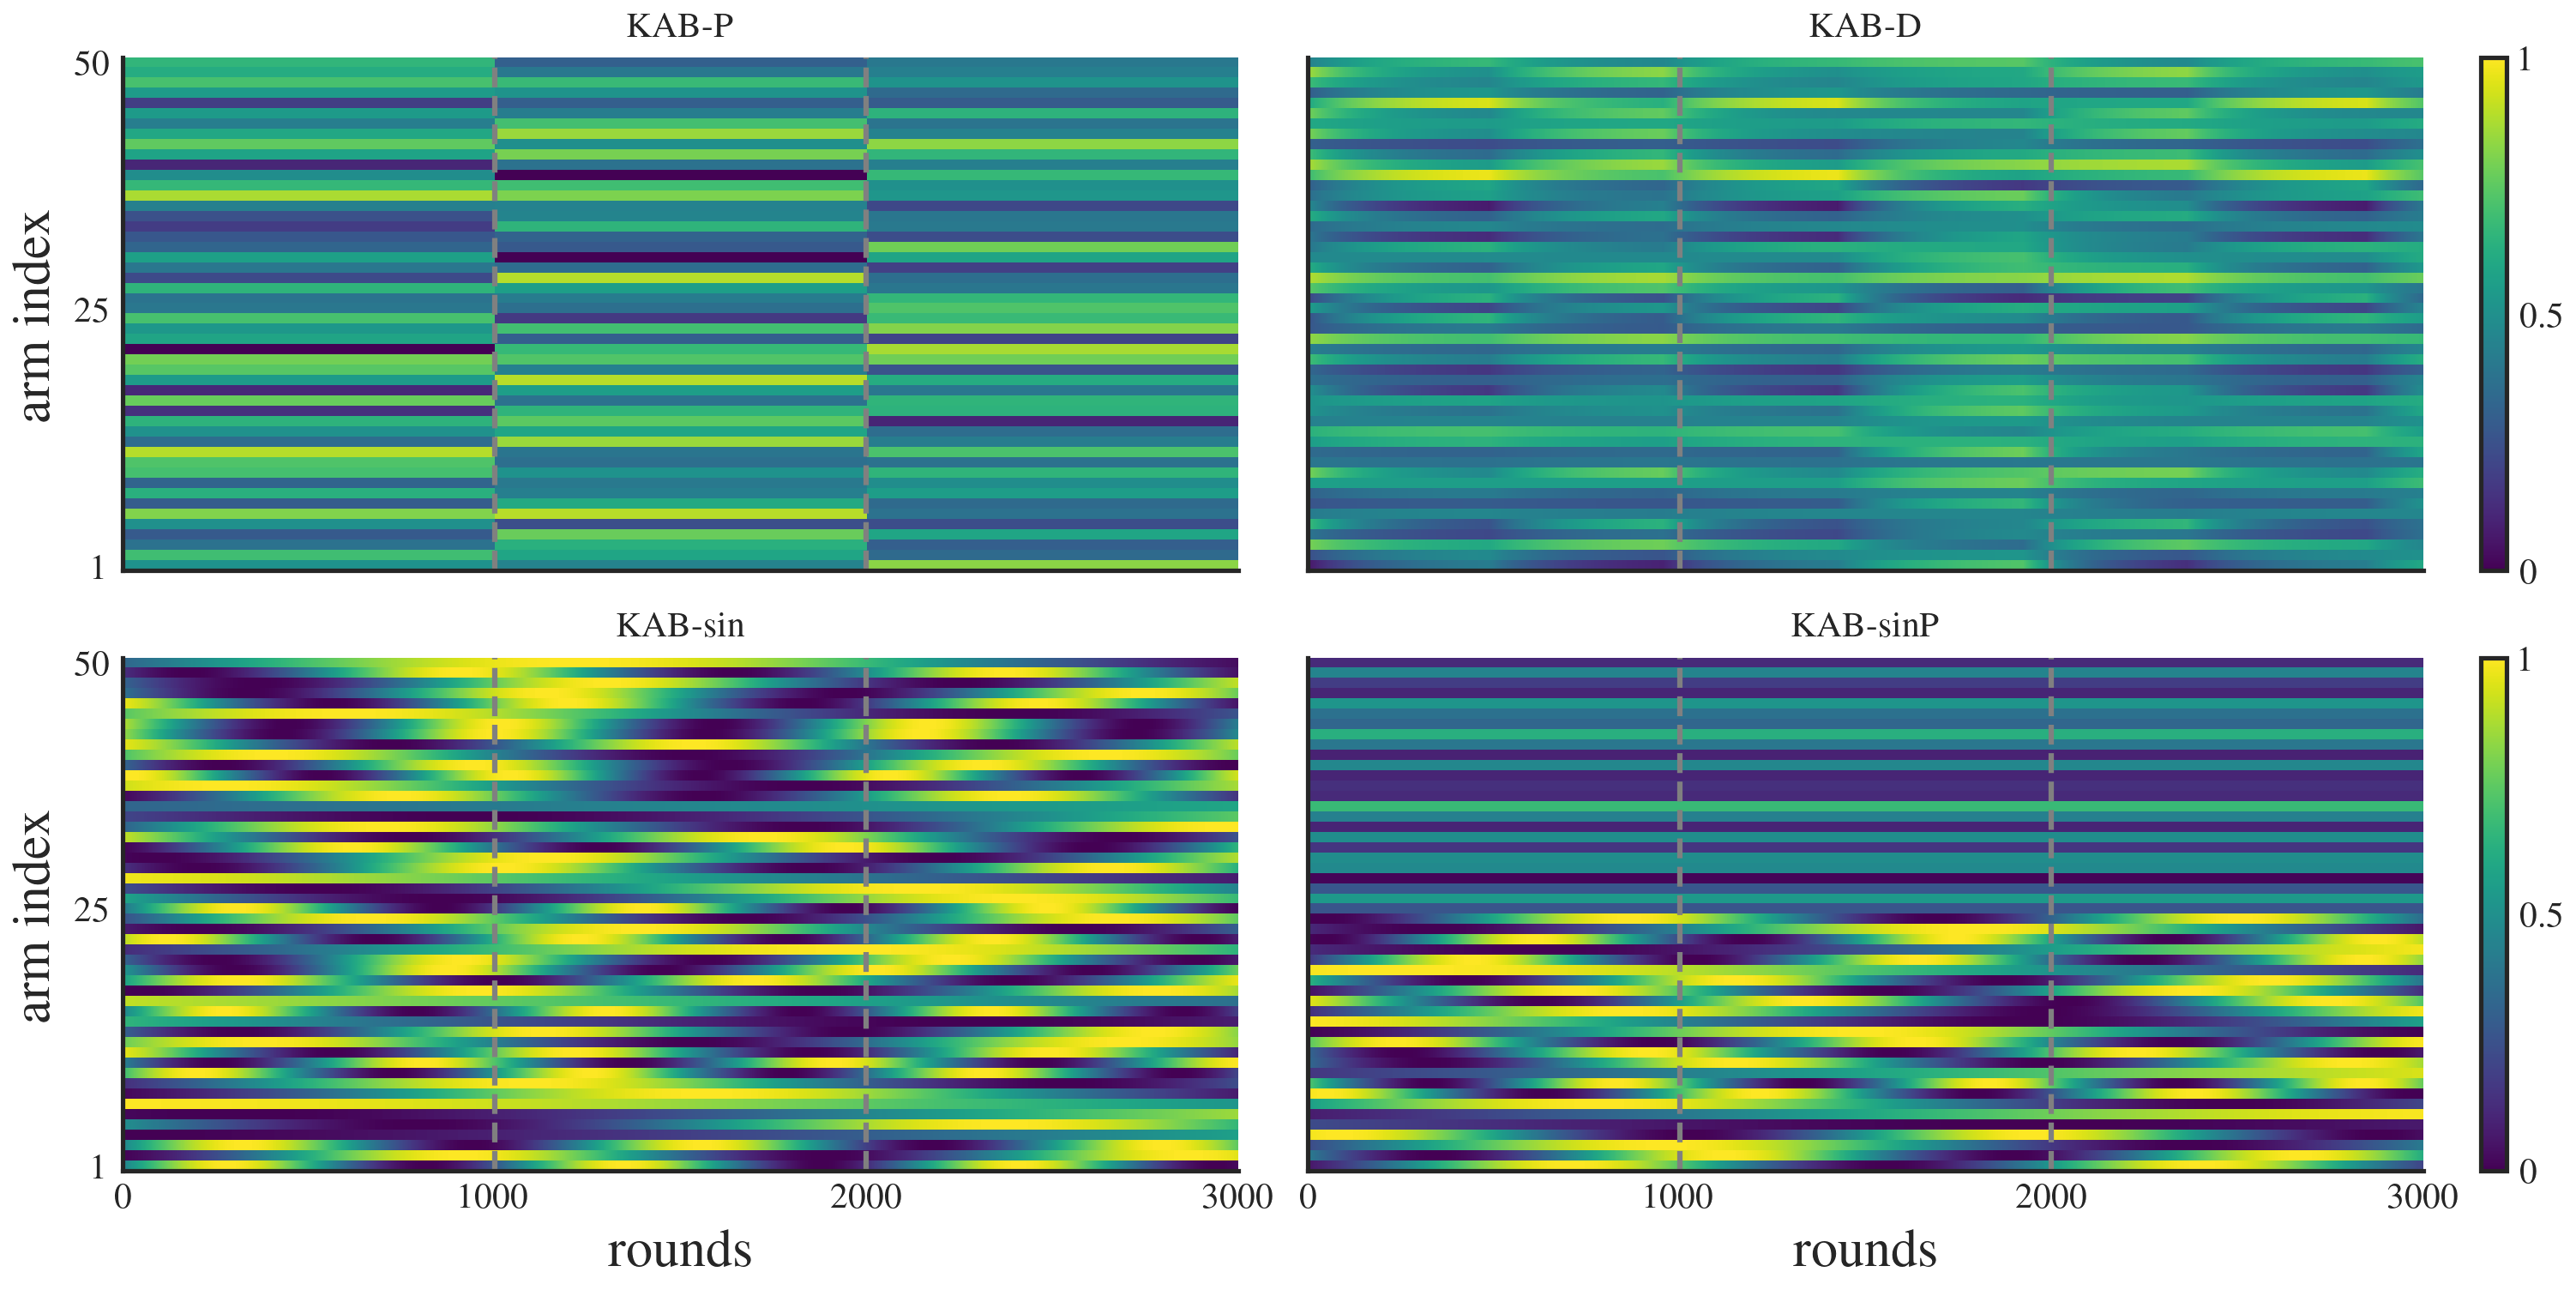

In [8]:
plt.style.use('seaborn-v0_8-white')  # Requires matplotlib-style package

plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times', 'Computer Modern Roman'],
    'text.usetex': True,
    'axes.labelsize': 15,
    'font.size': 15,
    'legend.fontsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})

# Create figure with improved layout
fig, axs = plt.subplots(2, 2, figsize=(10, 5), 
                        sharex=True, 
                        sharey=True, 
                        constrained_layout=True)
axs = axs.flatten()

# Names with proper LaTeX formatting
names = (r"KAB-P", r"KAB-D", r"KAB-$\sin$", r"KAB-$\sin$P")

# Environment types
env_types = ("v0", "driftv0", "sinv0", "sinv1")

nb_trials = 3
nb_rounds = 1000
for i, n in enumerate(env_types):
    # Generate environment data
    env = envs.make_new_env(K=50, env_type=n, nb_trials=nb_trials)
    env.record = True
    p = []
    env.reset(complete=True)

    for t in range(3000):
        env.sample(0)
        p += [env.probabilities.tolist()]
        if t % 1000 == 0:
            env.reset()
        
    #p = np.array(p)
    p = np.array(env.probabilities_record)
    
    # Plot heatmap with improved colormap
    im = axs[i].imshow(p.T, 
                       vmin=0, 
                       vmax=1, 
                       aspect="auto", 
                       cmap="viridis",  # More perceptually uniform colormap
                       interpolation='nearest')  # Crisp pixel boundaries

    for f in range(1, nb_trials):
        axs[i].axvline(nb_rounds*f, color="grey", linestyle="--", lw=1.5)
    
    # Colorbar with improved formatting
    if i % 2 == 1:
        cbar = plt.colorbar(im, ax=axs[i], 
                            orientation="vertical", 
                            pad=0.02,  # Reduce padding
                            fraction=0.046)  # Reduce width
        cbar.set_ticks([0, 0.5, 1])
        cbar.set_ticklabels(['0', '0.5', '1'])
    
    # Subplot title
    axs[i].set_title(f"{names[i]}", fontweight='bold')
    
    # X-axis
    axs[i].set_xticks([0, nb_rounds, 2*nb_rounds, nb_rounds*nb_trials])
    axs[i].set_xticklabels([0, nb_rounds, 2*nb_rounds, nb_rounds*nb_trials])
    if i // 2 == 1:
        axs[i].set_xlabel(r"rounds")
    
    # Y-axis
    axs[i].set_yticks([0, 24, 49])
    axs[i].set_yticklabels([50, 25, 1])
    if i % 2 == 0:
        axs[i].set_ylabel(r"arm index")

# Overall figure title
#fig.suptitle(r'\textbf{Probability Dynamics Across Different Environments}', 
#             fontsize=12, y=1.06)
#plt.savefig('paper/figures/envs_1.png', dpi=500, bbox_inches='tight')

plt.show()

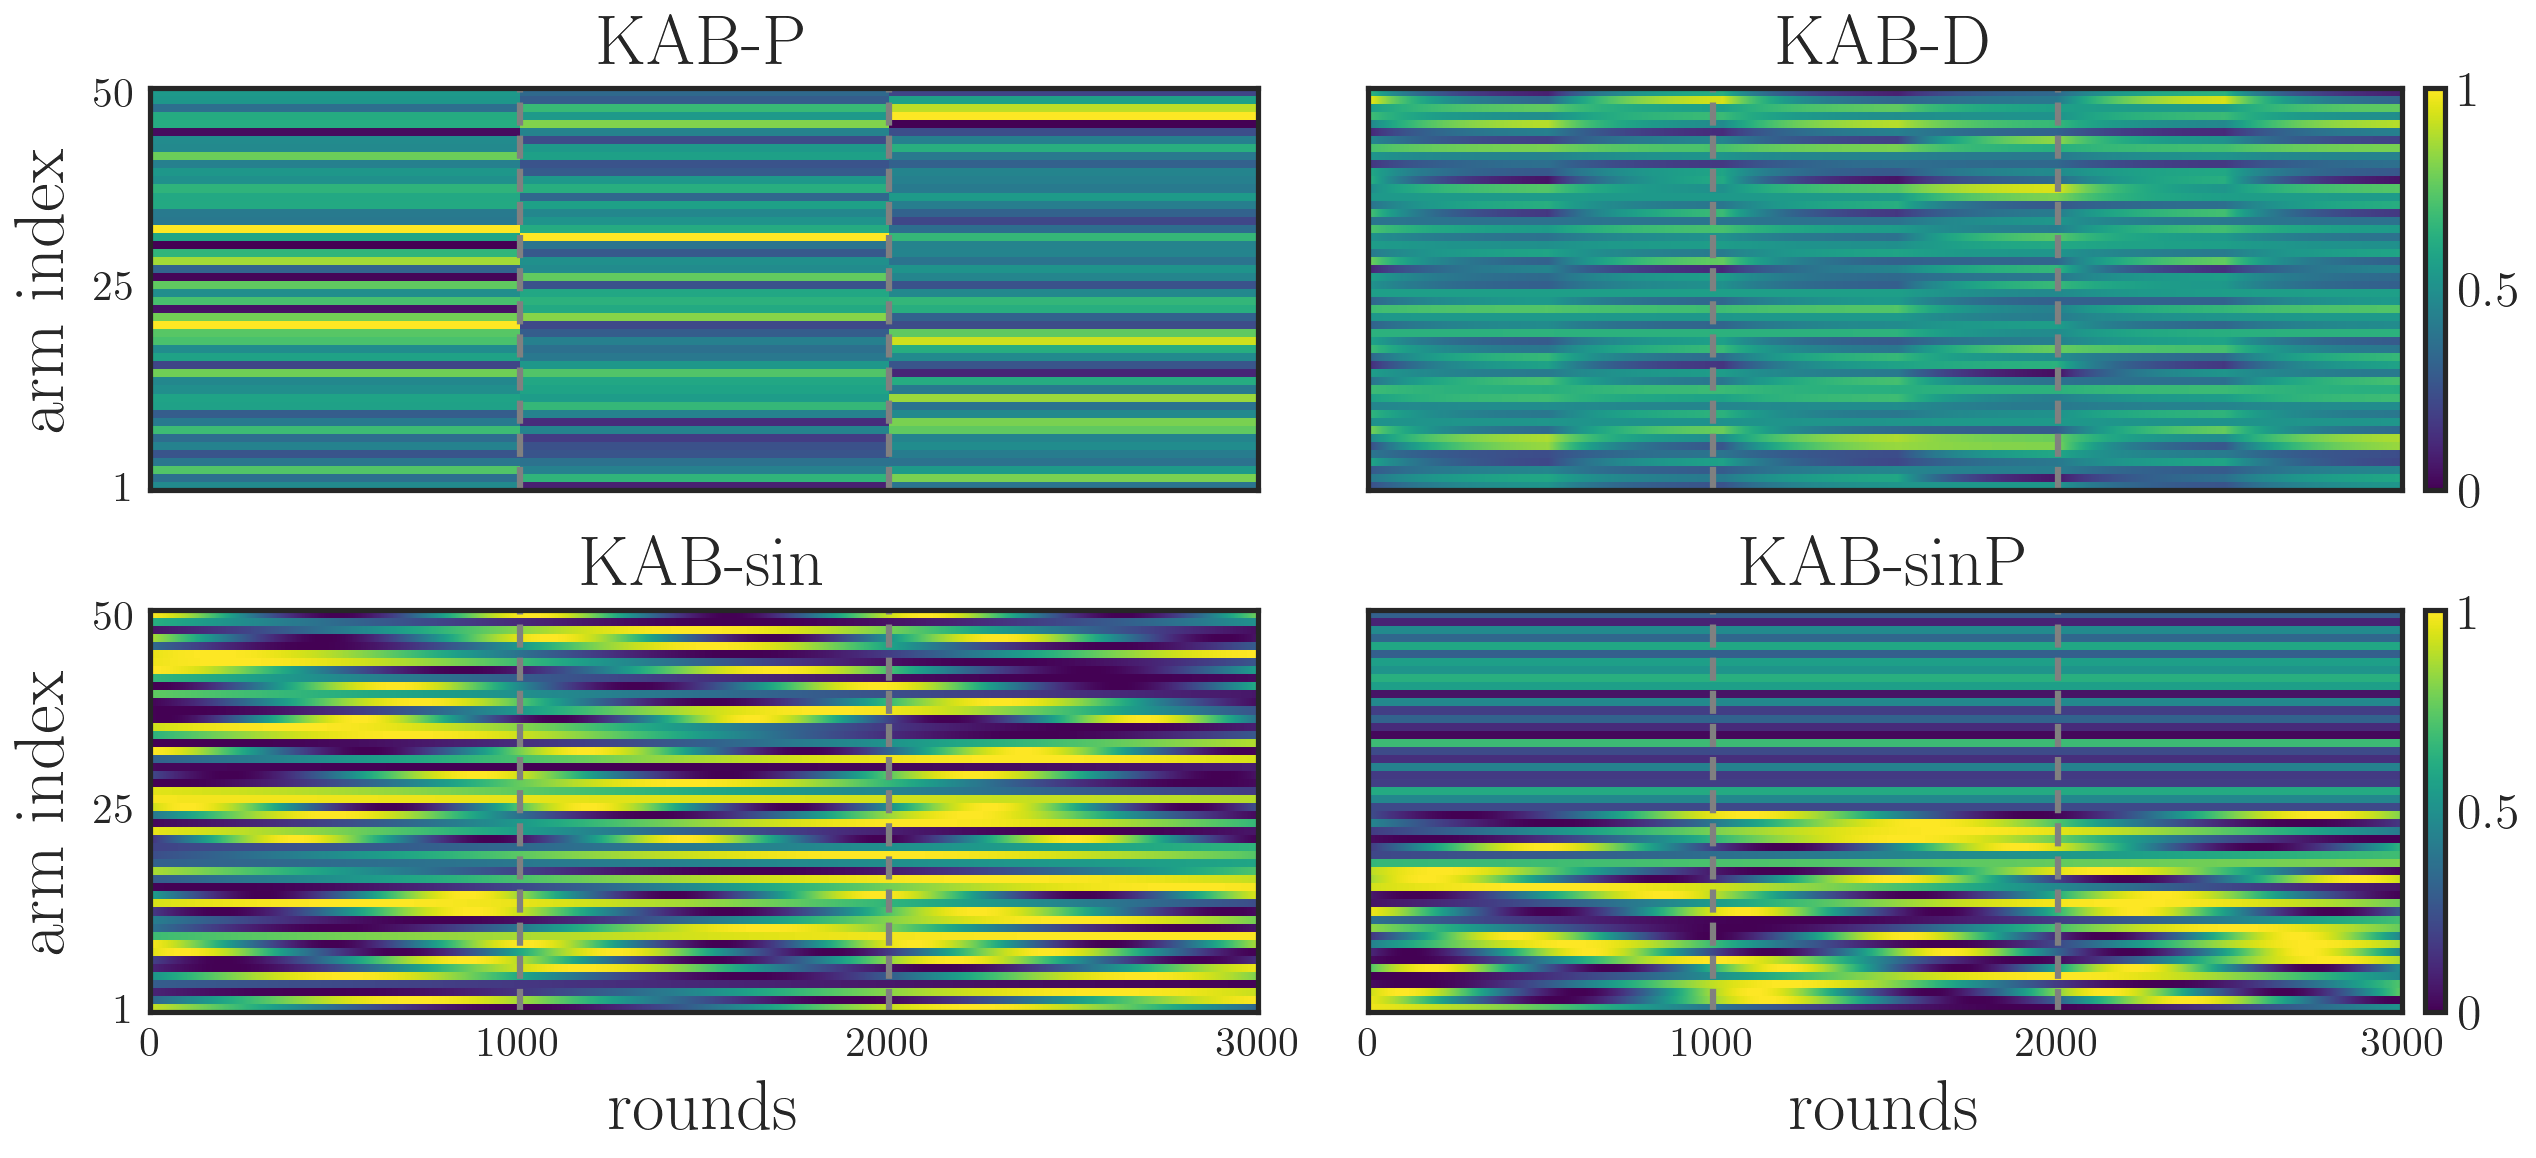

In [22]:
plt.style.use('seaborn-v0_8-white')

# Update rcParams with the required settings
plt.rcParams.update({
    'figure.figsize': (10, 4),
    'figure.dpi': 300,
    'figure.subplot.wspace': 0.1,
    'figure.subplot.hspace': 0.3,
    
    'text.usetex': True,
    
    'font.size': 17,
    'font.family': 'serif',
    'font.weight': 'normal',
    'font.serif': ['Computer Modern Roman'],
    
    'legend.fontsize': 10,
    'legend.frameon': False,

    'axes.labelsize': 17,
    'axes.titlesize': 17,
    'axes.labelweight': 'normal',
    'axes.spines.top': True,
    'axes.spines.right': True,

    'lines.linewidth': 1.0,
    'lines.markeredgewidth': 0.5,
    'lines.markeredgecolor': 'black',

    'xtick.labelsize': 10,
    'ytick.labelsize': 10,

    'savefig.format': 'pdf'
})

# Create figure with manual spacing
fig, axs = plt.subplots(2, 2, figsize=(10, 4), 
                        sharex=True, 
                        sharey=True)

#plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Adjust spacing manually

axs = axs.flatten()

# Names with proper LaTeX formatting
names = (r"KAB-P", r"KAB-D", r"KAB-$\sin$", r"KAB-$\sin$P")

# Environment types
env_types = ("v0", "driftv0", "sinv0", "sinv1")

nb_trials = 3
nb_rounds = 1000
for i, n in enumerate(env_types):
    # Generate environment data
    env = envs.make_new_env(K=50, env_type=n, nb_trials=nb_trials)
    env.record = True
    p = []
    env.reset(complete=True)

    for t in range(3000):
        env.sample(0)
        p += [env.probabilities.tolist()]
        if t % 1000 == 0:
            env.reset()

    p = np.array(env.probabilities_record)

    # Plot heatmap
    im = axs[i].imshow(p.T, 
                       vmin=0, 
                       vmax=1, 
                       aspect="auto", 
                       cmap="viridis",  
                       interpolation='nearest')

    for f in range(1, nb_trials):
        axs[i].axvline(nb_rounds*f, color="grey", linestyle="--", lw=1.5)

    # Colorbar with proper formatting
    if i % 2 == 1:
        cbar = plt.colorbar(im, ax=axs[i], 
                            orientation="vertical", 
                            pad=0.02,  
                            fraction=0.046)  
        cbar.set_ticks([0, 0.5, 1])
        cbar.set_ticklabels(['0', '0.5', '1'])
        # Increase font size of colorbar tick labels
        cbar.ax.tick_params(labelsize=12)

    # Subplot title
    axs[i].set_title(f"{names[i]}", fontweight='bold')

    # X-axis
    axs[i].set_xticks([0, nb_rounds, 2*nb_rounds, nb_rounds*nb_trials])
    axs[i].set_xticklabels([0, nb_rounds, 2*nb_rounds, nb_rounds*nb_trials])
    if i // 2 == 1:
        axs[i].set_xlabel(r"rounds")

    # Y-axis
    axs[i].set_yticks([0, 24, 49])
    axs[i].set_yticklabels([50, 25, 1])
    if i % 2 == 0:
        axs[i].set_ylabel(r"arm index")

# Save as PDF
#plt.savefig('paper/figures/envs_1.pdf', dpi=300, bbox_inches='tight')
plt.savefig('paper/figures/envs_1.png', dpi=500, bbox_inches='tight')

plt.show()


-------------------------
## **Simple**

In [315]:
""" settings """
settings1 = Settings()
settings1.rounds = 200
settings1.trials = 3
settings1.reps = 2
settings1.verbose = True
settings1.env = "simple"

In [11]:
""" run """
record = {}

Ks = [5, 10, 15]
for i, k in tqdm(zip(range(len(Ks)), Ks)):
    settings1.K = k
    results = main.main_multiple(args=settings1)
    record[str(i)] = results

print("done")

0it [00:00, ?it/s]2024-08-13 11:09:20 | %env: KArmedBandit(K=5, nb_sets=3)
2024-08-13 11:09:20 | Model info: {'date': '18/06/2024 at 23:11', 'model': 'Model', 'game': 'Env(10:700:1, K=10, env_type=smooth2)', 'evolved': ['tau_u', 'tau_v', 'gain', 'threshold', 'alpha', 'beta', 'mu', 'sigma', 'r', 'alpha_lr', 'beta_lr', 'mu_lr', 'sigma_lr', 'r_lr', 'w_max', 'lr', 'dur_pre', 'dur_post', 'lr_function'], 'data': 'k-armed bandit', 'other': 'all (2 Ks and 3 variants)', 'performance': {'gen': '73', 'fitness': '[0.65743]'}}
2024-08-13 11:09:20 | %names: ['`Thompson Sampling`', '`Epsilon-Greedy`', '`UCB1`', '`Model`']
2024-08-13 11:09:20 | %reps=2
2024-08-13 11:09:20 | %trials=3
2024-08-13 11:09:20 | %rounds=200
2024-08-13 11:09:20 | Model: `Thompson Sampling`
2024-08-13 11:09:20 | Model: `Epsilon-Greedy`
2024-08-13 11:09:20 | Model: `UCB1`
2024-08-13 11:09:20 | Model: `Model`
2024-08-13 11:09:20 | K-armed bandit: KArmedBandit(K=5, nb_sets=3)

  0%|                                                

done


In [12]:
record.keys()

dict_keys(['0', '1', '2'])

In [ ]:

record['0']['upper_bound_list'][0]

In [ ]:
record['0']['reward_list'][0].mean(axis=0).shape

ValueError: zero-size array to reduction operation minimum which has no identity

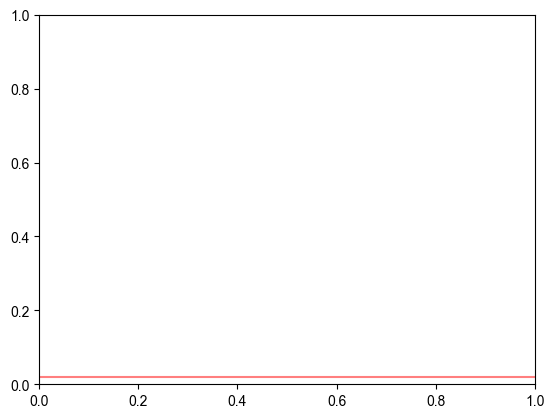

In [13]:

def plot(idx, color, m=2, theta=0.0125):

    # array of mean reward for each round over reps for a given trial
    z = record[f'{m}']['reward_list'][idx][:, 0].mean(axis=0)
    name = record['0']['names'][idx]

    # steady-state reward : last ~50
    mu_ref = z[-50:].mean()

    # residuals
    res = (z - mu_ref)**2

    # 1d convolution over y
    kc = 30
    y = convolve1d(res, np.ones(kc), mode="constant")/kc

    # point of stability
    cy_idx = np.where(y<theta)[0].min()
    plt.axvline(cy_idx, color=color, alpha=0.5, linestyle='-.',
                label=f"{cy_idx}")

    plt.plot(convolve1d(z, np.ones(kc), mode="constant")/kc,
             color=color,
             alpha=0.5, label=f"{name} residuals")
    plt.plot(y, alpha=0.5, linestyle='--', color=color,
             label=f"{name} rewards")

theta = 0.02
plt.axhline(y=theta, color='red', alpha=0.5)
plot(idx=1, color='grey', theta=theta)
plot(idx=2, color='blue', theta=theta)
plot(idx=3, color='green', theta=theta)
plt.legend(loc="lower right")
plt.show()

[0.14058667 0.14179    0.14499333 0.14819667 0.1514     0.15460333
 0.15780667 0.15901    0.16021333 0.16341667 0.16662    0.16982333
 0.17302667 0.17623    0.1981     0.1961     0.17743333 0.15676667
 0.15476667 0.15476667 0.15476667 0.17543333 0.17543333 0.15676667
 0.1381     0.1381     0.11943333 0.1381     0.15676667 0.17543333
 0.1941     0.21476667 0.21276667 0.21276667 0.23143333 0.23143333
 0.23143333 0.23343333 0.23543333 0.23543333 0.2541     0.2541
 0.2521     0.2521     0.2521     0.2541     0.2541     0.2561
 0.27676667 0.27676667 0.27676667 0.2581     0.27876667 0.27876667
 0.27876667 0.27676667 0.27676667 0.2581     0.23943333 0.22076667
 0.2021     0.18343333 0.18543333 0.18543333 0.16476667 0.16276667
 0.16076667 0.16076667 0.16076667 0.16076667 0.1421     0.16076667
 0.16276667 0.18143333 0.16276667 0.16276667 0.16276667 0.18143333
 0.16276667 0.16276667 0.16276667 0.16276667 0.1441     0.1441
 0.1441     0.1441     0.1441     0.1441     0.1441     0.1421
 0.16076667

NameError: name 'rounds' is not defined

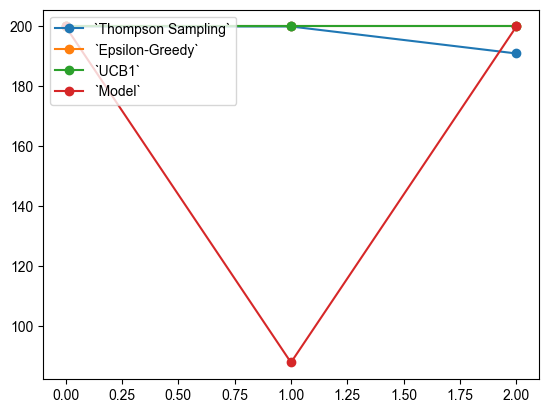

In [14]:
""" make the plot over different `K` """

def calc_stability_points(record, idx):

    points = []

    for _, k_record in record.items():

        # array of mean reward for each round over reps for a given trial
        z = k_record['reward_list'][idx][:, 0].mean(axis=0)
        name = k_record['names'][idx]

        # steady-state reward : last ~50
        mu_ref = z[-50:].mean()

        # residuals
        res = (z - mu_ref)**2

        # 1d convolution over y
        kc = 30
        y = convolve1d(res, np.ones(kc), mode="constant")/kc

        # point of stability
        print(y)
        p = np.where(y<0.02)[0]
        if len(p) < 2:
            points += [len(z)]
        else:
            points += [p.min()]

    return points, name


""" make plot """

colors = plt.cm.tab10(range(4))
for i in range(4):

    points, name = calc_stability_points(record, idx=i)

    print(f"{name}: {points}")

    plt.plot(points, '-o', color=colors[i], label=name)

# plt.yticks(np.arange(0, 1, 0.01), ())
plt.legend(loc="upper left")
plt.xticks(range(len(rounds)), rounds)
plt.grid()
plt.show()

-------------------------
## **Smooth**

In [ ]:
""" settings """
settings2 = Settings()
settings2.rounds = 1
settings2.trials = 300
settings2.reps = 2
settings2.K = 10
settings2.env = "smooth2"

In [ ]:
""" run """
record2 = {}

rounds = [1, 2]
for i, k in tqdm(zip(range(len(rounds)), rounds)):
    print(f"{i=} {k=}")
    settings2.rounds = k
    results2 = main.main_multiple(args=settings2)
    record2[str(i)] = results2

print("done")

In [ ]:
record2['0']['reward_list'].shape

In [ ]:
record2['0']['upper_bound_list'][:, 0].shape

In [ ]:
record2['0']['reward_list'][-1].mean(axis=0).mean(axis=1).shape

In [ ]:
z = record2['0']['reward_list'][-1].mean(axis=0).mean(axis=1)
mu_ref = z[-50:].mean()
res = (z - mu_ref)**2
y = convolve1d(res, np.ones(50), mode="constant")/50

kc = 100
yc = convolve1d(z, np.ones(kc), mode="constant")/kc
# plt.plot(y)
plt.plot(yc)

plt.show()

In [ ]:
def relu(x):
    return x*(x>0).astype(int)

In [ ]:

def calc_reg(record, ki, mi):
    z = record[f'{ki}']['reward_list'][mi].mean(axis=0).mean(axis=1)
    upper = record['0']['upper_bound_list'][0]
    res = relu(upper - z)
    return res.sum()


colors = plt.cm.tab10(range(4))
for i in range(4):
    res_m = []
    for ki in range(4):
        res_m += [calc_reg(record2, ki, i)]

    name = record2['0']['names'][i]
    plt.plot(res_m, '-o', color=colors[i], 
             label=name)

plt.legend(loc="upper left")
plt.xticks(range(4), rounds)
# plt.ylim(0, 200)
plt.show()

In [ ]:
z = record2[f'3']['reward_list'][1].mean(axis=0).mean(axis=1)
plt.plot(z)
plt.show()

In [ ]:
upper = record['0']['upper_bound_list'][0]
upper.shape

---
## Analysis

#### from saved runs

In [18]:
os.listdir('src/data')

['run_07122024_180644',
 'entropy_run_20241206-001613.json',
 'run_07122024_180743',
 'entropy_run_20241205-225936.json']

In [68]:
path = f"{os.getcwd()}/src/data/run_27112024_213424/{os.listdir('src/data/run_28112024_131920')[-1]}"
logger(path)
with open(path, "r") as f:
    data = json.load(f)

game_names = list(data.keys())
logger(game_names)

2024-11-29 14:30:30 | /Users/daniekru/Research/lab/minBandit/src/data/run_27112024_213424/large_run_results_K10.json
2024-11-29 14:30:30 | ['KABv0', 'KABdriftv0', 'KABdriftv1', 'KABsinv0']


In [69]:
data[game_names[0]].keys()

dict_keys(['reward_list', 'chance_list', 'upper_bound_list', 'best_arm_list', 'arm_list', 'scores', 'score_list', 'names', 'entropy_list'])

In [165]:
""" print score for all """

#run_id = "run_02122024_112037"
#run_id = "run_30112024_231651"
run_id = "run_02122024_154742"

path = f"{os.getcwd()}/src/data/{run_id}/"

for run_path in os.listdir(f'src/data/{run_id}'):
    K = run_path.split(".")[0].split("K")[1]
    print(f"### {K=} " + "#"*50 + "\n")
    with open(f"{path}{run_path}", "r") as f:
        data = json.load(f)
    
    for (k, v) in data.items():
    
        print(f"[{k}]")
        print(f"\tmax:    {np.mean(v['upper_bound_list']):.3f}")
        print(f"\tchance: {np.mean(v['chance_list']):.3f}")
    
        for i, name in enumerate(v['names']):
            print(f"\t{name}:\t{v['scores'][i]:.3f} +/- {np.var(v['score_list'][i]):.5f}")
    
        print()

### K='100' ##################################################

[KABv0]
	max:    0.900
	chance: 0.187
	`Thompson Sampling`:	0.891 +/- 0.00039
	`Epsilon-Greedy`:	0.555 +/- 0.08121
	`UCB1`:	0.834 +/- 0.00765
	`Model`:	0.900 +/- 0.00053

[KABdriftv0]
	max:    0.883
	chance: 0.188
	`Thompson Sampling`:	0.627 +/- 0.01418
	`Epsilon-Greedy`:	0.576 +/- 0.01682
	`UCB1`:	0.554 +/- 0.00950
	`Model`:	0.650 +/- 0.02031

[KABsinv0]
	max:    0.020
	chance: 0.010
	`Thompson Sampling`:	0.015 +/- 0.00006
	`Epsilon-Greedy`:	0.020 +/- 0.00013
	`UCB1`:	0.014 +/- 0.00009
	`Model`:	0.010 +/- 0.00006

[KABsinv1]
	max:    0.682
	chance: 0.208
	`Thompson Sampling`:	0.669 +/- 0.00246
	`Epsilon-Greedy`:	0.619 +/- 0.00077
	`UCB1`:	0.611 +/- 0.00455
	`Model`:	0.662 +/- 0.00134



In [105]:
os.listdir(f'src/data/{run_id}')

['large_run_results_K100.json',
 'large_run_results_K5.json',
 'large_run_results_K10.json']

In [104]:
""" print score for all """

#run_id = "run_30112024_190927"
#run_id = "run_30112024_231651"
run_id = "run_02122024_112037"

path = f"{os.getcwd()}/src/data/{run_id}/"

for run_path in os.listdir(f'src/data/{run_id}'):
    K = run_path.split(".")[0].split("K")[1]
    print(f"### {K=} " + "#"*50 + "\n")
    with open(f"{path}{run_path}", "r") as f:
        data = json.load(f)
    
    for (k, v) in data.items():
    
        print(f"[{k}]")
        print(f"\tmax:    {np.mean(v['upper_bound_list']):.3f}")
        print(f"\tchance: {np.mean(v['chance_list']):.3f}")
    
        for i, name in enumerate(v['names']):
            print(f"\t{name}:\t{v['scores'][i]:.5f} +/- {np.var(v['score_list'][i]):.6f}")
    
        print()

### K='100' ##################################################

[KABv0]
	max:    0.900
	chance: 0.184
	`Thompson Sampling`:	0.89800 +/- 0.000208
	`Epsilon-Greedy`:	0.62567 +/- 0.095860
	`UCB1`:	0.85583 +/- 0.010917
	`Model`:	0.90100 +/- 0.000582

[KABdriftv0]
	max:    0.881
	chance: 0.181
	`Thompson Sampling`:	0.61417 +/- 0.014815
	`Epsilon-Greedy`:	0.49567 +/- 0.024920
	`UCB1`:	0.57650 +/- 0.010365
	`Model`:	0.61517 +/- 0.024371

[KABsinv0]
	max:    0.020
	chance: 0.010
	`Thompson Sampling`:	0.01067 +/- 0.000060
	`Epsilon-Greedy`:	0.01567 +/- 0.000076
	`UCB1`:	0.00933 +/- 0.000071
	`Model`:	0.00783 +/- 0.000043

[KABsinv1]
	max:    0.673
	chance: 0.212
	`Thompson Sampling`:	0.66000 +/- 0.001372
	`Epsilon-Greedy`:	0.63183 +/- 0.001236
	`UCB1`:	0.59500 +/- 0.004763
	`Model`:	0.64617 +/- 0.002351

### K='5' ##################################################

[KABv0]
	max:    0.900
	chance: 0.298
	`Thompson Sampling`:	0.76117 +/- 0.046116
	`Epsilon-Greedy`:	0.55633 +/- 0.088007
	`UCB1`:	0

In [87]:
env_names = tuple(data.keys())
env_names

('KABv0', 'KABdriftv0', 'KABdriftv1', 'KABsinv0')

---

In [128]:
big_data = {}
#run_list = ("run_30112024_190927", "run_30112024_231651") # previous
run_list = ("run_02122024_112037", None)

for run_id in run_list:
    if run_id is None:
        continue

    path = f"{os.getcwd()}/src/data/{run_id}/"

    logger(f"loading {run_id}...")
    run_path_list = os.listdir(f'src/data/{run_id}')
    sorted(run_path_list)
    for run_path in tqdm(os.listdir(f'src/data/{run_id}')):
        K = run_path.split(".")[0].split("K")[1]
        with open(f"{path}{run_path}", "r") as f:
            data = json.load(f)

        big_data[int(K)] = data

    del data

keys = list(big_data.keys())
keys.sort()
big_data = {i: big_data[i] for i in keys}

2024-12-02 14:12:16 | loading run_02122024_112037...
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:13<00:00,  4.65s/it]


In [129]:
big_data.keys()

dict_keys([5, 10, 100])

In [130]:
games = {}
for k, run in big_data.items():
    for e, data in run.items():
        if e not in games.keys():
            games[e] = {"mean": [], "std": [], "max": [], "min": []}
            
        games[e]["mean"] += [data["scores"]]
        games[e]["std"] += [np.array(data["score_list"]).std(axis=1).mean(axis=1).tolist()]
        games[e]["max"] += [np.mean(data["upper_bound_list"])]
        games[e]["min"] += [np.mean(data["chance_list"])]

logger(games.keys())

k_names = tuple(big_data.keys())
logger(k_names)
mod_names = big_data[5]["KABv0"]['names']
logger(mod_names)
env_names = ("KAB-0", "KAB-$\\epsilon$", "KAB-$\\sin$v0", "KAB-$\\sin$v1")
logger(env_names)

2024-12-02 14:12:35 | dict_keys(['KABv0', 'KABdriftv0', 'KABsinv0', 'KABsinv1'])
2024-12-02 14:12:35 | (5, 10, 100)
2024-12-02 14:12:35 | ['`Thompson Sampling`', '`Epsilon-Greedy`', '`UCB1`', '`Model`']
2024-12-02 14:12:35 | ('KAB-0', 'KAB-$\\epsilon$', 'KAB-$\\sin$v0', 'KAB-$\\sin$v1')


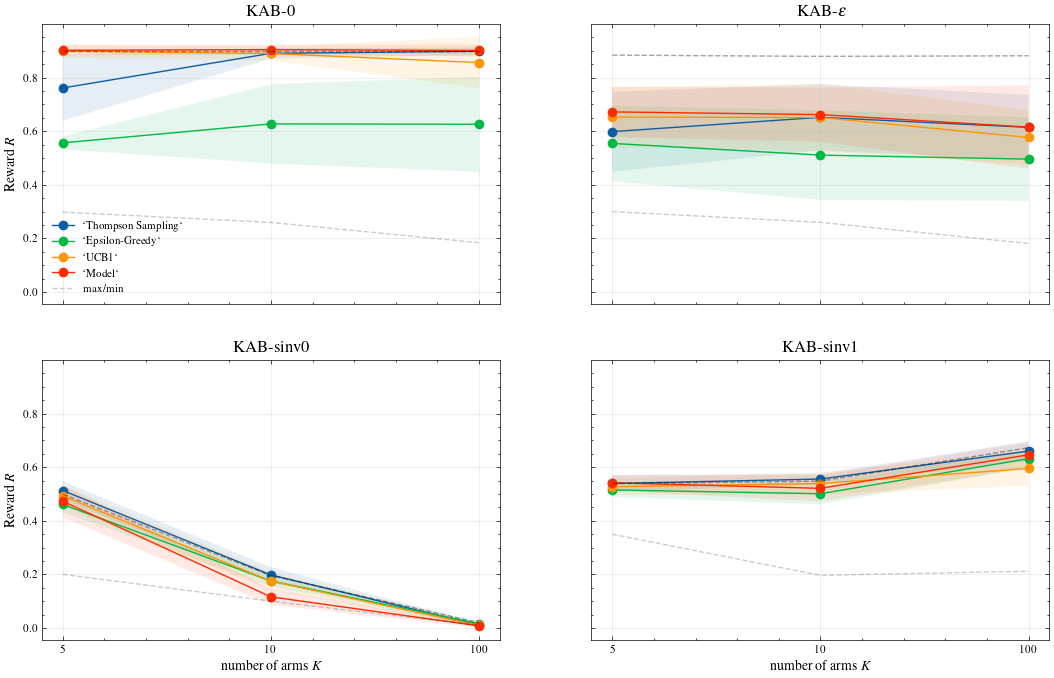

In [131]:
fig, axs = plt.subplots(2, 2, figsize=(13, 8), sharex=True, sharey=True)
axs = axs.flatten()
for j, (ax, (k, v)) in enumerate(zip(axs, games.items())):

    m = np.array(v['mean'])
    s = np.array(v['std'])
    for i in range(4):
        if j == 0:
            ax.plot(range(len(k_names)), m[:, i], '-o', label=f"{mod_names[i]}")
        else:
            ax.plot(range(len(k_names)), m[:, i], '-o', label=f"{mod_names[i]}")
        ax.fill_between(range(len(k_names)),
                     m[:, i] - s[:, i],
                     m[:, i] + s[:, i],
                     alpha=0.1)

    ax.plot(v['max'], color="black", alpha=0.2, linestyle="--")
    ax.plot(v['min'], color="black", alpha=0.2, linestyle="--")
    ax.set_title(f"{env_names[j]}")
    ax.set_xticks(range(len(k_names)))
    ax.set_xticklabels(k_names)

    if j % 2 == 0:
        ax.set_ylabel("Reward $R$")
    if j > 1:
        ax.set_xlabel("number of arms $K$")

    ax.grid(alpha=0.3)
    if j == 0:
        ax.plot(v['max'], color="black", alpha=0.2, linestyle="--", label="max/min")
        ax.legend(loc="lower left")
    else:
        ax.plot(v['max'], color="black", alpha=0.2, linestyle="--")

plt.show()


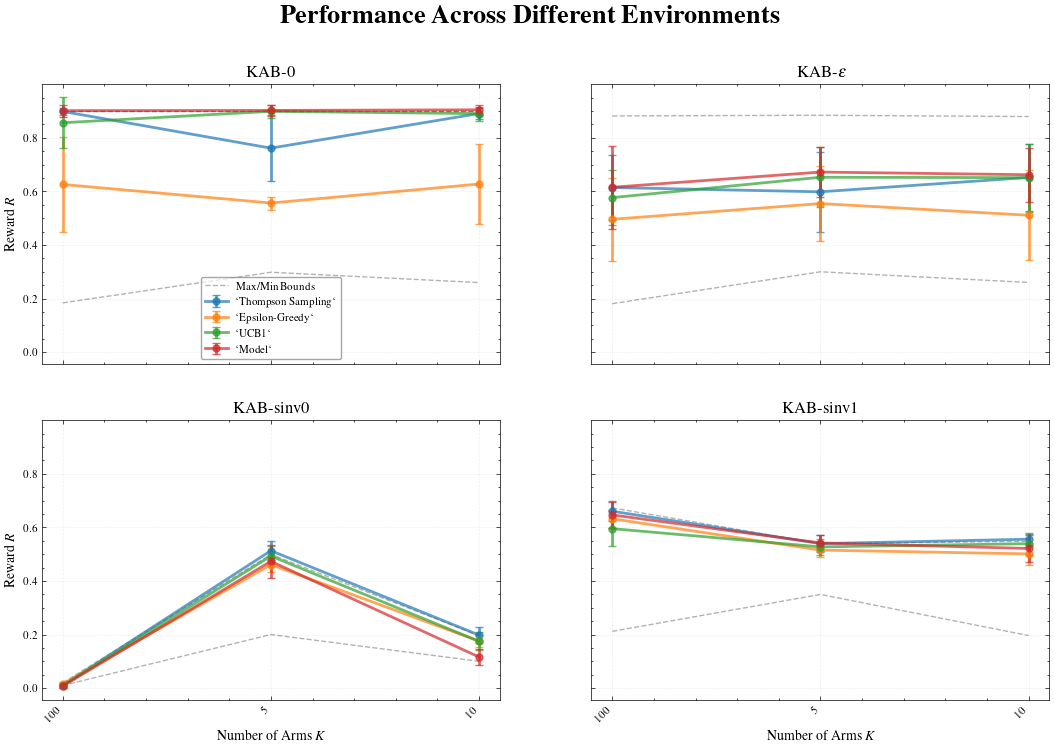

In [115]:
# Set the style and font for a professional, publication-ready look
#plt.style.use('science')  # Requires matplotlib-style package
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times', 'Computer Modern Roman'],
    'text.usetex': True,
    'axes.labelsize': 10,
    'font.size': 10,
    'legend.fontsize': 8,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8
})

# Create figure with improved layout
fig, axs = plt.subplots(2, 2, figsize=(13, 8), 
                        sharex=True, sharey=True, 
                        constrained_layout=False)
axs = axs.flatten()

# Color palette - colorblind-friendly
colors = sns.color_palette("tab10", 4)

for j, (ax, (k, v)) in enumerate(zip(axs, games.items())):
    m = np.array(v['mean'])
    s = np.array(v['std'])
    
    for i in range(4):
        # Plot mean with error bands
        ax.errorbar(range(len(k_names)), m[:, i], 
                    yerr=s[:, i], 
                    fmt='-o', 
                    color=colors[i],
                    capsize=3,
                    label=f"{mod_names[i]}",
                    alpha=0.7,
                    linewidth=2,
                    markersize=5)
    
    # Max and min lines
    ax.plot(v['max'], color="black", alpha=0.3, linestyle="--", linewidth=1)
    ax.plot(v['min'], color="black", alpha=0.3, linestyle="--", linewidth=1)
    
    # Formatting
    ax.set_title(f"{env_names[j]}", fontweight='bold')
    ax.set_xticks(range(len(k_names)))
    ax.set_xticklabels(k_names, rotation=45, ha='right')
    
    # Y-axis label only for leftmost plots
    if j % 2 == 0:
        ax.set_ylabel(r"Reward $R$")
    
    # X-axis label only for bottom plots
    if j > 1:
        ax.set_xlabel(r"Number of Arms $K$")
    
    ax.grid(alpha=0.2, linestyle='--')
    
    # Legend only for the first subplot
    if j == 0:
        ax.plot(v['max'], color="black", alpha=0.3, linestyle="--", 
                label="Max/Min Bounds", linewidth=1)
        ax.legend(loc="best", frameon=True, 
                  fancybox=True, 
                  framealpha=0.7, 
                  edgecolor='gray')

# Adjust overall figure appearance
fig.suptitle(r'\textbf{Performance Across Different Environments}', 
             fontsize=19, y=0.98)

# Save with high DPI for publication
#plt.savefig('minBandit/paper/figures/performance_plot.png',  dpi=500, bbox_inches='tight')
plt.show()

---
#### from saved run II

In [162]:
""" list available runs """
path_ = r'src/tmp'
#path_ = r"../pigeon/data"
#data_list = os.listdir('../pigeon/data')
#data_list = os.listdir('minBandit/src/data')
data_list = os.listdir(path_)

for i, dl in enumerate(data_list):
    if dl[:6] == 'run_17':
        print(f"{i}: {dl}")
        print(f"\t{os.listdir(path_+'/'+dl)[0]}\n")

#[f"{i}: {dl}" for i, dl in enumerate(data_list)]

1: run_17122024_171442
	large_run_%5%10%50%100%200%1000.json



In [164]:
indexes = [1]
#indexes = [0]
env_names = ("KAB-0", "KAB-$\\epsilon$", "KAB-$\\sin$v0", "KAB-$\\sin$v1")
mod_names = ['Thompson Sampling', '$\\epsilon$-Greedy', 'UCB1', 'Model']

""" loop over the saved and selected datasets """
all_contents = []
k_names = []
for idx in indexes:

    logger(f"parsing dataset {idx}")

    """ pick and load dateset """
    #path_to_file = f"pigeon/data/{data_list[idx]}/"
    path_to_file = f"{path_}/{data_list[idx]}/"
    file = os.listdir(path_to_file)[0]
    
    with open(f"{path_to_file}/{file}", "r") as f:
        data = json.load(f)
        
    k_names += list(data['0'].keys())
        
    """ parse dataset """
    num_ks = len(data['0'].keys())
    num_reps = len(data.keys())
    content = {key: {"scores": np.zeros((num_ks, num_reps, 4)),
                     "max": np.zeros((num_ks, num_reps, 1)),
                     "chance": np.zeros((num_ks, num_reps, 1))} for key in data['0'][k_names[-1]]}
    
    for ir, rep in tqdm(data.items()):
        for ik, (_, k_run) in enumerate(rep.items()):  
            for game_name, values in k_run.items():
                content[game_name]["scores"][ik, int(ir)] = values["score"]
                content[game_name]["max"][ik, int(ir)] = values["max"]
                content[game_name]["chance"][ik, int(ir)] = values["chance"]
    
    """ compute mean and std """
    for game_name in content:
        scores = content[game_name]["scores"]
        stats = {
            "means": scores.mean(axis=1),
            "std": scores.std(axis=1),
            "max": content[game_name]["max"].mean(axis=1),
            "chance": content[game_name]["chance"].mean(axis=1),
        }
        content[game_name]["stats"] = stats    
    #
    all_contents += [content]

""" merge datasets """
logger("merging datasets..")
ref_content = all_contents[0]
for content in all_contents[1:]:
    for env_, data_ in content.items():
        ref_content[env_]['stats']['means'] = np.vstack((ref_content[env_]['stats']['means'],
                                                        data_['stats']['means']))
        ref_content[env_]['stats']['std'] = np.vstack((ref_content[env_]['stats']['std'],
                                                        data_['stats']['std']))
        ref_content[env_]['stats']['max'] = np.vstack((ref_content[env_]['stats']['max'],
                                                        data_['stats']['max']))
        ref_content[env_]['stats']['chance'] = np.vstack((ref_content[env_]['stats']['chance'],
                                                        data_['stats']['chance']))
content = ref_content
logger("[done]")

2024-12-17 18:16:17 | parsing dataset 1
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 13123.60it/s]
2024-12-17 18:16:17 | merging datasets..
2024-12-17 18:16:17 | [done]


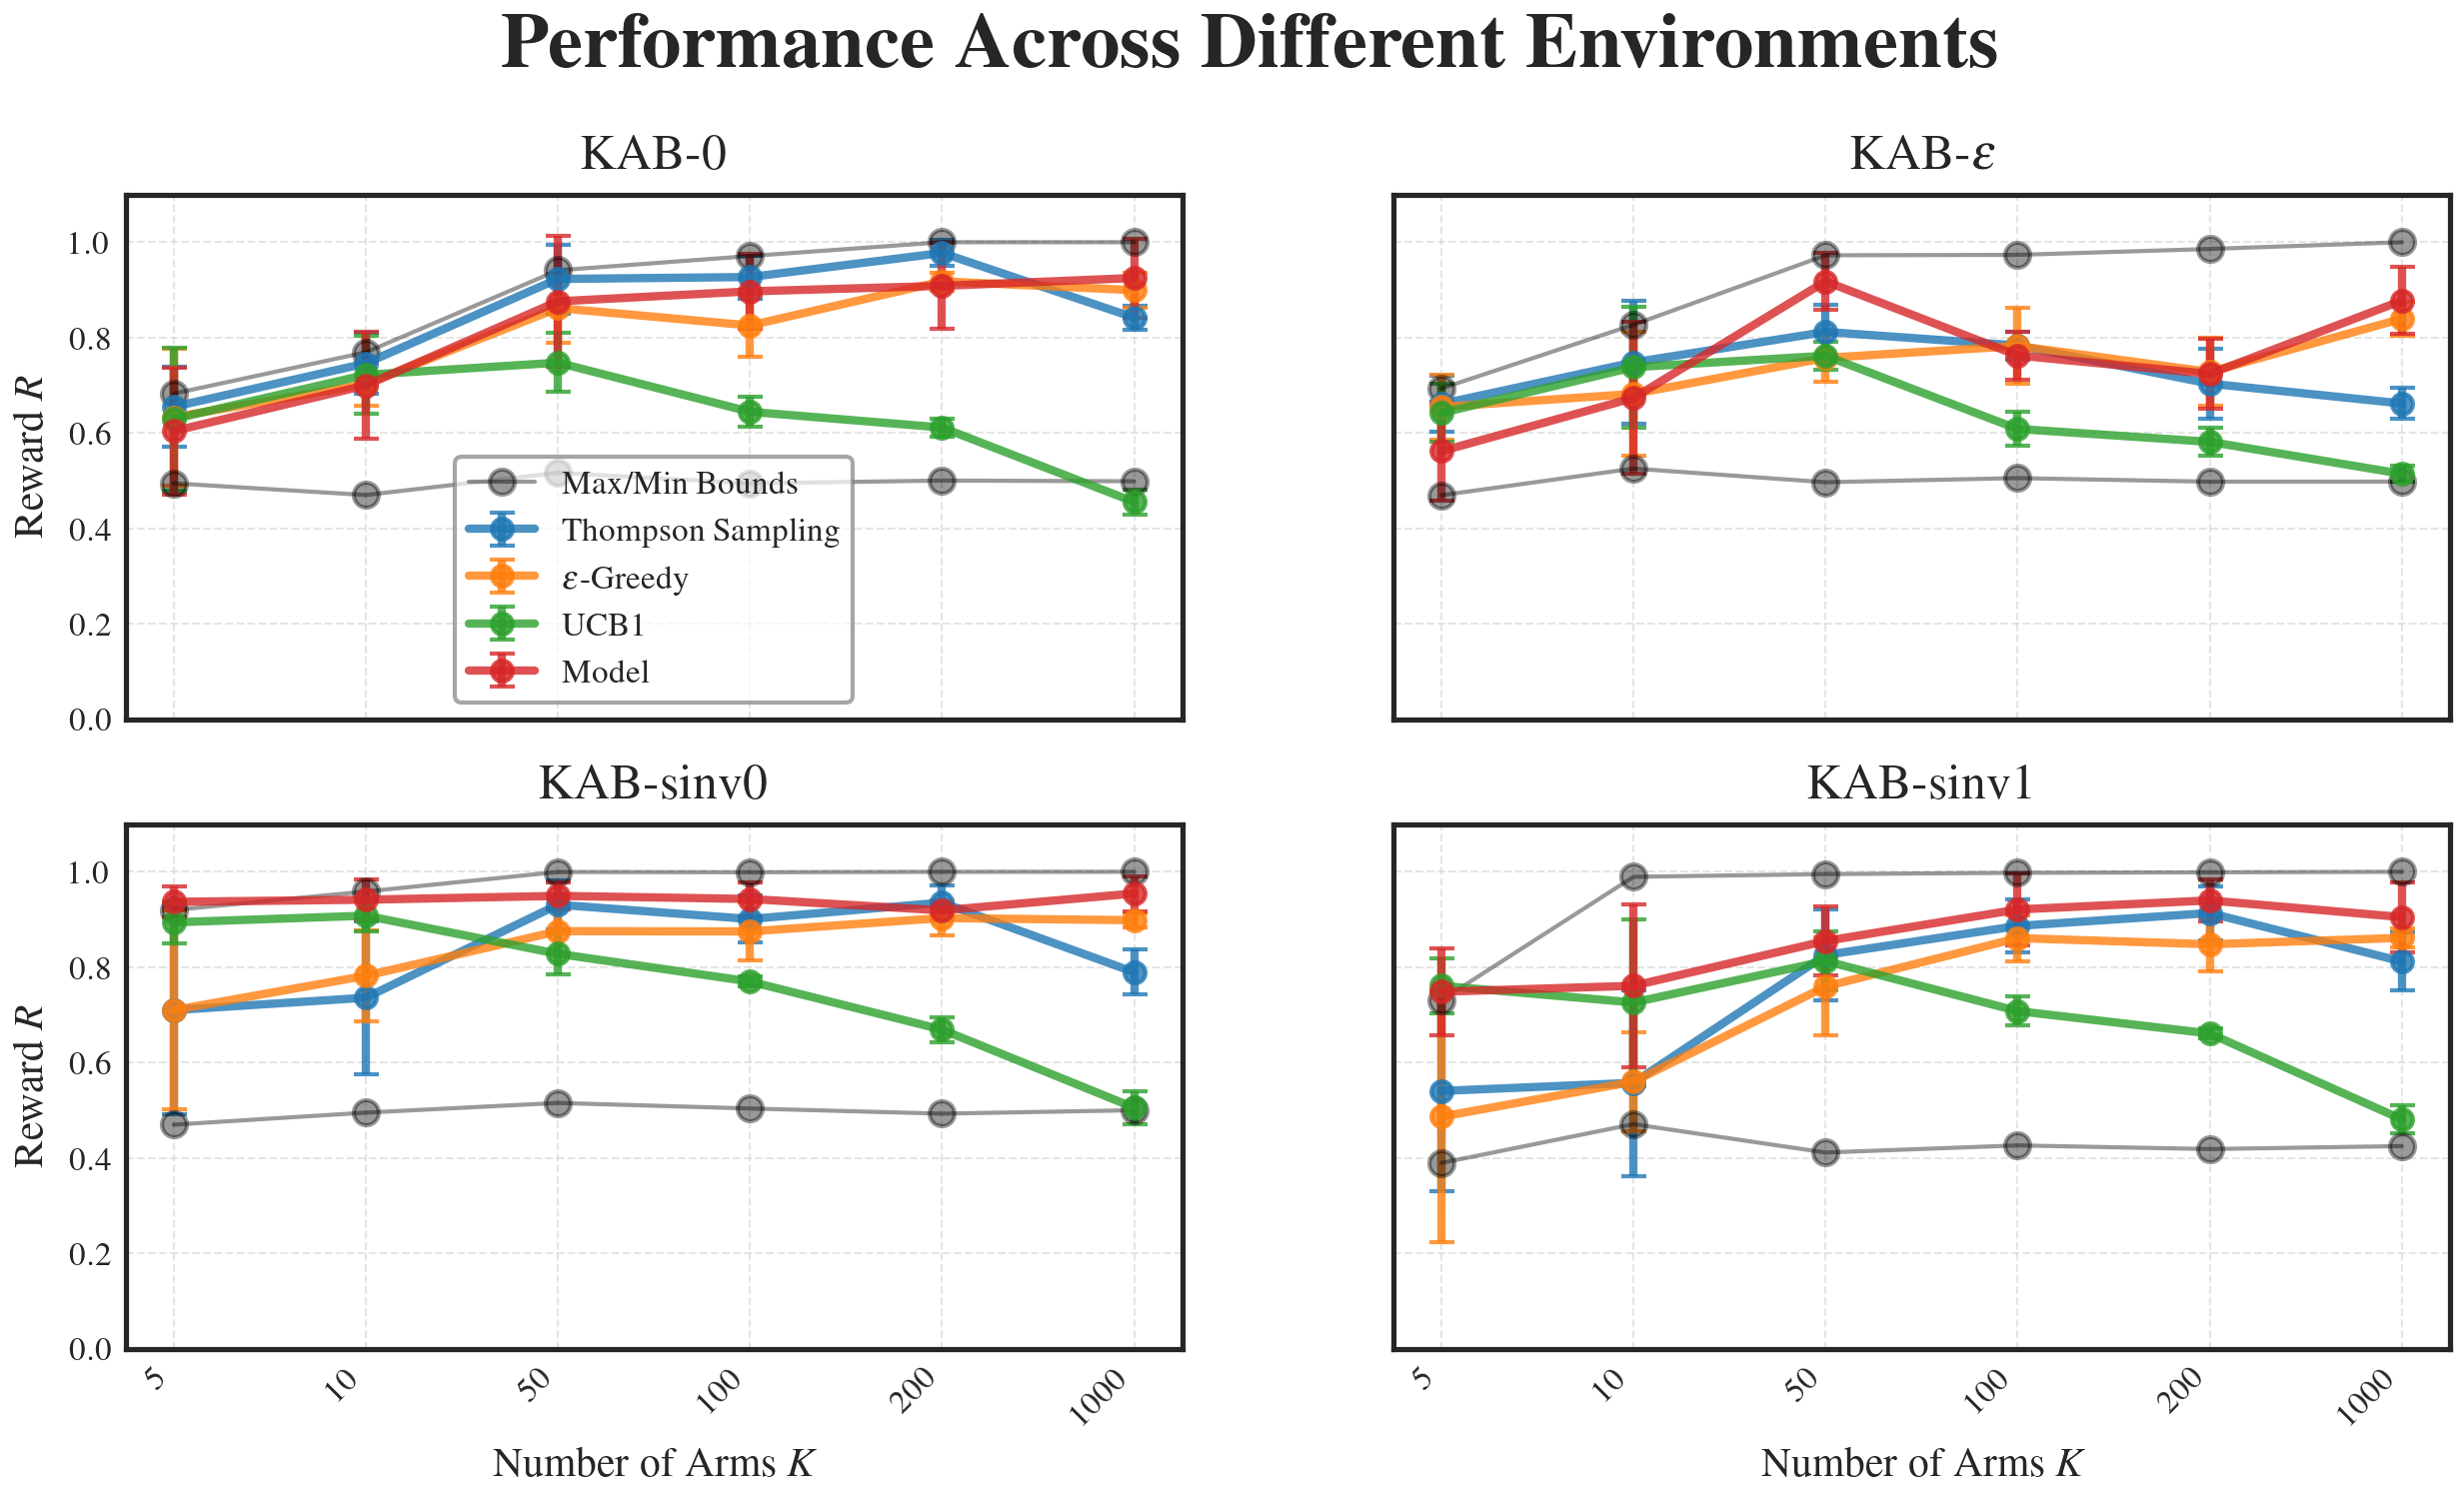

In [165]:
""" plot """
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times', 'Computer Modern Roman'],
    'text.usetex': True,
    'axes.labelsize': 10,
    'font.size': 10,
    'legend.fontsize': 8,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8
})

# Create figure with improved layout
fig, axs = plt.subplots(2, 2, figsize=(10, 5), 
                        sharex=True, sharey=True, 
                        constrained_layout=False)
axs = axs.flatten()

# Color palette - colorblind-friendly
colors = sns.color_palette("tab10", 4)

for j, (ax, game_name) in enumerate(zip(axs, content)):
    
    m = content[game_name]['stats']['means']
    s = content[game_name]['stats']['std']
    upper = content[game_name]['stats']['max']
    lower = content[game_name]['stats']['chance']
    
    for i in range(4):
        # Plot mean with error bands
        ax.errorbar(range(len(k_names)), 
                    m[:, i], 
                    yerr=s[:, i], 
                    fmt='-o', 
                    color=colors[i],
                    capsize=3,
                    label=f"{mod_names[i]}",
                    alpha=0.8,
                    linewidth=2,
                    markersize=5)
    
    # Formatting
    ax.set_title(f"{env_names[j]}", fontweight='bold')
    ax.set_xticks(range(len(k_names)))
    ax.set_xticklabels(k_names, rotation=45, ha='right')
    ax.set_ylim(0, 1.1)
    
    # Y-axis label only for leftmost plots
    if j % 2 == 0:
        ax.set_ylabel(r"Reward $R$")
    
    # X-axis label only for bottom plots
    if j > 1:
        ax.set_xlabel(r"Number of Arms $K$")
    
    ax.grid(alpha=0.5, linestyle='--')
    
    # Legend only for the first subplot
    if j == 0:
        ax.plot(upper, '-o', color="black", alpha=0.4, 
                label="Max/Min Bounds", linewidth=1)
        ax.plot(lower, "-o", color="black", alpha=0.4, linewidth=1)
        
        ax.legend(loc="best", frameon=True, 
                  fancybox=True, 
                  framealpha=0.7, 
                  edgecolor='gray')
    else:
        # Max and min lines
        ax.plot(upper, "-o", color="black", alpha=0.4, linewidth=1)
        ax.plot(lower, "-o", color="black", alpha=0.4, linewidth=1)

# Adjust overall figure appearance
fig.suptitle(r'\textbf{Performance Across Different Environments}', 
             fontsize=19, y=1.)

# Save with high DPI for publication
#plt.savefig(r'minBandit/paper/figures/performance_plot.png',  dpi=500, bbox_inches='tight')
plt.show()

In [227]:
m, s

(array([[0.5405, 0.4865, 0.761 , 0.7485],
        [0.5575, 0.56  , 0.726 , 0.761 ],
        [0.8255, 0.7595, 0.813 , 0.855 ],
        [0.8865, 0.861 , 0.708 , 0.921 ],
        [0.9135, 0.848 , 0.661 , 0.94  ],
        [0.812 , 0.8615, 0.481 , 0.905 ]]),
 array([[0.20952565, 0.26373092, 0.05724072, 0.09046546],
        [0.19485251, 0.10445095, 0.17475411, 0.17041567],
        [0.09516302, 0.10243779, 0.06187487, 0.07216301],
        [0.05642694, 0.04849227, 0.03018278, 0.07608548],
        [0.05680229, 0.05648894, 0.01031988, 0.04491659],
        [0.06056814, 0.01933908, 0.02874891, 0.07334848]]))

In [ ]:
f"\begin{tabular}{l c c c c c c c}
\toprule
\textbf{Model} & \textbf{$K=5$} & \textbf{$K=10} & \textbf{$K=50$} & \textbf{$K=100$} & \textbf{$K=200$} & \textbf{$K=1000$}\\
Thompson & $0.028\pm0.08$ & $0.023\pm064$ & $0.018\pm0.072$ & $0.044\pm0.045$ & $0.023\pm0.027$ & $0.0158\pm0.025$ \\
$\epsilon$-Greedy & $0.049\pm0.08$ & $0.067\pm064$ & $0.079\pm0.072$ & $0.146\pm0.045$ & $0.082\pm0.027$ & $0.101\pm0.025$ \\
UCB & $0.897$ & $0.656$ & $0.319$ \\
\textbf{Model} & $\mathbf{0.899}$

In [283]:
mnames = ("Thompson", "$\epsilon$-Greedy", "UCB", "\\textbf{Model}")
for j, (ax, game_name) in enumerate(zip(axs, content)):
    
    m = content[game_name]['stats']['means']
    s = content[game_name]['stats']['std']
    upper = content[game_name]['stats']['max']
    lower = content[game_name]['stats']['chance']
    regret = np.clip(upper - m, 0, 1)

    print(f"\n====| {game_name} |", "="*30)
    print(f"means:\n{m}\n\nstd:\n{s}\n\nregret:\n{regret}\n\nupper:\n{upper}\n\nchance:\n{lower}")

    rowtxt = ""
    for o in range(4):
        rowtxt += f"{mnames[o]} "
        for l in range(0, 6):
            if o == 3:
                rowtxt += f"& $\mathbf{{{regret[l, o]:.2f}({s[l, o]*100:.0f})}}$ "
            else:
                rowtxt += f"& ${regret[l, o]:.2f}({s[l, o]*100:.0f})$ "
        rowtxt += "\\\\\n"
    print(rowtxt)


====| KABv0 | ==============================
means:
[[0.655  0.633  0.6295 0.604 ]
 [0.746  0.7025 0.722  0.7   ]
 [0.923  0.862  0.7475 0.876 ]
 [0.927  0.8255 0.6445 0.897 ]
 [0.9775 0.918  0.6115 0.9085]
 [0.842  0.8995 0.4555 0.925 ]]

std:
[[0.08461678 0.14380021 0.15007831 0.13260468]
 [0.06437391 0.04549725 0.08096913 0.11209371]
 [0.07220457 0.07251552 0.06158328 0.13779151]
 [0.04512206 0.06471862 0.03159905 0.07822084]
 [0.02673948 0.01886796 0.01874833 0.08919922]
 [0.02481935 0.03665379 0.02671142 0.08299096]]

regret:
[[0.02760609 0.04960609 0.05310609 0.07860609]
 [0.02314476 0.06664476 0.04714476 0.06914476]
 [0.01812853 0.07912853 0.19362853 0.06512853]
 [0.04408659 0.14558659 0.32658659 0.07408659]
 [0.0225     0.082      0.3885     0.0915    ]
 [0.158      0.1005     0.5445     0.075     ]]

upper:
[[0.68260609]
 [0.76914476]
 [0.94112853]
 [0.97108659]
 [1.        ]
 [1.        ]]

chance:
[[0.49452265]
 [0.47003498]
 [0.51659435]
 [0.49435029]
 [0.50033857]
 [0.498

---
#### model entropy

In [113]:
os.listdir('src/data/run_28112024_131920')[0]

'large_run_results_K200.json'

In [168]:
run_path

['large_run_results_K100.json']

In [247]:
#run_id = "run_02122024_112037"
run_id = "run_02122024_154742"
run_path = os.listdir(f'src/data/{run_id}')[0]

K = int(run_path.split(".")[0].split("K")[1])
print(f"### {K=} " + "#"*50 + "\n")
with open(f"{path}{run_path}", "r") as f:
    data = json.load(f)


FileNotFoundError: [Errno 2] No such file or directory: 'src/data/run_02122024_154742'

[KABv0]


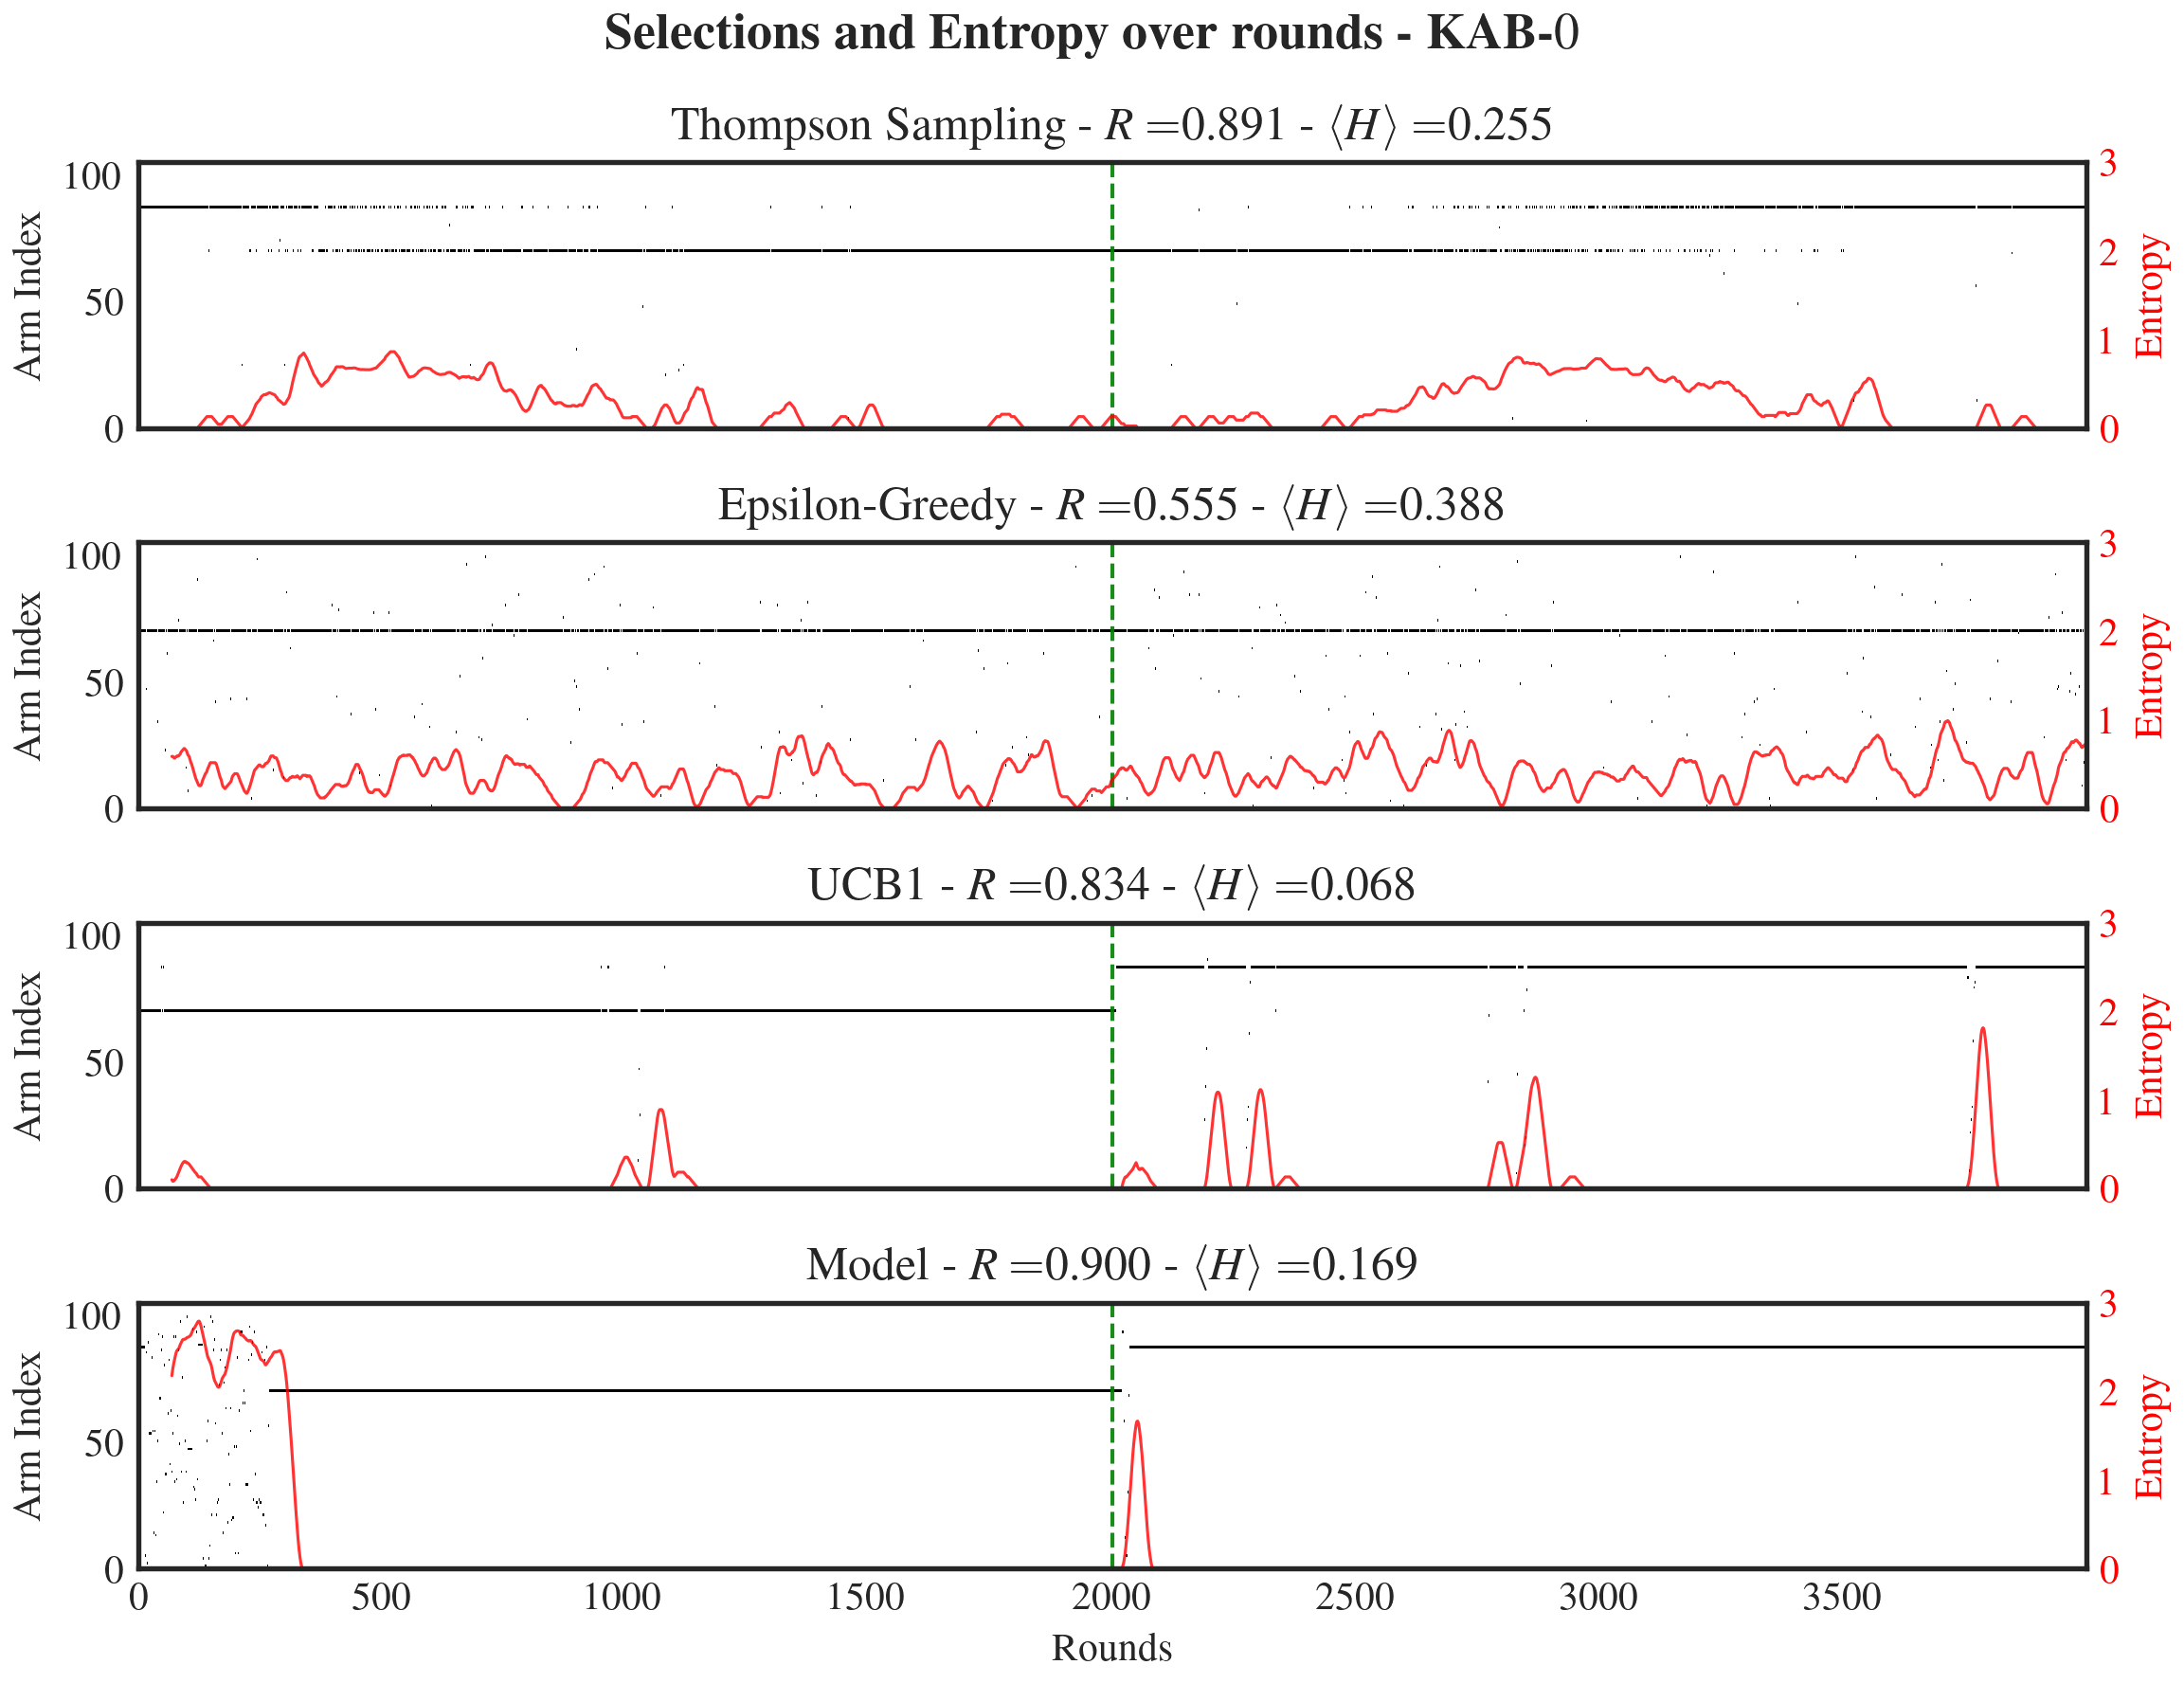

In [187]:
def create_publication_figure(data):
    plt.style.use('seaborn-v0_8-white')
    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['Times', 'Computer Modern Roman'],
        'font.size': 10,
        'axes.labelsize': 10,
        'axes.titlesize': 12,
        'axes.facecolor': 'white',
        'figure.facecolor': 'white',
        'figure.dpi': 300,
    })

    size = 20
    shape = np.array(data[list(data.keys())[0]]['arm_list']).shape
    trials = shape[2]
    rounds = shape[3]
    rep_i = 9

    for (k, v) in data.items():
        print(f"[{k}]")
        
        fig, axs = plt.subplots(4, 1, figsize=(8, 6), sharex=True)
        fig.tight_layout(pad=3.0, h_pad=2.0)
        
        twin_axs = [ax.twinx() for ax in axs]
        
        for i, (ax, twin_ax) in enumerate(zip(axs, twin_axs)):
            # Heatmap plot
            heatmap_data = np.array(v['arm_list'][i][rep_i]).reshape(rounds*trials, K).T
            #heatmap_data = np.array(v['arm_list'][i]).mean(axis=0).reshape(rounds*trials, K).T
            im = ax.imshow(heatmap_data, cmap="Greys", aspect="auto", interpolation="nearest", vmin=0, vmax=1)
            
            # Add vertical lines for trial boundaries
            for t in range(0, trials):
                ax.axvline(x=t*rounds, color='green', linestyle='--', alpha=0.9)
            
            # Entropy plot on secondary y-axis
            entropy = np.array(v['entropy_list'][i][rep_i]).reshape(-1)
            #entropy = np.array(v['entropy_list'][i]).mean(axis=0).reshape(-1)

            size_ety = 30
            entropy = np.convolve(entropy, np.ones(size_ety), mode="valid")/size_ety
            entropy_line = twin_ax.plot(range(trials*size+size_ety-1, rounds*trials), entropy, alpha=0.8, 
                                        color='red', lw=0.75, label='Entropy')
            
            # Formatting primary axis (heatmap)
            ax.set_ylim((0, K+5))
            ax.set_ylabel('Arm Index')
            
            # Formatting secondary axis (entropy)
            twin_ax.set_ylabel('Entropy', color='red')
            twin_ax.set_ylim((0, 3))
            twin_ax.tick_params(axis='y', labelcolor='red')
            
            # Title with performance metrics
            ax.set_title(f"{v['names'][i][1:-1]} - $R=${v['scores'][i]:.3f} - $\\langle H \\rangle=${entropy.mean():.3f}")
        
        # X-axis label for the bottom subplot
        axs[-1].set_xlabel('Rounds')
        
        # Adjust layout and add a overall title
        plt.suptitle(r'\textbf{Selections and Entropy over rounds - KAB-$0$}', fontsize=13, y=1.01)
        
        #plt.savefig(f'selections_entropy_{k}.png', bbox_inches='tight', dpi=500)
        
        plt.show()

        break

# Note: Make sure to define these variables before calling the function
# rounds, trials, size, K, rep_i should be defined from your original context
create_publication_figure(data)

In [29]:
def plot_c(data, settings, save=False):
    
    k, v = settings.env, data
    plt.style.use('seaborn-v0_8-white')
    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['Times', 'Computer Modern Roman'],
        'font.size': 10,
        'axes.labelsize': 10,
        'axes.titlesize': 12,
        'axes.facecolor': 'white',
        'figure.facecolor': 'white',
        'figure.dpi': 300,
    })

    size = 20
    trials = settings.trials
    rounds = settings.rounds
    rep_i = 0
    K = settings.K

    print(f"[{k}]")
    
    fig, axs = plt.subplots(4, 1, figsize=(8, 6), sharex=True)
    fig.tight_layout(pad=3.0, h_pad=2.0)
    
    twin_axs = [ax.twinx() for ax in axs]
    
    for i, (ax, twin_ax) in enumerate(zip(axs, twin_axs)):
        # Heatmap plot
        heatmap_data = np.array(v['arm_list'][i]).reshape(rounds*trials, K).T
        im = ax.imshow(heatmap_data, cmap="Greys", aspect="auto", interpolation="nearest", vmin=0, vmax=1)
        
        # Add vertical lines for trial boundaries
        for t in range(0, trials):
            ax.axvline(x=t*rounds, color='green', linestyle='--', alpha=0.9)
        
        # Entropy plot on secondary y-axis
        entropy = np.array(v['entropy_list'][i]).reshape(-1)
        entropy = np.convolve(entropy, np.ones(size), mode="valid") / size
        entropy_line = twin_ax.plot(range(trials*size, rounds*trials), entropy, alpha=0.7, 
                                    color='red', lw=0.3, label='Entropy')
        
        # Formatting primary axis (heatmap)
        ax.set_ylim((-5, K+5))
        ax.set_ylabel('Arm Index')
        
        # Formatting secondary axis (entropy)
        twin_ax.set_ylabel('Entropy', color='red')
        twin_ax.tick_params(axis='y', labelcolor='red')
        
        # Title with performance metrics
        ax.set_title(f"{v['names'][i][1:-1]} - $R=${v['scores'][i]:.3f} - $\\langle H \\rangle=${entropy.mean():.3f}")
        
        # X-axis label for the bottom subplot
        axs[-1].set_xlabel('Rounds')
        
        # Adjust layout and add a overall title
        plt.suptitle(f'Performance Analysis - {k}', fontsize=16, y=1.02)

        if save:
            plt.savefig(f'performance_analysis_{k}.png', 
                    bbox_inches='tight', 
                    dpi=500)
            print("saved")
        
    plt.show()



In [63]:
sweep_params = {
"alpha":0.4450195718988339,
"alpha_lr":-2.958221399416473,
"beta":7.391580370882872,
"beta_lr":0.9526338245859882,
"gain":47.86910588825282,
"lr":0.2773642826170334,
"mu":2.6713225228884383,
"mu_lr":-0.6084876849578418,
"r":0.5161936304182647,
"r_lr":0.044296190220556864,
"sigma":0.5450255193262612,
"sigma_lr":4.463404997440599,
"threshold":0.3842711049268154,
"w_max":2.461390370832377,
"K": None,
"dur_pre": 2000,
"dur_post": 2000,
"value_function": "gaussian",
"lr_function": "gaussian",}

In [56]:
params

{'alpha': 0.4450195718988339,
 'alpha_lr': -2.958221399416473,
 'beta': 7.391580370882872,
 'beta_lr': 0.9526338245859882,
 'gain': 47.86910588825282,
 'lr': 0.2773642826170334,
 'mu': 2.6713225228884383,
 'mu_lr': -0.6084876849578418,
 'r': 0.5161936304182647,
 'r_lr': 0.044296190220556864,
 'sigma': 0.5450255193262612,
 'sigma_lr': 4.463404997440599,
 'threshold': 0.3842711049268154,
 'w_max': 2.461390370832377}

In [80]:
sweep_params = utils.load_model(idx=None) # 1

{0: '6_best.json',
 1: '38_best.json',
 2: '14_best.json',
 3: '35_best.json',
 4: '27_best.json',
 5: '12_best.json',
 6: '18_best.json',
 7: '20_best.json',
 8: '1_best.json',
 9: '26_best.json',
 10: '37_best.json',
 11: '16_best.json',
 12: '2_best.json',
 13: '28_best.json',
 14: '10_best.json',
 15: '31_best.json',
 16: '22_best.json',
 17: '8_best.json',
 18: '3_best.json',
 19: '29_best.json',
 20: '24_best.json'}


KeyboardInterrupt: Interrupted by user

In [58]:
model_list[-1].

Model(K=10, dur_pre=2516, dur_post=2322)

In [255]:
settings1 = Settings()
settings1.rounds = 1000
settings1.trials = 3
settings1.reps = 10
settings1.verbose = True
settings1.idx = 1
settings1.env = "v0"
settings1.K = 100

logger(f"reps:   {settings1.reps}")
logger(f"trials: {settings1.trials}")
logger(f"rounds: {settings1.rounds}")
logger(f"env:    {settings1.env}")
#logger(f"argmax: {probabilities_set.argmax(axis=1)}")


# define proababilities set
probabilities_set = []
for i in range(settings1.trials):
    p = np.around(np.random.uniform(0.0, 1., settings1.K), 2)
    #p[np.random.randint(0, settings1.K)] = 0.9
    #p[i%K] = 0.9
    # p[np.random.randint(0, K)] = 0.9
    probabilities_set += [p.tolist()]

probabilities_set = np.array(probabilities_set)

def run_(settings, probabilities_set):
    
    # parameters
    K = settings1.K
    nb_rounds = settings1.rounds
    nb_trials = settings1.trials
    nb_reps = settings1.reps
    verbose = settings1.verbose
    env_type = settings1.env
    
    
    # define the environment
    #if env_type == "driftv0":
    #    env = envs.KABdriftv0(K=K,
     #                         probabilities_set=probabilities_set,
     #                         verbose=verbose,
     #                         tau=5)
    #elif env_type == "driftv1":
     #   env = envs.KABdriftv1(K=K,
      #                        verbose=verbose,
       #                       tau=100,
       #                       normalize=True,
        #                      fixed_p=0.9)
    #elif env_type == "sinv0":
     #   frequencies = np.linspace(0, 0.4, K)
      #  env = envs.KABsinv0(K=K,
     #                       frequencies=frequencies,
       #                     normalize=True,
        #                    verbose=verbose)
    #else:
      #  env = envs.KABv0(K=K,
       #                  probabilities_set=probabilities_set,
        #                 verbose=verbose)
    env = envs.make_new_env(K=K, nb_trials=nb_trials, env_type=env_type,
                           probabilities_set=probabilities_set)

    if verbose:
        logger.info(f"%env: {env}")

    
    # define models
    params = utils.load_model(idx=settings1.idx)
    params["K"] = K
    
    
    model_list = [
        mm.ThompsonSampling(K=K),
        mm.EpsilonGreedy(K=K, epsilon=0.1),
        mm.UCB1(K=K),
        mm.Model(**params)
    ]
    
    # run
    results = envs.trial_multiple_models(
                         models=model_list,
                         environment=env,
                         nb_trials=nb_trials,
                         nb_rounds=nb_rounds,
                         nb_reps=nb_reps,
                         entropy_calc=True,
                         verbose=settings1.verbose)
    return results

results_entr = run_(settings1, probabilities_set)

#plot_c(data=results, settings=settings1)

2025-01-30 17:02:42 | reps:   10
2025-01-30 17:02:42 | trials: 3
2025-01-30 17:02:42 | rounds: 1000
2025-01-30 17:02:42 | env:    v0
2025-01-30 17:02:42 | %env: KABv0
2025-01-30 17:02:42 | Invalid parameters for Model, using Modelv2 instead
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [20:43<00:00, 124.35s/it]


3 1000
[v0]
saved


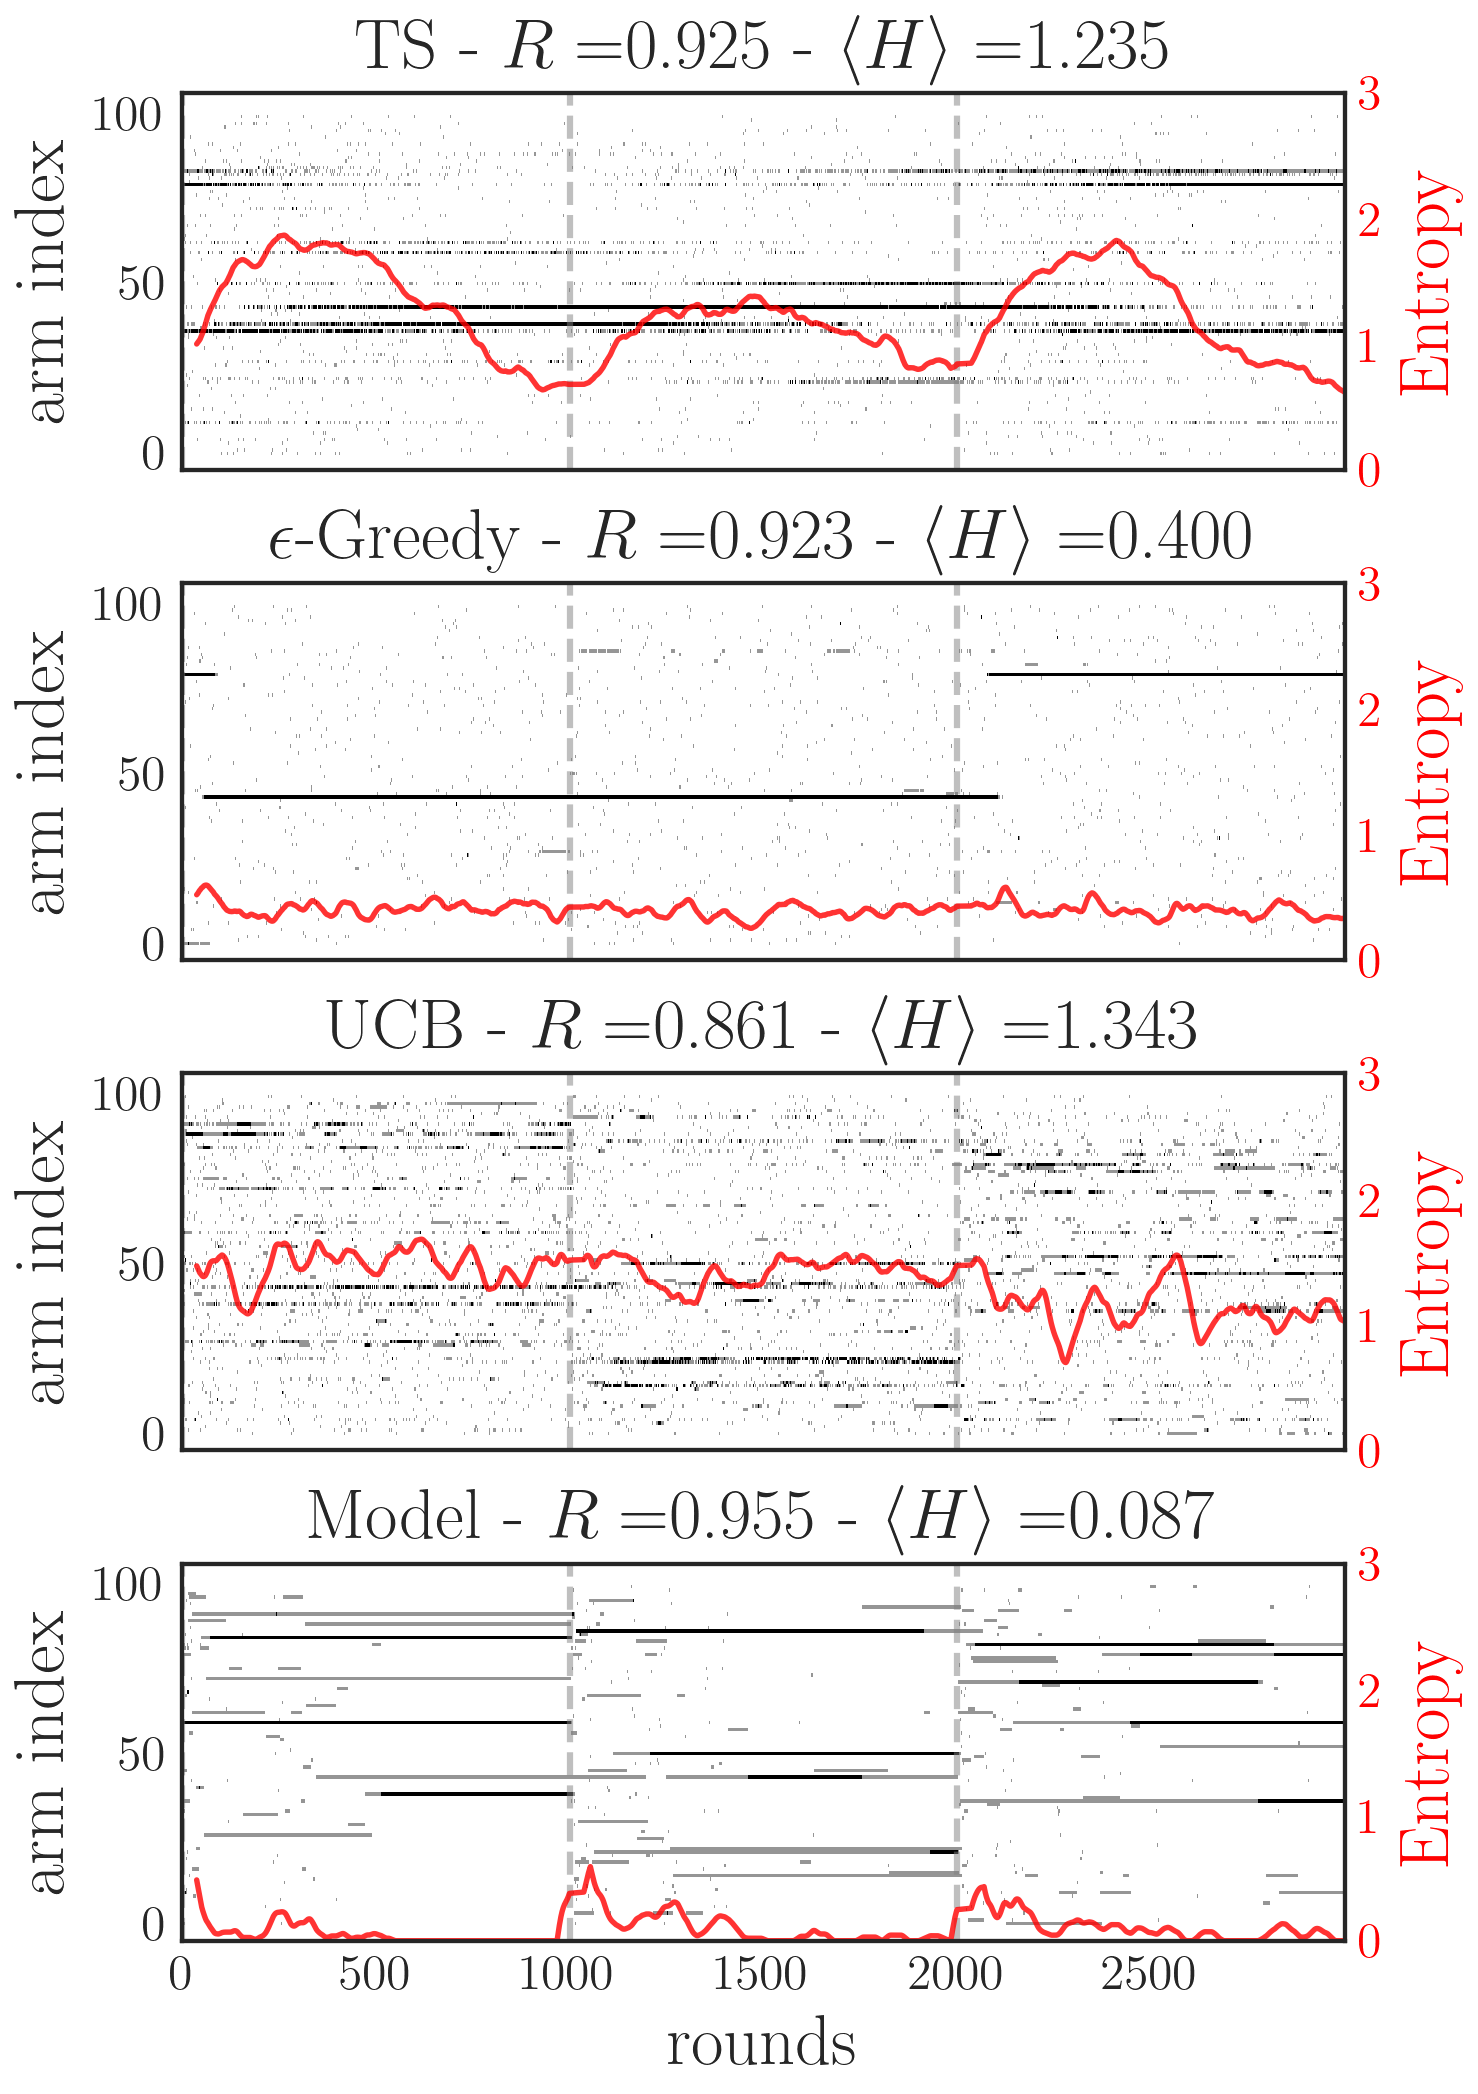

In [257]:
def plot_c(data, settings, save=False):
    
    k, v = settings.env, data
    plt.style.use('seaborn-v0_8-white')

    plt.rcParams.update({
    'figure.figsize': (10, 4),
    'figure.dpi': 300,
    'figure.subplot.wspace': 0.25,
    'figure.subplot.hspace': 0.3,
    
    'text.usetex': True,
    
    'font.size': 13,
    'font.family': 'serif',
    'font.weight': 'normal',
    'font.serif': ['Computer Modern Roman'],
    
    'legend.fontsize': 8,
    'legend.frameon': False,

    'axes.labelsize': 17,
    'axes.titlesize': 17,
    'axes.labelweight': 'normal',
    'axes.spines.top': True,
    'axes.spines.right': True,
    'axes.linewidth': 1., 

    'lines.linewidth': 1.0,
    'lines.markeredgewidth': 0.5,
    'lines.markeredgecolor': 'black',

    'xtick.labelsize': 12,
    'ytick.labelsize': 12,

    'savefig.format': 'pdf'
    })

    size = 50
    trials = settings.trials
    rounds = settings.rounds
    rep_i = 0
    K = settings.K
    print(trials, rounds)

    print(f"[{k}]")
    
    fig, axs = plt.subplots(4, 1, figsize=(5, 8), sharex=True)
    #fig.tight_layout(pad=3.0, h_pad=2.0)
    
    twin_axs = [ax.twinx() for ax in axs]
    names = ("TS", r"$\epsilon$-Greedy", "UCB", "Model")
    
    for i, (ax, twin_ax) in enumerate(zip(axs, twin_axs)):
        # Heatmap plot
        heatmap_data = np.array(v['arm_list'][i].mean(axis=0)).reshape(rounds*trials, K).T
        im = ax.imshow(heatmap_data, cmap="Greys", aspect="auto", interpolation="nearest", vmin=0, vmax=0.2)
        
        # Add vertical lines for trial boundaries
        for t in range(0, trials):
            ax.axvline(x=t*rounds, color='grey', linestyle='--', alpha=0.5, lw=1.5)
        
        # Entropy plot on secondary y-axis
        #print(v['entropy_list'][i][0].shape)
        entropy = np.array(v['entropy_list'][i].mean(axis=0)).reshape(-1)
        entr_diff = rounds - len(entropy)//trials
        #print(entr_diff)

        entropy = np.convolve(entropy, np.ones(size), mode="valid") / size
        x_entr = list(range(entr_diff + (size+1)//trials-1, rounds)
                     ) + list(range(entr_diff + (size+1)//trials-1 + rounds, rounds*2)
                             )+ list(range(entr_diff + (size+1)//trials-1 + 2*rounds, rounds*3))
        #for i in range(trials):
        #    x_entr += list(range(rounds*i+(i>0)*size+(i>1)*(entr_diff), rounds*(i+1)))
        
        entropy_line = twin_ax.plot(x_entr[1:], entropy, alpha=0.8, 
                                    color='red', lw=1.3, label='Entroy')
        
        # Formatting primary axis (heatmap)
        ax.set_ylim((-5, K+6))
        ax.set_ylabel('arm index')
        
        # Formatting secondary axis (entropy)
        twin_ax.set_ylabel('Entropy', color='red')
        twin_ax.tick_params(axis='y', labelcolor='red')
        twin_ax.set_ylim((0, 3))
        
        # Title with performance metrics
        ax.set_title(f"{names[i]} - $R=${v['scores'][i]:.3f} - $\\langle H \\rangle=${entropy.mean():.3f}")
        
        # X-axis label for the bottom subplot
        axs[-1].set_xlabel('rounds')
        
        # Adjust layout and add a overall title
        #plt.suptitle(r'\textbf{Entropy and Selections for K=}' + f'${settings1.K}$', fontsize=16, y=1.02)

    if save:
        plt.savefig(f'media/forfigures/performance_analysis_.png', 
                bbox_inches='tight', 
                dpi=500)
        print("saved")
        
    plt.show()



plot_c(data=results_entr, settings=settings1, save=1)

In [7]:
for p in probabilities_set:
    print(utils.calc_entropy(p))

4.413769756824734
4.442380031576151
4.40599232728304


---
#### {performance | entropy} vs reward_entropy

In [452]:
def run_(settings, probabilities_set, params):
    
    # parameters
    K = settings1.K
    nb_rounds = settings1.rounds
    nb_trials = settings1.trials
    nb_reps = settings1.reps
    verbose = settings1.verbose
    env_type = settings1.env
    
    
    # define the environment
    if env_type == "driftv0":
        env = envs.KABdriftv0(K=K,
                              probabilities_set=probabilities_set,
                              verbose=verbose,
                              tau=5)
    elif env_type == "driftv1":
        env = envs.KABdriftv1(K=K,
                              verbose=verbose,
                              tau=100,
                              normalize=True,
                              fixed_p=0.9)
    elif env_type == "sinv0":
        frequencies = np.linspace(0, 0.4, K)
        env = envs.KABsinv0(K=K,
                            frequencies=frequencies,
                            normalize=True,
                            verbose=verbose)
    else:
        env = envs.KABv0(K=K,
                         probabilities_set=probabilities_set,
                         verbose=verbose)
    
    if verbose:
        logger.info(f"%env: {env}")
    
    # define models
    params["K"] = K
    
    
    model_list = [
        mm.ThompsonSampling(K=K),
        mm.EpsilonGreedy(K=K, epsilon=0.1),
        mm.UCB1(K=K),
        mm.Model(**params)
    ]
    
    # run
    results = envs.trial_multiple_models(
                         models=model_list,
                         environment=env,
                         nb_trials=nb_trials,
                         nb_rounds=nb_rounds,
                         nb_reps=nb_reps,
                         entropy_calc=True,
                         verbose=settings1.verbose)
    return results

def softmax(z, beta):
    return np.exp(beta*z) / np.exp(beta*z).sum()

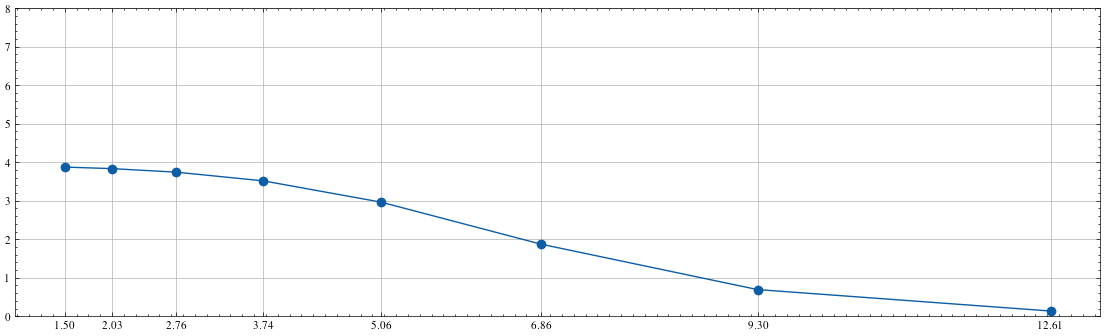

In [475]:
p = np.around(np.random.uniform(0.05, 0.5, 50), 2)
p[0] = 1.

beta_values = 1.5**(np.arange(1, 7, 0.75))
out = [utils.calc_entropy(softmax(p, yi)) for yi in beta_values]
plt.figure(figsize=(14, 4))
plt.plot(beta_values, out, '-o')
plt.grid()
plt.ylim((0, 8))
plt.xticks(beta_values);

In [13]:
model_params = utils.load_model(idx=6) # 1

In [49]:
""" settings """
settings1 = Settings()
settings1.rounds = 200
settings1.trials = 2
settings1.reps = 1
settings1.verbose = False
settings1.idx = 6
settings1.load = True
settings1.env = "v0"
settings1.K = 10
NUM_BETAS = 5

""" parameters """
#beta_values = 1.5**(np.arange(7, 1, -0.75))
beta_values = 1.5**np.linspace(7, 1, NUM_BETAS)
probability = np.around(np.random.uniform(0.05, 0.5, settings1.K), 2)
probability[0] = 0.9 

""" main loop """
prob_entropy = []
model_entropy = []
model_reward = []
model_entropy_std = []
model_reward_std = []
upper_list = []

for beta in tqdm(beta_values):

    #logger(f"running {beta=:.4f}")

    # define proababilities 
    p = softmax(probability, beta)
    probabilities_set = np.array([p.tolist()])
    prob_entropy += [utils.calc_entropy(p)]

    """ run """
    results = run_(settings1, probabilities_set, model_params)
    model_reward += [results["scores"]]
    model_reward_std += [results["score_list"].mean(axis=2).std(axis=1)] 
    upper_list += [results["upper_bound_list"]]
    for i in range(settings1.trials):
        model_entropy += [results["entropy_list"][:, :, i, :].mean(axis=2).mean(axis=1)]
        model_entropy_std += [results["entropy_list"][:, :, i, :].mean(axis=2).std(axis=1)]

model_reward = np.array(model_reward)
model_entropy = np.array(model_entropy)
model_reward_std = np.stack(model_reward_std)
model_entropy_std = np.stack(model_entropy_std)

logger(f"reward: {model_reward.shape}")
logger(f"entropy: {model_entropy.shape}")
tot = len(prob_entropy)

logger("done")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:49<00:00,  9.89s/it]
2024-12-05 22:18:27 | reward: (5, 4)
2024-12-05 22:18:27 | entropy: (10, 4)
2024-12-05 22:18:27 | done


**retrieve data**

In [225]:
""" load data """
data_path = os.getcwd() + "/src/data"
files = os.listdir(data_path)
for i, f in enumerate(files):
    if f[-5:] == '.json':
        print(f"\n[{i}] {f}")
file_idx = int(input("\nfile idx: "))
with open(f"{data_path}/{files[file_idx]}", "r") as f:
    datae = json.load(f)

reps, _, _, _ = np.array(datae['model_reward']).shape
print("reps=", reps)

""" make dataset """
model_reward = np.array(datae["model_reward"]).reshape(reps, -1, 4).mean(axis=0)
model_reward_std = np.array(datae["model_reward"]).reshape(reps, -1, 4).std(axis=0)

model_entropy = np.array(datae["model_entropy"]).reshape(reps, 2, -1, 4).mean(axis=0)#.flatten()
model_entropy_std = np.array(datae["model_entropy"]).reshape(reps, 2, -1, 4).std(axis=0)
prob_entropy = np.array(datae["prob_entropy"]).flatten()
upper_list = np.array(datae["upper_list"]).reshape(reps, -1, 2).mean(axis=0).reshape(-1)

upper_list, model_entropy


[0] entropy_run_20241217-001000.json

[1] entropy_run_20241217-144115.json

[2] entropy_run_20241212-215011.json

[5] entropy_run_20241214-220749.json

[6] entropy_run_20241208-043107.json

[7] entropy_run_20241208-014741.json

[8] entropy_run_20241218-113353.json

[9] entropy_run_20241212-200425.json

[10] entropy_run_20241216-220131.json

[11] entropy_run_20241206-001613.json

[12] entropy_run_20241217-224013.json

[13] entropy_run_20241217-235049.json

[14] entropy_run_20241216-180449.json

[15] entropy_run_20241218-021816.json

[16] entropy_run_20241216-190042.json

[17] entropy_run_20241218-004450.json

[18] entropy_run_20241218-120133.json

[19] entropy_run_20241216-232752.json

[20] entropy_run_20241213-021629.json

[21] entropy_run_20241216-175531.json

[22] entropy_run_20241218-013520.json

[23] entropy_run_20241216-211126.json

[24] entropy_run_20241217-133420.json

[25] entropy_run_20241212-165522.json

[26] entropy_run_20241208-031200.json

[27] entropy_run_20241205-225936


file idx:  18


reps= 5


(array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.75199591, 0.75199591, 0.36473275, 0.36473275]),
 array([[[4.71432860e-01, 3.74266599e-01, 2.88491304e+00, 0.00000000e+00],
         [5.36527685e-04, 3.85947361e-01, 1.97292200e+00, 0.00000000e+00],
         [4.92035042e-01, 3.86444585e-01, 2.88748062e+00, 0.00000000e+00],
         [1.07305537e-03, 3.88454696e-01, 2.00909325e+00, 0.00000000e+00],
         [5.02051075e-01, 3.78014140e-01, 2.90481261e+00, 0.00000000e+00],
         [0.00000000e+00, 3.70562892e-01, 2.15533654e+00, 0.00000000e+00],
         [5.50990302e-01, 4.10461951e-01, 2.90371034e+00, 0.00000000e+00]],
 
        [[0.00000000e+00, 3.92793718e-01, 2.50529754e+00, 0.00000000e+00],
         [6.29457558e-01, 3.88796672e-01, 2.94761107e+00, 0.00000000e+00],
         [0.00000000e+00, 3.84341884e-01, 2.55294333e+00, 0.00000000e+00],
         [2.77892736e+00, 4.68065682e-01, 2.95354133e

In [615]:
model_reward.shape

(14, 4)

In [614]:
prob_entropy.shape

(14,)

IndexError: index 6 is out of bounds for axis 0 with size 6

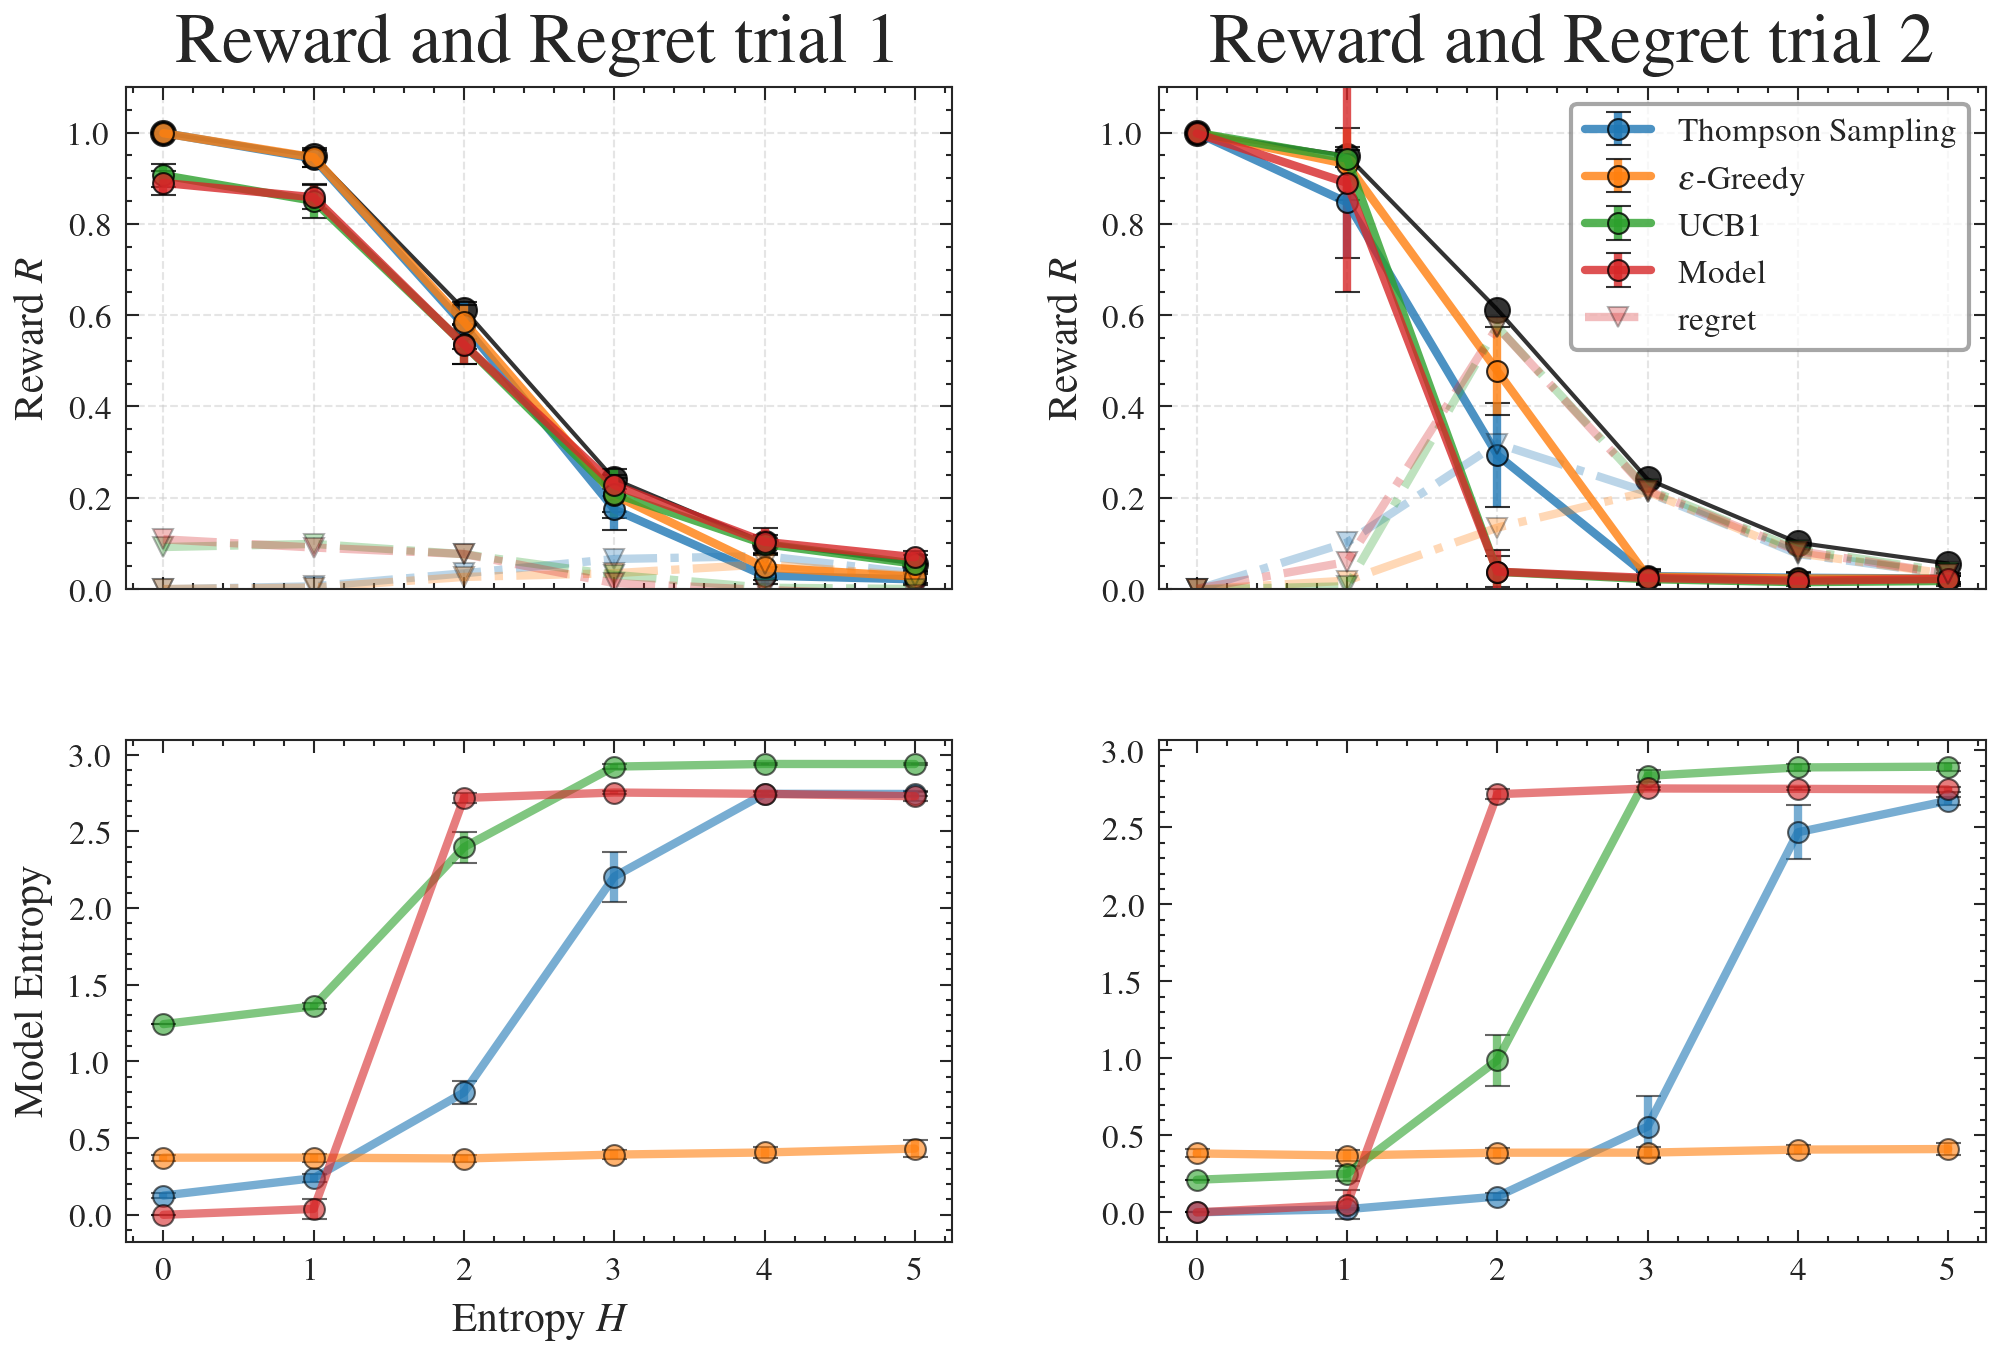

In [185]:
plt.style.use('science')  # Requires matplotlib-style package

names = ['Thompson Sampling', '$\epsilon$-Greedy', 'UCB1', 'Model']


plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times', 'Computer Modern Roman'],
    'text.usetex': True,
    'axes.labelsize': 10,
    'font.size': 10,
    'legend.fontsize': 8,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8
})

tot = len(model_reward)//2
idx1 = np.arange(0, tot*2, 2)
idx2 = np.arange(1, tot*2, 2)

# Create figure with improved layout
fig, (axr, axe) = plt.subplots(2, 2, figsize=(8, 5), 
                               sharex=True, 
                               constrained_layout=False)
axr1, axr2 = axr
axe1, axe2 = axe

# Colorblind-friendly color palette
colors = sns.color_palette("tab10", len(names))

axr1.plot(range(tot), upper_list[idx1], '-o', color="black", alpha=0.8, label="Max")
axr2.plot(range(tot), upper_list[idx2], '-o', color="black", alpha=0.8)


# Reward plot (top subplot)
for i, name in enumerate(names):

    # -- reward trial 1
    axr1.errorbar(range(tot), 
                model_reward[idx1, i],
                yerr=model_reward_std[idx1, i],
                fmt='-o', 
                color=colors[i],
                capsize=3,
                linewidth=2,
                alpha=0.8,
                markersize=5)

    # -- reward trial 2
    axr2.errorbar(range(tot), 
                model_reward[idx2, i],
                yerr=model_reward_std[idx2, i],
                fmt='-o', 
                color=colors[i],
                label=name,
                capsize=3,
                linewidth=2,
                alpha=0.8,
                markersize=5)

    # -- regret trial 2
    # label
    if i == 3:
        axr2.errorbar(range(tot), 
                upper_list[idx2] - model_reward[idx2, i],
                fmt='-.v', 
                color=colors[i],
                capsize=3,
                linewidth=2,
                label="regret",
                alpha=0.3,
                markersize=5)
    else:
        axr2.errorbar(range(tot), 
                upper_list[idx2] - model_reward[idx2, i],
                fmt='-.v', 
                color=colors[i],
                capsize=3,
                linewidth=2,
                alpha=0.3,
                markersize=5)
    
    # -- regret trial 1
    axr1.errorbar(range(tot), 
            upper_list[idx1] - model_reward[idx1, i],
            fmt='-.v', 
            color=colors[i],
            capsize=3,
            linewidth=2,
            alpha=0.3,
            markersize=5)

axr2.legend(loc='best', 
          frameon=True, 
          fancybox=True, 
          framealpha=0.7, 
          edgecolor='gray')
axr1.grid(alpha=0.5, linestyle='--')

axr1.set_title(r'{Reward and Regret trial 1}')
axr1.set_ylabel(r"Reward $R$")
axr1.set_ylim((0, 1.1))

axr2.grid(alpha=0.5, linestyle='--')
axr2.set_title(r'{Reward and Regret trial 2}')
axr2.set_ylabel(r"Reward $R$")
axr2.set_ylim((0, 1.1))


# Entropy plot (bottom subplot)
for i, name in enumerate(names):

    # -- entropy trial 1
    axe1.errorbar(range(tot), 
                 model_entropy[:, :,  i].reshape(-1)[idx1], 
                 yerr=model_entropy_std[:, :, i].reshape(-1)[idx1],
                 fmt='-o', 
                 color=colors[i],
                 capsize=3,
                 linewidth=2,
                 alpha=0.6,
                 markersize=5)

    # -- entropy trial 1
    axe2.errorbar(range(tot), 
                 model_entropy[:, :,  i].reshape(-1)[idx2], 
                 yerr=model_entropy_std[:, :, i].reshape(-1)[idx2],
                 fmt='-o', 
                 color=colors[i],
                 capsize=3,
                 linewidth=2,
                 alpha=0.6,
                 markersize=5)
        

axe1.set_xlabel(r"Entropy $H$")
axe1.set_ylabel(r"Model Entropy")
axe1.set_xticks(range(tot))
axe1.set_xticklabels(np.around(prob_entropy[idx1], 2), rotation=45, ha='right')
axe1.set_title(r'{Model Entropy trial 1}')
axe1.grid(alpha=0.5, linestyle='--')
axe1.set_ylim((0, 3.5))

axe2.set_xlabel(r"Entropy $H$")
axe2.set_ylabel(r"Model Entropy")
axe2.set_xticks(range(tot))
axe2.set_xticklabels(np.around(prob_entropy[idx2], 2), rotation=45, ha='right')
axe2.set_title(r'{Model Entropy trial 2}')
axe2.grid(alpha=0.5, linestyle='--')
axe2.set_ylim((0, 3.5))


# Overall figure title
fig.suptitle(r'\textbf{Performance over levels of distribution entropy}', 
             fontsize=17, y=0.98)

# Save with high DPI for publication
#plt.savefig('media/forfigures/entropy_performance_plot.png', dpi=500, bbox_inches='tight')
plt.show()

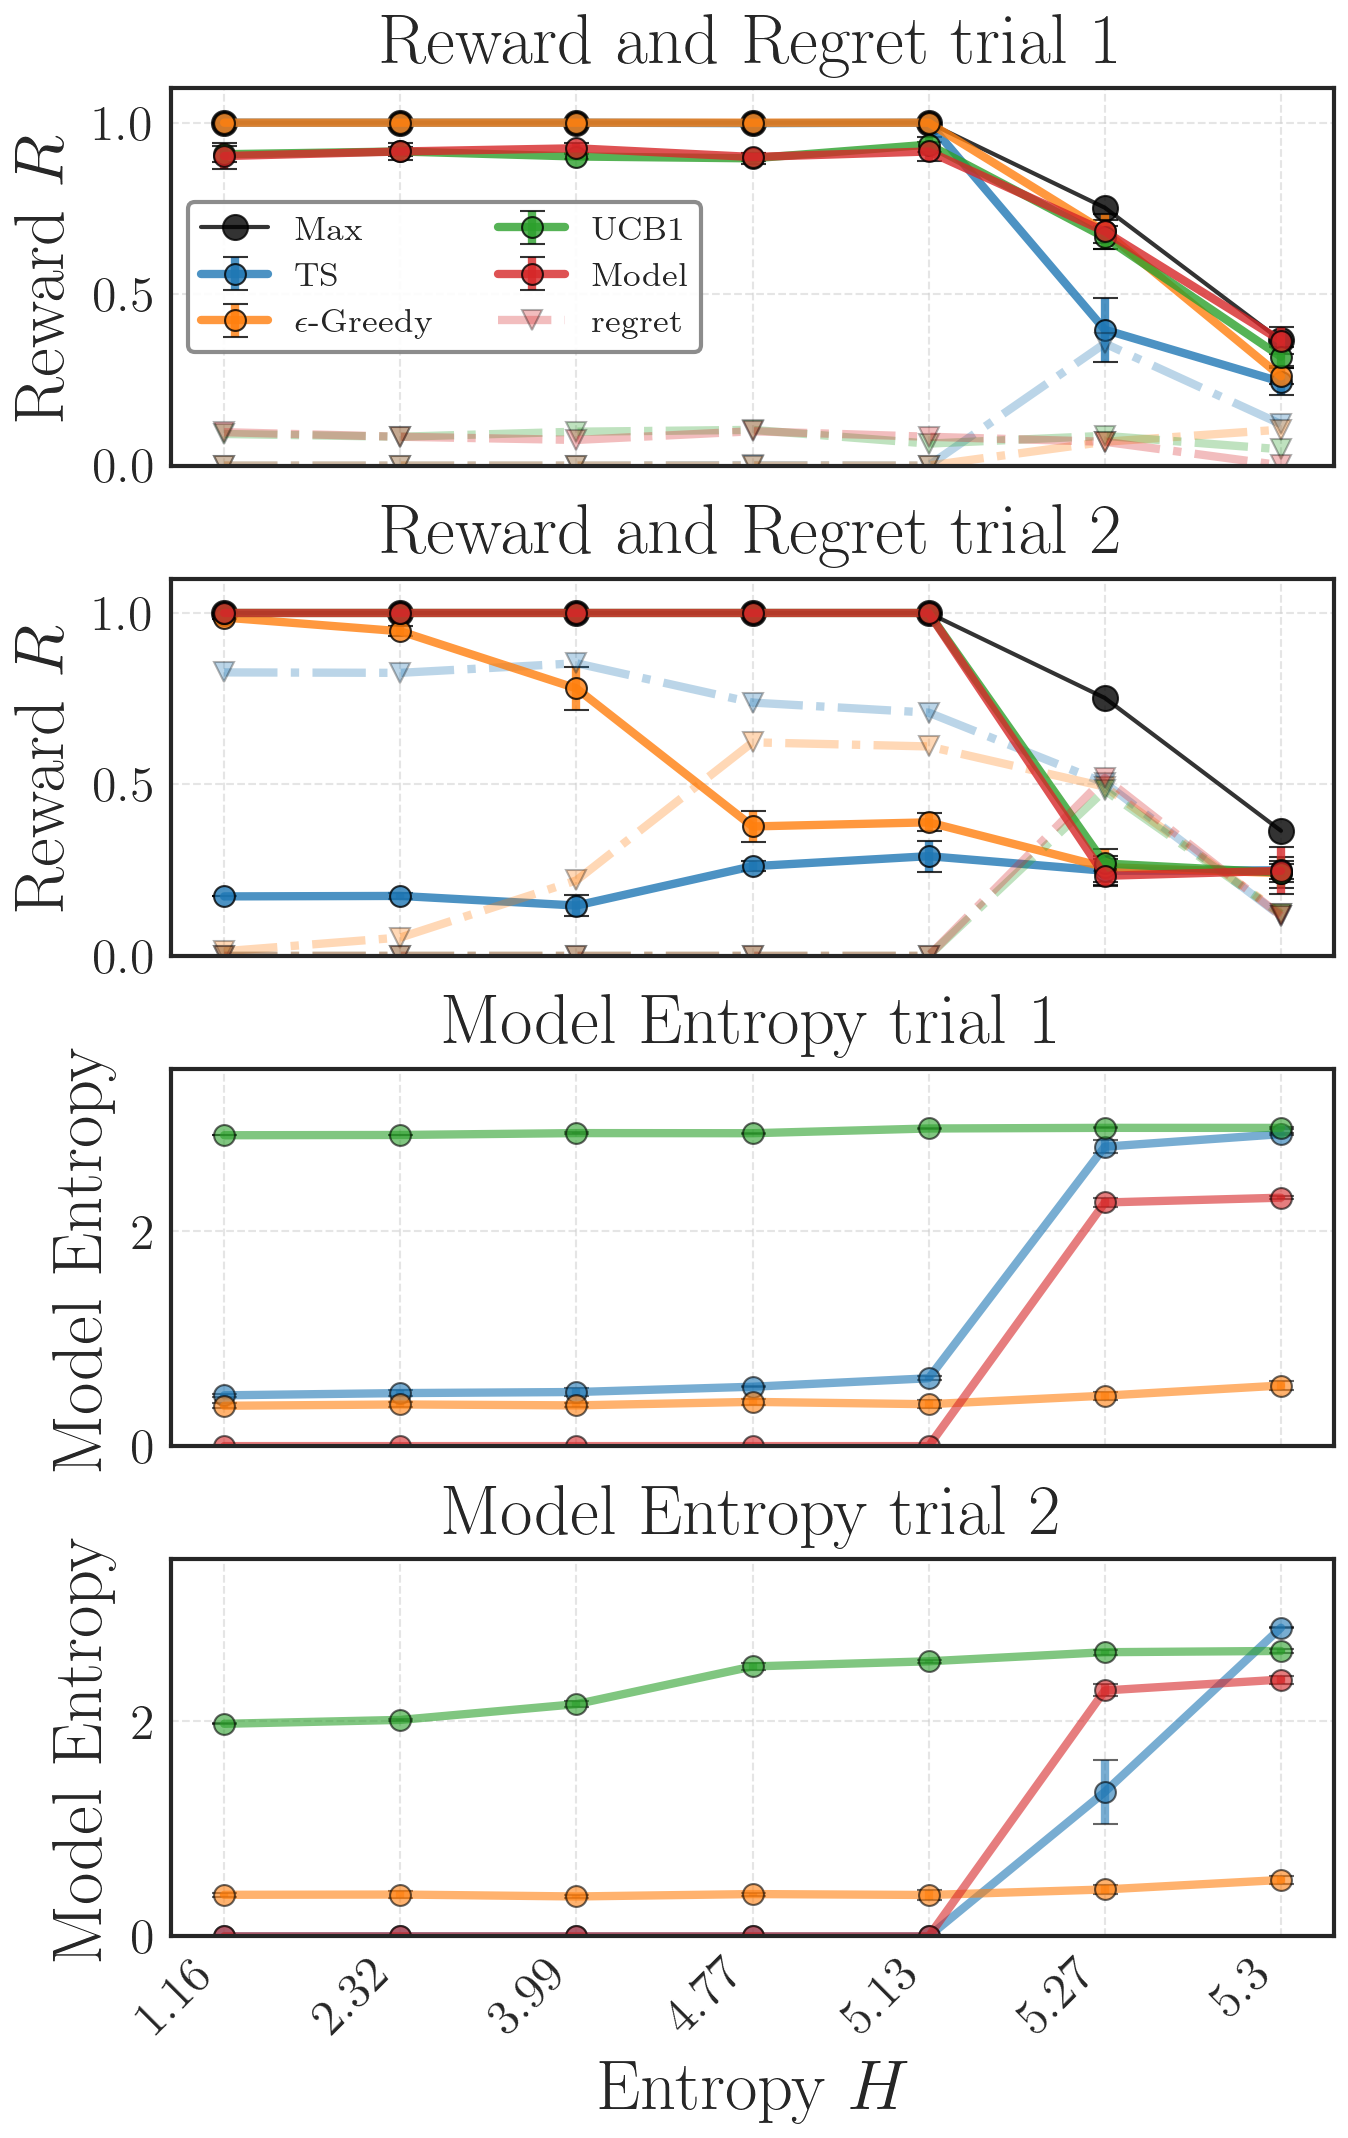

In [236]:
plt.style.use('seaborn-v0_8-white')  # Requires matplotlib-style package

names = ['TS', '$\epsilon$-Greedy', 'UCB1', 'Model']


plt.rcParams.update({
    'figure.figsize': (10, 4),
    'figure.dpi': 300,
    'figure.subplot.wspace': 0.25,
    'figure.subplot.hspace': 0.3,
    
    'text.usetex': True,
    
    'font.size': 13,
    'font.family': 'serif',
    'font.weight': 'normal',
    'font.serif': ['Computer Modern Roman'],
    
    'legend.fontsize': 8,
    'legend.frameon': False,

    'axes.labelsize': 17,
    'axes.titlesize': 17,
    'axes.labelweight': 'normal',
    'axes.spines.top': True,
    'axes.spines.right': True,
    'axes.linewidth': 1., 

    'lines.linewidth': 1.0,
    'lines.markeredgewidth': 0.5,
    'lines.markeredgecolor': 'black',

    'xtick.labelsize': 12,
    'ytick.labelsize': 12,

    'savefig.format': 'pdf'
})

tot = len(model_reward)//2
idx1 = np.arange(0, tot*2, 2)
idx2 = np.arange(1, tot*2, 2)

# Create figure with improved layout
fig, axs = plt.subplots(4, figsize=(5, 8), 
                               sharex=True)
axr1, axr2 = axs[:2]
axe1, axe2 = axs[2:]

# Colorblind-friendly color palette
colors = sns.color_palette("tab10", len(names))

axr1.plot(range(tot), upper_list[idx1], '-o', color="black", alpha=0.8, label="Max")
axr2.plot(range(tot), upper_list[idx2], '-o', color="black", alpha=0.8)


# Reward plot (top subplot)
for i, name in enumerate(names):

    # -- reward trial 1
    axr1.errorbar(range(tot), 
                model_reward[idx1, i],
                yerr=model_reward_std[idx1, i],
                fmt='-o', 
                color=colors[i],
                capsize=3,
                linewidth=2,
                label=name,
                alpha=0.8,
                markersize=5)

    # -- reward trial 2
    axr2.errorbar(range(tot), 
                model_reward[idx2, i],
                yerr=model_reward_std[idx2, i],
                fmt='-o', 
                color=colors[i],
                capsize=3,
                linewidth=2,
                alpha=0.8,
                markersize=5)

    # -- regret trial 2
    # label
    if i == 3:
        axr2.errorbar(range(tot), 
                upper_list[idx2] - model_reward[idx2, i],
                fmt='-.v', 
                color=colors[i],
                capsize=3,
                linewidth=2,
                alpha=0.3,
                markersize=5)
    else:
        axr2.errorbar(range(tot), 
                upper_list[idx2] - model_reward[idx2, i],
                fmt='-.v', 
                color=colors[i],
                capsize=3,
                linewidth=2,
                alpha=0.3,
                markersize=5)
    
    # -- regret trial 1
    if i == 3:
        axr1.errorbar(range(tot), 
            upper_list[idx1] - model_reward[idx1, i],
            fmt='-.v', 
            color=colors[i],
            capsize=3,
            linewidth=2,
            label="regret",
            alpha=0.3,
            markersize=5)
    else:
        axr1.errorbar(range(tot), 
            upper_list[idx1] - model_reward[idx1, i],
            fmt='-.v', 
            color=colors[i],
            capsize=3,
            linewidth=2,
            alpha=0.3,
            markersize=5)

axr1.legend(loc='best', 
          frameon=True, 
          fancybox=True, 
          framealpha=0.9, 
            ncol=2,
          edgecolor='gray')
axr1.grid(alpha=0.5, linestyle='--')

axr1.set_title(r'{Reward and Regret trial 1}')
axr1.set_ylabel(r"Reward $R$")
axr1.set_ylim((0, 1.1))

axr2.grid(alpha=0.5, linestyle='--')
axr2.set_title(r'{Reward and Regret trial 2}')
axr2.set_ylabel(r"Reward $R$")
axr2.set_ylim((0, 1.1))


# Entropy plot (bottom subplot)
for i, name in enumerate(names):

    # -- entropy trial 1
    axe1.errorbar(range(tot), 
                 model_entropy[:, :,  i].reshape(-1)[idx1], 
                 yerr=model_entropy_std[:, :, i].reshape(-1)[idx1],
                 fmt='-o', 
                 color=colors[i],
                 capsize=3,
                 linewidth=2,
                 alpha=0.6,
                 markersize=5)

    # -- entropy trial 1
    axe2.errorbar(range(tot), 
                 model_entropy[:, :,  i].reshape(-1)[idx2], 
                 yerr=model_entropy_std[:, :, i].reshape(-1)[idx2],
                 fmt='-o', 
                 color=colors[i],
                 capsize=3,
                 linewidth=2,
                 alpha=0.6,
                 markersize=5)
        

#axe1.set_xlabel(r"Entropy $H$")
axe1.set_ylabel(r"Model Entropy")
axe1.set_xticks(range(tot))
#axe1.set_xticklabels(np.around(prob_entropy[idx1], 2), rotation=45, ha='right')
axe1.set_title(r'{Model Entropy trial 1}')
axe1.grid(alpha=0.5, linestyle='--')
axe1.set_ylim((0, 3.5))

axe2.set_xlabel(r"Entropy $H$")
axe2.set_ylabel(r"Model Entropy")
#axe2.set_xticks(range(tot))
axe2.set_xticklabels(np.around(prob_entropy[idx2], 2), rotation=45, ha='right')
axe2.set_title(r'{Model Entropy trial 2}')
axe2.grid(alpha=0.5, linestyle='--')
axe2.set_ylim((0, 3.5))


# Overall figure title
#fig.suptitle(r'\textbf{Performance over levels of distribution entropy}', 
#             fontsize=17, y=0.98)

# Save with high DPI for publication
#plt.savefig('media/forfigures/entropy_performance_plot.png', dpi=500, bbox_inches='tight')
#plt.savefig('media/forfigures/entropy_performance_plot.png', dpi=500, bbox_inches='tight')
plt.savefig('media/forfigures/entropy_performance_plot.png', dpi=500, bbox_inches='tight')
plt.show()

In [227]:
prob_entropy

array([1.13405853, 1.16144298, 2.28503076, 2.32114983, 3.98041682,
       3.98774112, 4.78726013, 4.77189635, 5.13775914, 5.13177775,
       5.26938841, 5.26872727, 5.29532959, 5.29527316])

1.3550  1.251 0.006
2.5839  1.773 0.009
4.1447  5.072 0.025
4.8150  25.969 0.130
5.1376  48.791 0.244
5.2687  51.798 0.259
5.2952  51.798 0.259


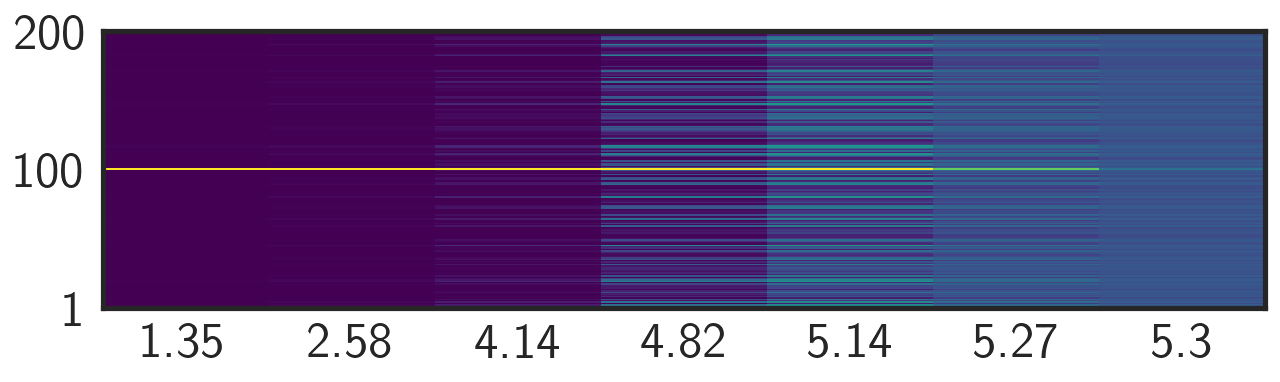

In [237]:
#beta_values = 1.8**(np.linspace(10, 1, 7))
beta_values = [17, 15, 12, 8, 4, 1.5, 0.5]

K = 200
probability = np.clip(np.random.uniform(0., 0.5, K),
                        0, 1)
probability[K//2] = 1
pr = []
entr = []
for i in range(len(beta_values)):

    pr += [(utils.softmax(probability, beta_values[i])*probability.sum()).tolist()]
    pr[-1] = np.clip(pr[-1], 0, 1)
    entr += [np.around(utils.calc_entropy(np.array(pr[-1])), 2)]
    print(f"{utils.calc_entropy(np.array(pr[-1])):.4f}  {sum(pr[-1]):.3f} {np.mean(pr[-1]):.3f}")


plt.style.use('seaborn-v0_8-white')  # Requires matplotlib-style package


fig = plt.figure(figsize=(5, 1.2))
plt.imshow(np.array(pr).T, aspect="auto", cmap="viridis", interpolation="nearest", vmin=0, vmax=1)
plt.yticks((0, 100, 200), (200, 100, 1))
plt.xticks((range(len(beta_values))), entr)
plt.show()

fig.savefig('media/forfigures/entropy_prob_plot.png', dpi=500, bbox_inches='tight')


In [621]:
probability_1, probability_2 = np.random.uniform(0.05, 0.5, (2, settings1.K))
probability_1[0] = 1.
probability_2[0] = 1.

beta_values = 1.5**(np.linspace(7, 1, 7))

prob_entropy = []

for beta in tqdm(beta_values):

    #logger(f"running {beta=:.4f}")

    # define proababilities
    p1 = np.clip(utils.softmax(probability_1, beta) * probability_1.sum(),
                 0., 1.)
    p2 = np.clip(utils.softmax(probability_2, beta) * probability_2.sum(),
                 0., 1.)
    probabilities_set = np.array([p1.tolist(),
                                  p2.tolist()])
    prob_entropy += [[utils.calc_entropy(p1),
                          utils.calc_entropy(p2)]]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 4196.70it/s]


In [622]:
prob_entropy

[[0.33628215807707706, 0.49610486380952884],
 [2.9066060771201063, 3.1925570860931156],
 [4.143629485094693, 4.172659130033338],
 [4.395079848780417, 4.397319566957751],
 [4.497848451097494, 4.4980342232248445],
 [4.544994751887664, 4.546148296941865],
 [4.57602144532239, 4.575709019807445]]

---

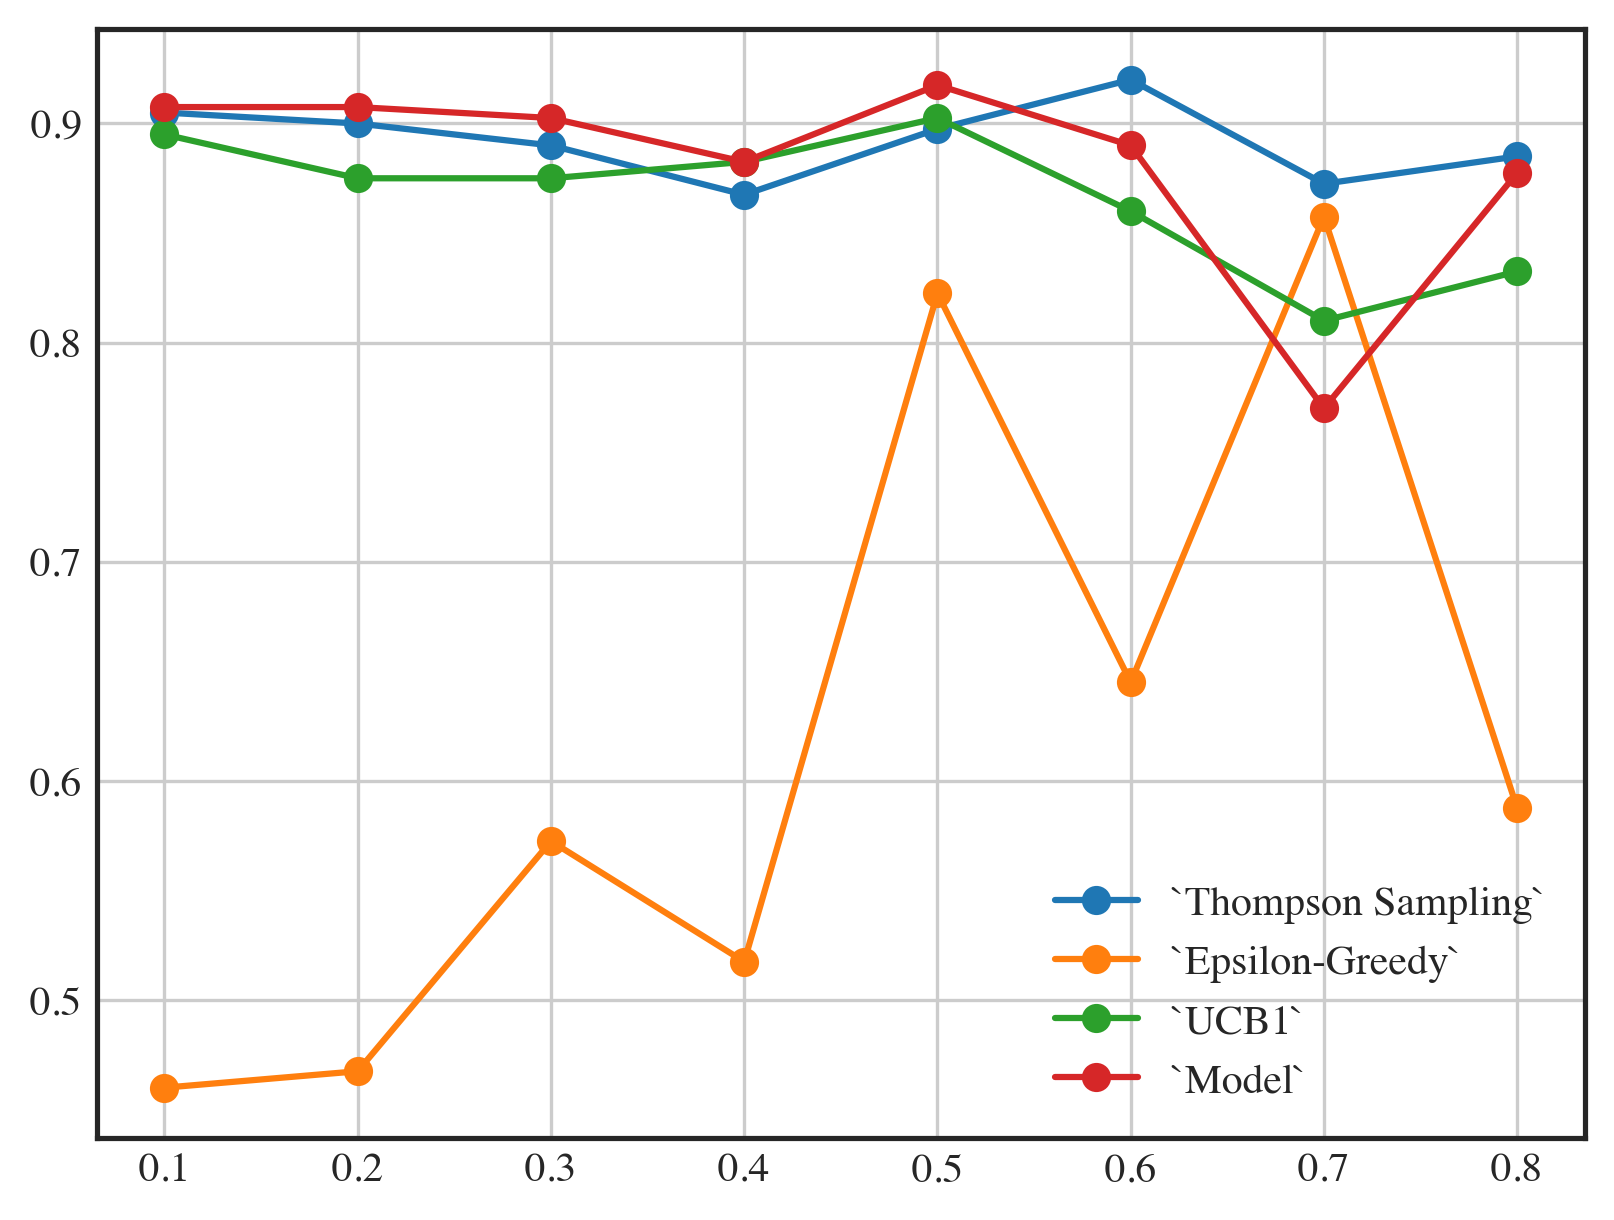

In [32]:
scores = np.zeros((4, len(up_list)))
names = all_results[up_list[0]]["names"]

for i, (k, v) in enumerate(all_results.items()):
    scores[:, i] = v["scores"]

fig, ax = plt.subplots()

for i, s in enumerate(scores):
    ax.plot(up_list, s, '-o', label=names[i])

ax.legend()
ax.grid()
plt.show()

#### Evolution plot

In [23]:
evo_path = f"{os.getcwd()}/src/_evo_cache"
#evo_path = f"../pigeon/data"
with open(f"{evo_path}/38_best.json", 'r') as f:
    evo_data = json.load(f)
    
cutoff = 99
e_mean = np.array(evo_data['info']['fitness_record']['mean'])[:cutoff] * 5 / 6
e_max = np.array(evo_data['info']['fitness_record']['max'])[:cutoff] * 5 / 6
e_p16 = np.array(evo_data['info']['fitness_record']['p16'])[:cutoff] * 5 / 6
e_p84 = np.array(evo_data['info']['fitness_record']['p84'])[:cutoff] * 5 / 6

logger(f"performance: {evo_data['info']['performance']}")
model_params = evo_data['genome']
#model_params = {k: mean_genome[i] for i, k in enumerate(model_params)}
evo_data['info'].keys(), model_params

2025-01-30 12:16:47 | performance: {'gen': '99', 'fitness': '[1.1105]'}


(dict_keys(['date', 'model', 'game', 'evolved', 'data', 'other', 'performance', 'fitness_record', 'record_genome']),
 {'tau_u': 179,
  'tau_v': 238,
  'gain_v': 45.8,
  'offset_v': 0.2,
  'threshold_v': 0.49,
  'gain_u': 37.7,
  'offset_u': 0.5,
  'threshold_u': -0.42,
  'alpha': 3.1,
  'beta': 6.0,
  'mu': -2.0,
  'sigma': 7.3,
  'r': 0.91,
  'alpha_lr': -0.3,
  'beta_lr': 4.3,
  'mu_lr': -1.1,
  'sigma_lr': 8.8,
  'r_lr': 0.1,
  'w_max': 4.5,
  'dur_pre': 2888,
  'dur_post': 2687,
  'Iext_intensity': 0.9})

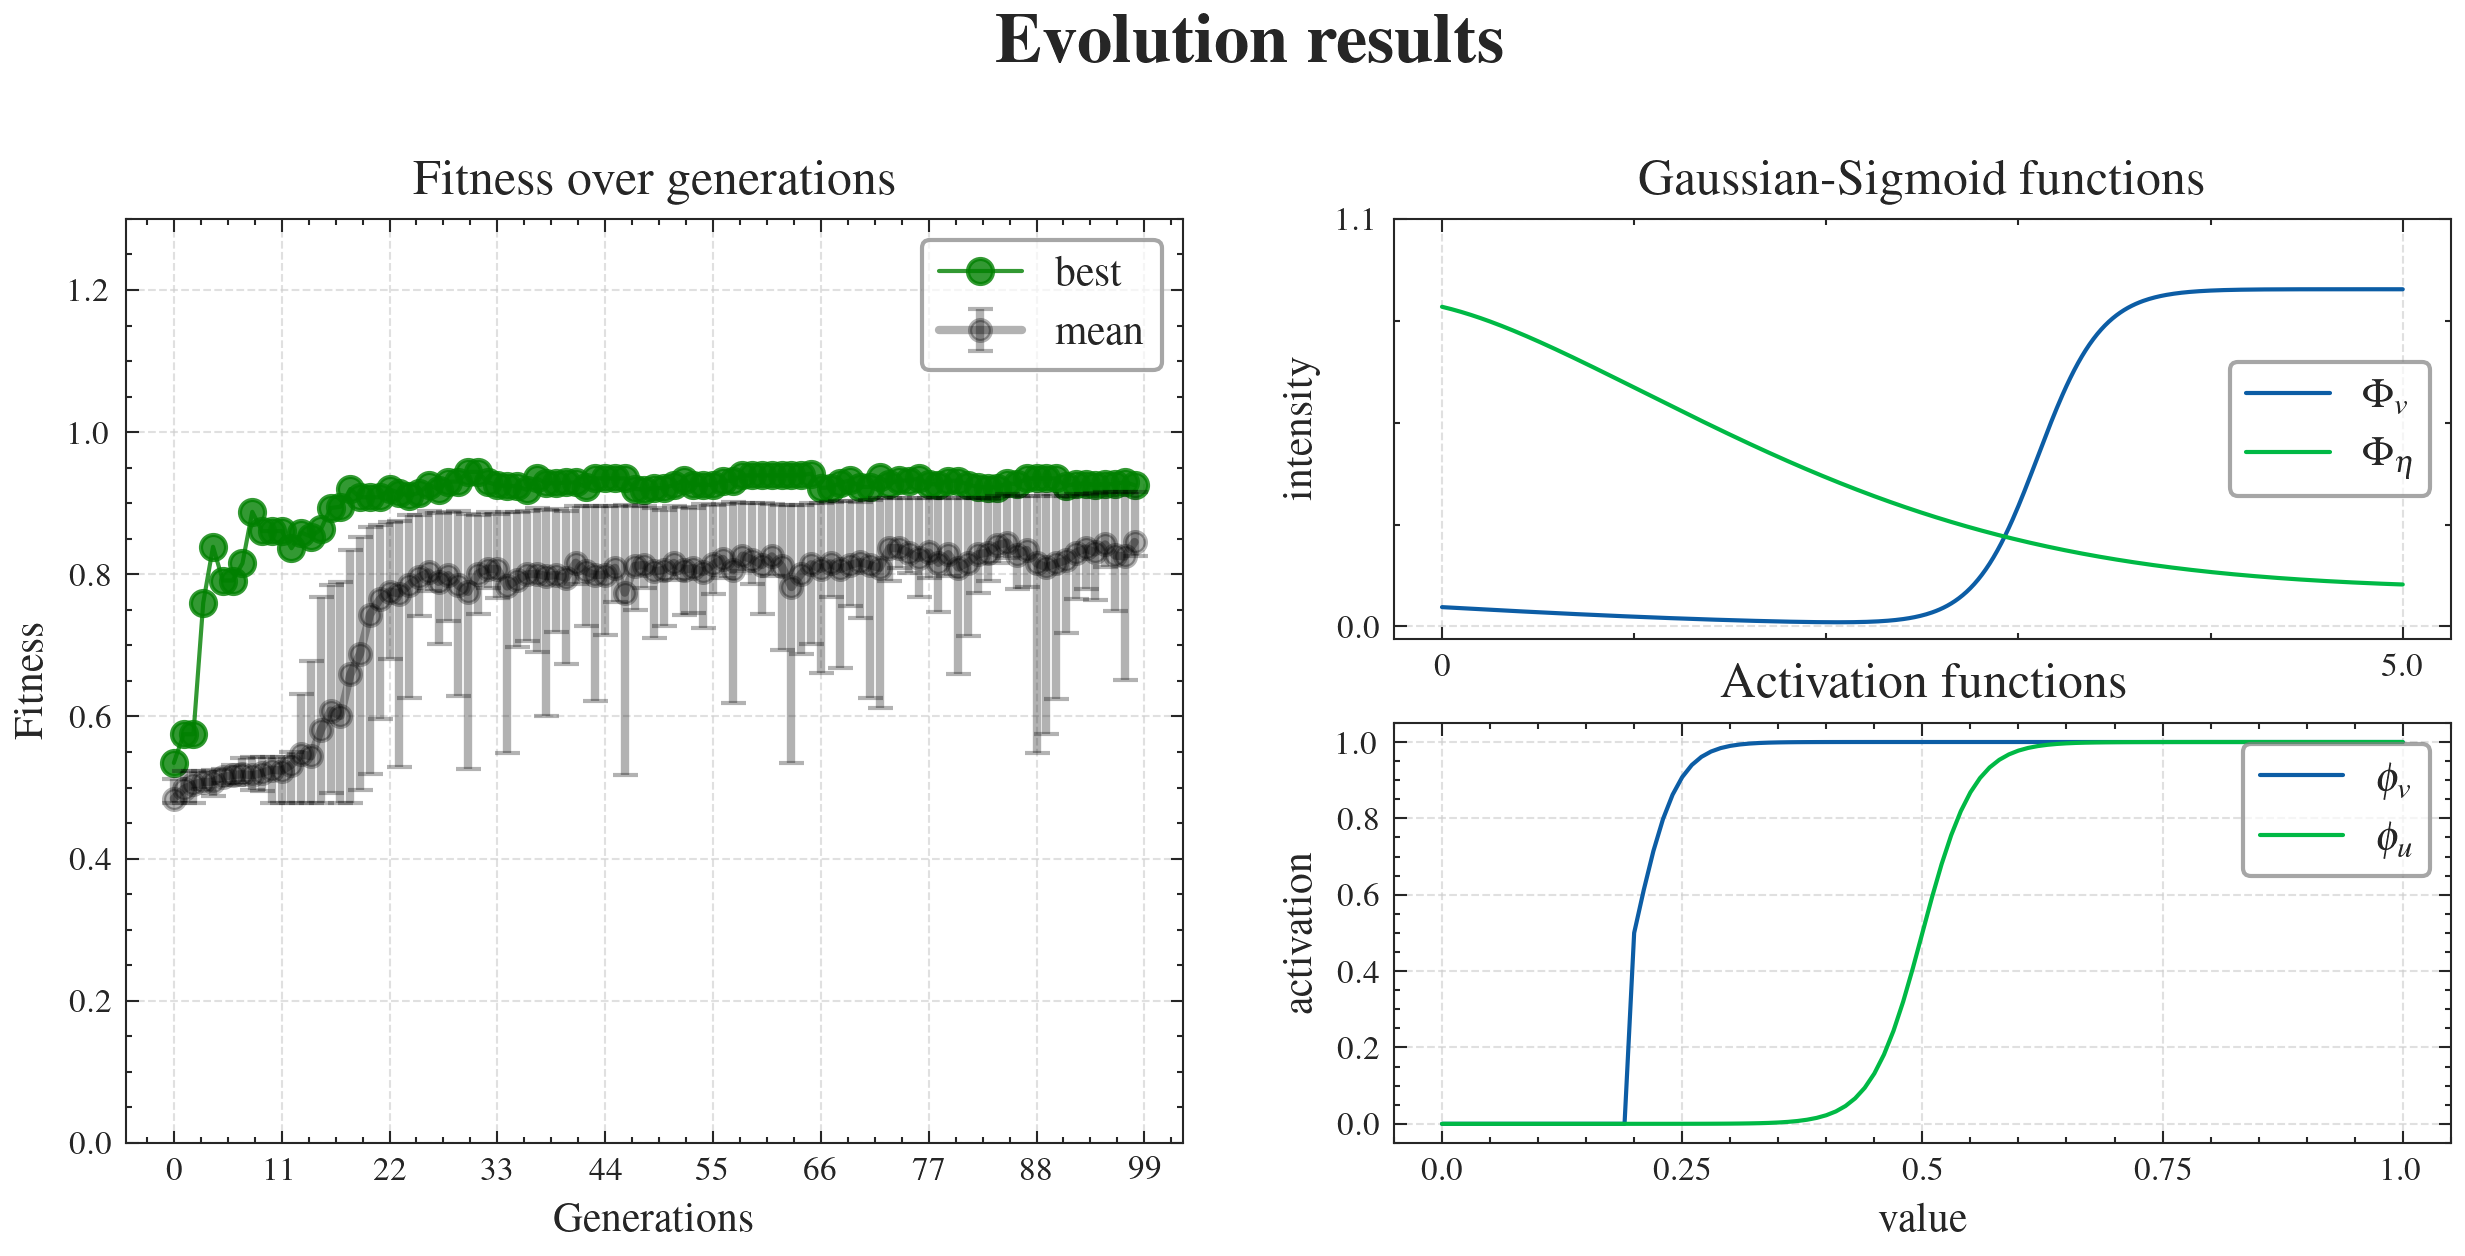

In [73]:
plt.style.use('science')  # Requires matplotlib-style package
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times', 'Computer Modern Roman'],
    'text.usetex': True,
    'axes.labelsize': 10,
    'font.size': 10,
    'legend.fontsize': 10,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8
})

# Create figure with improved layout
fig = plt.figure(figsize=(10, 4))
fig.tight_layout()
gs = GridSpec(2, 2, figure=fig)

# Single plot in the first column (spans two rows)
ax = fig.add_subplot(gs[:, 0])

# Two plots in the second column
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 1])

# Colorblind-friendly color palette
#colors = sns.color_palette("tab10", len(names))

xr = range(cutoff)

# ==============================================================
# === evolution

ax.plot(xr, e_max, '-o', color="green", alpha=0.8, label="best")

# p16 : array 
# p84 : array 

ax.errorbar(xr, 
            e_mean,
            yerr=[e_mean-e_p16, e_p84 - e_mean],
            fmt='-o', 
            color="black",
            label="mean",
            capsize=3,
            linewidth=2,
            alpha=0.3,
            markersize=5)

ax.legend(loc='best', 
          frameon=True, 
          fancybox=True, 
          framealpha=0.7, 
          edgecolor='gray')

ax.set_title(r'{Fitness over generations}')
ax.set_ylabel(r"Reward $R$")
ax.set_ylim((0, 1.3))

ax.set_xlabel(r"Generations")
ax.set_ylabel(r"Fitness")
ax.set_xticks(np.linspace(0, len(e_max), 10).astype(int))
ax.set_xticklabels(np.linspace(0, len(e_max), 10).astype(int))
ax.grid(alpha=0.6, linestyle='--')

# ==============================================================
# === function

x = np.arange(0, 5+0.01, 0.01)
y = utils.gaussian_sigmoid(x, 
                     alpha=model_params["alpha"],
                     beta=model_params["beta"],
                     mu=model_params["mu"],
                     sigma=model_params["sigma"],
                     r=model_params["r"])

y2 = utils.gaussian_sigmoid(x, 
                     alpha=model_params["alpha_lr"],
                     beta=model_params["beta_lr"],
                     mu=model_params["mu_lr"],
                     sigma=model_params["sigma_lr"],
                     r=model_params["r_lr"])
ax1.plot(x, y, label="$\\Phi_v$")
ax1.plot(x, y2, label="$\\Phi_{{\\eta}}$")

#ax1.set_xlabel(r"weight value", fontsize=15, x=0.8)
ax1.set_ylabel(r"intensity")
ax1.set_yticks((0, 1.1))

ax1.set_xticks((0, x.max()))
ax1.set_xticklabels((0, x.max()))
ax1.grid(alpha=0.6, linestyle='--')
ax1.legend(loc='best', 
          frameon=True, 
          fancybox=True, 
          framealpha=0.7, 
          edgecolor='gray')
ax1.set_title(r'{Gaussian-Sigmoid functions}')

# ==============================================================
# === activation functions

x1 = np.arange(0, 1+0.01, 0.01)
#y3 = utils.generalized_sigmoid(x1, 
#                     threshold=model_params["threshold"],
#                     gain=model_params["gain"])
yv = utils.neural_response_func(x=x1,
                     gain=model_params["gain_v"],
                     offset=model_params["offset_v"],
                     threshold=model_params["threshold_v"])
yu = utils.neural_response_func(x=x1,
                     gain=model_params["gain_u"],
                     offset=model_params["offset_u"],
                     threshold=model_params["threshold_u"])

ax2.plot(x1, yv, label="$\\phi_{v}$")
ax2.plot(x1, yu, label="$\\phi_{u}$")


ax2.set_xlabel(r"value")
ax2.set_ylabel(r"activation")
ax2.set_xticks(np.arange(0, x1.max()+0.01, 0.25))
ax2.set_xticklabels(np.arange(0, x1.max()+0.01, 0.25))
ax2.grid(alpha=0.6, linestyle='--')
ax2.legend(loc='best', 
          frameon=True, 
          fancybox=True, 
          framealpha=0.7,
          edgecolor='gray')
ax2.set_title(r'{Activation functions}')

# ==============================================================
# === Overall figure title

fig.suptitle(r'\textbf{Evolution results}', 
             fontsize=17, y=1.05)

# Save with high DPI for publication
#plt.savefig('paper/figures/evolution_plot.png', dpi=500, bbox_inches='tight')
plt.show()

#### function tuning

In [41]:
gen = evo_data['info']['record_genome']

In [42]:
for i, ind in gen.items():
    print(f"{i}: {ind['fitness']:.3f}")

0: 0.944
1: 0.933
2: 0.930
3: 0.927
4: 0.920
5: 0.917
6: 0.905
7: 0.904
8: 0.903
9: 0.903
10: 0.885
11: 0.881
12: 0.880
13: 0.880
14: 0.879
15: 0.878
16: 0.878
17: 0.875
18: 0.871
19: 0.870
20: 0.870
21: 0.866
22: 0.861
23: 0.854
24: 0.850
25: 0.849
26: 0.842
27: 0.841
28: 0.839
29: 0.837
30: 0.833
31: 0.828
32: 0.828
33: 0.828
34: 0.828
35: 0.828
36: 0.827
37: 0.827
38: 0.827
39: 0.827
40: 0.826
41: 0.826
42: 0.826
43: 0.826
44: 0.826
45: 0.826
46: 0.826
47: 0.826
48: 0.826
49: 0.826
50: 0.825
51: 0.820
52: 0.818
53: 0.818
54: 0.803
55: 0.803
56: 0.802
57: 0.802
58: 0.801
59: 0.800
60: 0.800
61: 0.800
62: 0.795
63: 0.788
64: 0.788
65: 0.787
66: 0.787
67: 0.784
68: 0.777
69: 0.765
70: 0.747
71: 0.713
72: 0.702
73: 0.701
74: 0.700
75: 0.692
76: 0.666
77: 0.665
78: 0.658
79: 0.656
80: 0.655
81: 0.646
82: 0.643
83: 0.640
84: 0.640
85: 0.633
86: 0.627
87: 0.622
88: 0.617
89: 0.608
90: 0.601
91: 0.599
92: 0.599
93: 0.590
94: 0.580
95: 0.565
96: 0.565
97: 0.561
98: 0.558
99: 0.557
100: 0.550

In [44]:
model_params = gen['1']['genome']

In [7]:
model_params = utils.load_model(idx=16)
model_params

{'tau_u': 63,
 'tau_v': 287,
 'gain_v': 22.5,
 'offset_v': 0.2,
 'threshold_v': 0.19,
 'gain_u': 20.9,
 'offset_u': 0.2,
 'threshold_u': 0.85,
 'alpha': 1.4,
 'beta': 9.5,
 'mu': -3.9,
 'sigma': 5.5,
 'r': 0.74,
 'alpha_lr': -4.7,
 'beta_lr': 8.0,
 'mu_lr': 1.2,
 'sigma_lr': 2.6,
 'r_lr': 0.13,
 'w_max': 4.2,
 'dur_pre': 2095,
 'dur_post': 1987}

In [10]:
nb_rounds = 2000
nb_trials = 1
nb_reps = 2
K = 1000

probabilities_set = utils.make_probability_set(K=K,
                                               nb_trials=nb_trials,
                                               fixed_p=0.9,
                                               normalize=False)

env = envs.KABv0(K=K,
                 probabilities_set=probabilities_set,
                 verbose=False)

""" run """
model_params['K'] = K
model_params['weights_history'] = True
model = mm.Model(**model_params)
results = envs.trial_multiple_models(
                         models=[model],
                         environment=env,
                         nb_trials=nb_trials,
                         nb_rounds=nb_rounds,
                         nb_reps=nb_reps,
                         entropy_calc=True,
                         verbose=True)
logger(f"scores: {results['score_list']}")

2024-12-11 23:15:22 | Invalid parameters for Model, using Modelv2 instead
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [06:24<00:00, 192.29s/it]
2024-12-11 23:21:46 | scores: [[[0.915]
  [0.89 ]]]


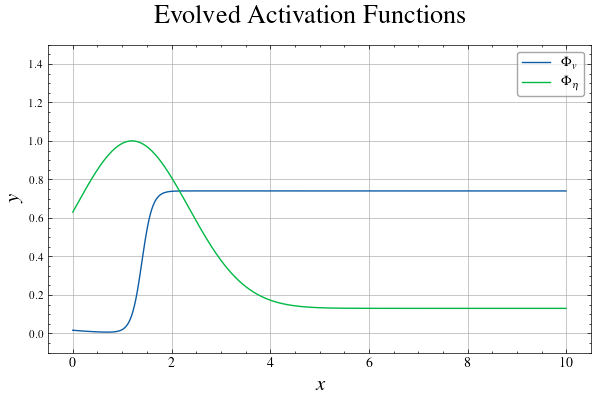

In [28]:
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times', 'Computer Modern Roman'],
    'text.usetex': True,
    'axes.labelsize': 10,
    'font.size': 10,
    'legend.fontsize': 10,
    'xtick.labelsize': 10,
})
    
x = np.arange(0, 10, 0.01)
y = utils.gaussian_sigmoid(x, 
                     alpha=model_params["alpha"],
                     beta=model_params["beta"],
                     mu=model_params["mu"],
                     sigma=model_params["sigma"],
                     r=model_params["r"])

y2 = utils.gaussian_sigmoid(x, 
                     alpha=model_params["alpha_lr"],
                     beta=model_params["beta_lr"],
                     mu=model_params["mu_lr"],
                     sigma=model_params["sigma_lr"],
                     r=model_params["r_lr"])

fig, ax = plt.subplots(figsize=(7, 4))
fig.suptitle("Evolved Activation Functions",
             fontsize=19)
ax.plot(x, y, label="$\\Phi_v$")
ax.plot(x, y2, label="$\\Phi_{{\\eta}}$")

ax.set_xlabel("$x$", fontsize=15)
ax.set_ylabel("$y$", fontsize=15)
ax.set_ylim((-0.1, 1.5))
ax.grid()
ax.legend(loc='best', 
          frameon=True, 
          fancybox=True, 
          framealpha=0.7, 
          edgecolor='gray')
#fig.savefig("paper/figures/function_evo.png",
#                 dpi=500, bbox_inches="tight")
plt.show()


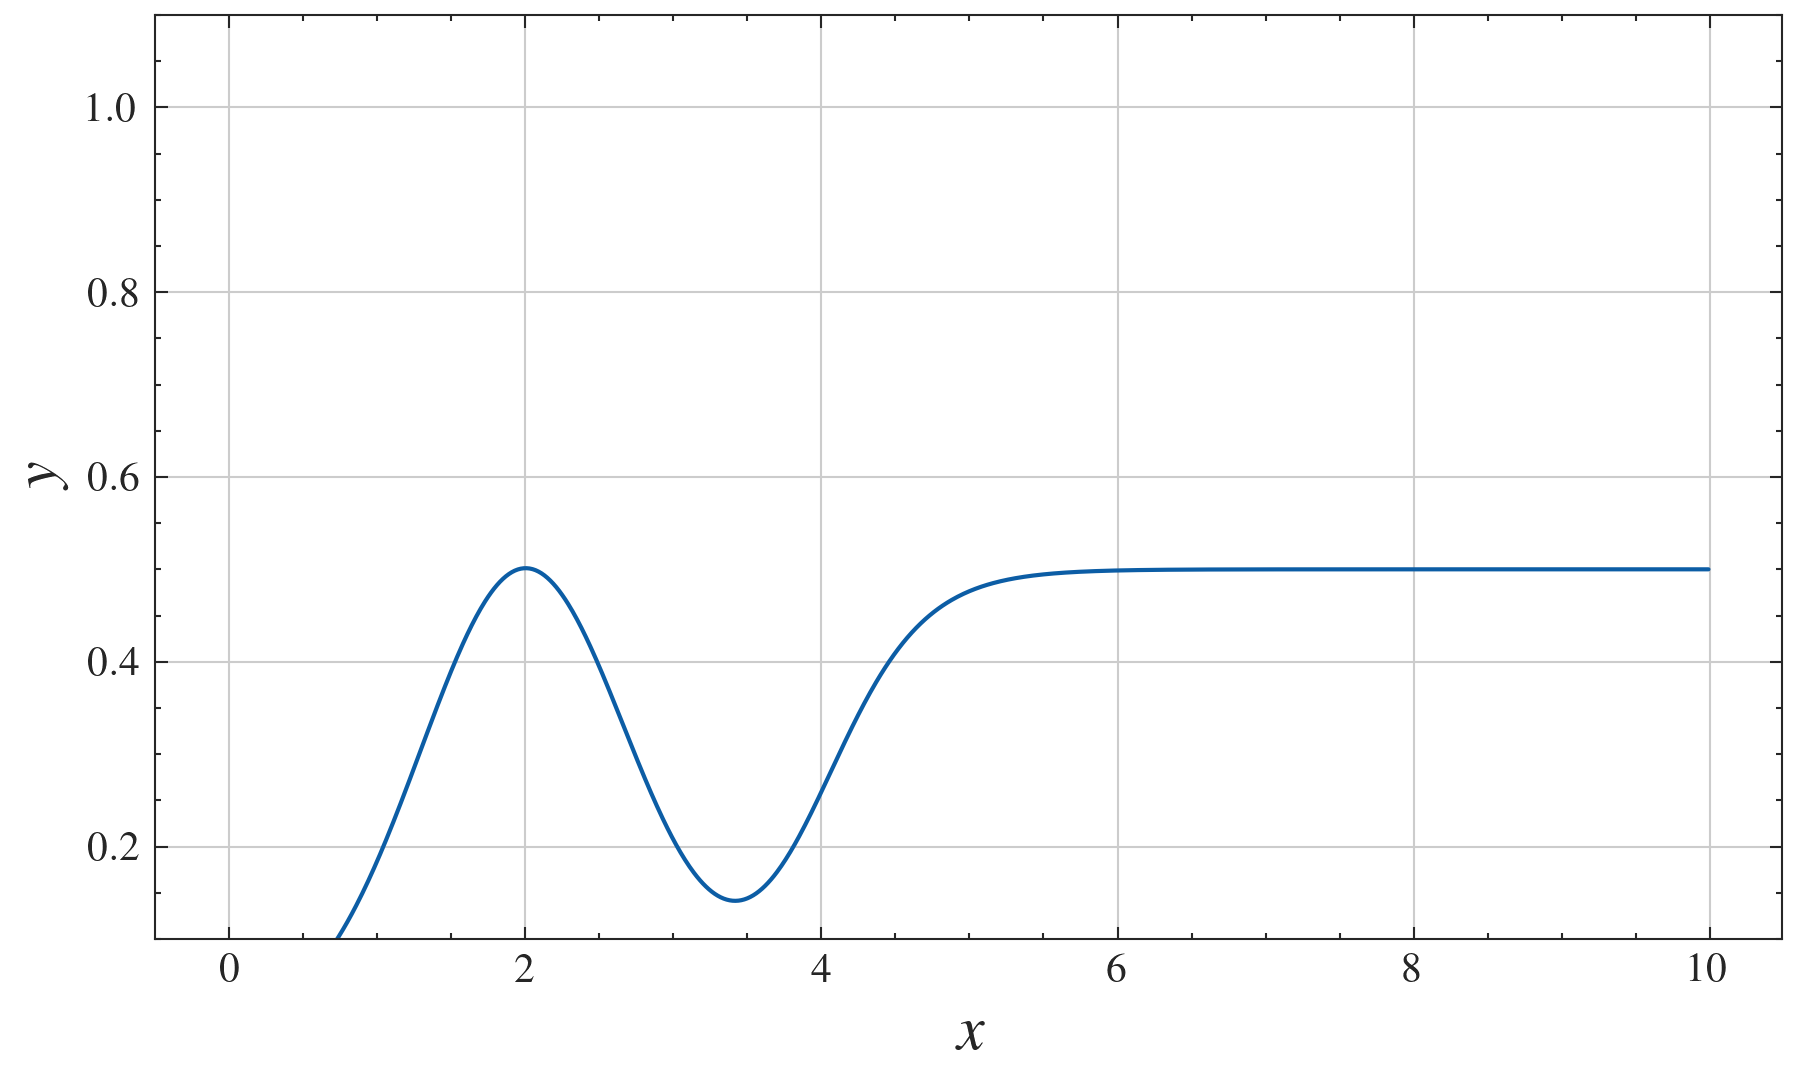

In [582]:
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times', 'Computer Modern Roman'],
    'text.usetex': True,
    'axes.labelsize': 10,
    'font.size': 10,
    'legend.fontsize': 8,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})

x = np.arange(0, 10, 0.01)
y = utils.gaussian_sigmoid(x, 
                     alpha=4,
                     beta=3,
                     mu=2,
                     sigma=1,
                     r=0.5)


fig, ax = plt.subplots(figsize=(7, 4))
#fig.suptitle("Gaussian Sigmoid function",
#             fontsize=19)
ax.plot(x, y)

ax.set_xlabel("$x$", fontsize=15)
ax.set_ylabel("$y$", fontsize=15)
ax.set_ylim((0.1, 1.1))
ax.grid()
#ax.legend()
plt.show()
fig.savefig("paper/figures/gaussian_sigmoid.png",
                 dpi=500, bbox_inches="tight")


In [16]:
os.getcwd()

'/Users/daniekru/Research/lab/minBandit'

In [10]:
model_params

{'tau_u': 63,
 'tau_v': 287,
 'gain_v': 22.5,
 'offset_v': 0.2,
 'threshold_v': 0.19,
 'gain_u': 20.9,
 'offset_u': 0.2,
 'threshold_u': 0.85,
 'alpha': 1.4,
 'beta': 9.5,
 'mu': -3.9,
 'sigma': 5.5,
 'r': 0.74,
 'alpha_lr': -4.7,
 'beta_lr': 8.0,
 'mu_lr': 1.2,
 'sigma_lr': 2.6,
 'r_lr': 0.13,
 'w_max': 4.2,
 'dur_pre': 2095,
 'dur_post': 1987,
 'K': 200}

TypeError: Invalid shape (0,) for image data

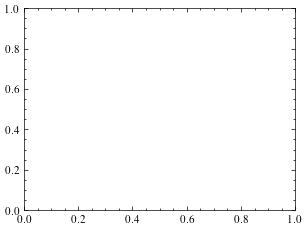

In [70]:
plt.imshow(model.get_weights_record().T, cmap="RdBu_r", aspect="auto")
plt.colorbar()
plt.show()

In [14]:
# ---
model_params['weights_history'] = False

nb_rounds = 1000
nb_trials = 1
nb_reps = 1
K = 10

# ---
N = 20
gain_values = np.linspace(-2, 2, N)

# ---
model_params = utils.load_model(idx=6)
model_params["K"] = K

z = np.zeros(N)
for i, g in tqdm(zip(range(N), gain_values)):
    print(f"[{i=}] {g=:.4f}")
    model_params = utils.load_model(idx=6)
    model_params["K"] = K
    model_params["beta_lr"] = g
    #model_params["alpha_lr"] = 
    model_params["r_lr"] = 1.
    model_params["lr"] = 1.
    model = mm.Model(**model_params)
    results = envs.trial_multiple_models(
                             models=[model],
                             environment=env,
                             nb_trials=nb_trials,
                             nb_rounds=nb_rounds,
                             nb_reps=nb_reps,
                             entropy_calc=True,
                             verbose=False)
    z[i] = results["scores"].item()

logger("done")

0it [00:00, ?it/s]

[i=0] g=-2.0000


1it [00:24, 24.06s/it]

[i=1] g=-1.7895


2it [00:47, 23.94s/it]

[i=2] g=-1.5789


3it [01:11, 23.95s/it]

[i=3] g=-1.3684


4it [01:35, 23.89s/it]

[i=4] g=-1.1579


5it [01:59, 24.00s/it]

[i=5] g=-0.9474


6it [02:23, 23.95s/it]

[i=6] g=-0.7368


7it [02:47, 23.97s/it]

[i=7] g=-0.5263


8it [03:11, 23.95s/it]

[i=8] g=-0.3158


9it [03:35, 23.92s/it]

[i=9] g=-0.1053


10it [03:59, 23.98s/it]

[i=10] g=0.1053


11it [04:23, 23.96s/it]

[i=11] g=0.3158


12it [04:47, 23.96s/it]

[i=12] g=0.5263


13it [05:11, 23.99s/it]

[i=13] g=0.7368


14it [05:35, 24.00s/it]

[i=14] g=0.9474


15it [05:59, 24.00s/it]

[i=15] g=1.1579


16it [06:23, 24.01s/it]

[i=16] g=1.3684


17it [06:47, 24.04s/it]

[i=17] g=1.5789


18it [07:12, 24.13s/it]

[i=18] g=1.7895


19it [07:36, 24.15s/it]

[i=19] g=2.0000


20it [08:00, 24.02s/it]
2024-12-06 02:32:11 | done


In [11]:
model_params = utils.load_model(idx=6)
model_params["K"] = K
model_params["beta_lr"] = 1.
model_params["alpha_lr"] = 50
model_params["r_lr"] = 1.
model_params["lr"] = 1.
model = mm.Model(**model_params)
results = envs.trial_multiple_models(
                         models=[model],
                         environment=env,
                         nb_trials=nb_trials,
                         nb_rounds=nb_rounds,
                         nb_reps=nb_reps,
                         entropy_calc=True,
                         verbose=False)
results["scores"]

array([0.19])

In [9]:
model._lr_function()

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

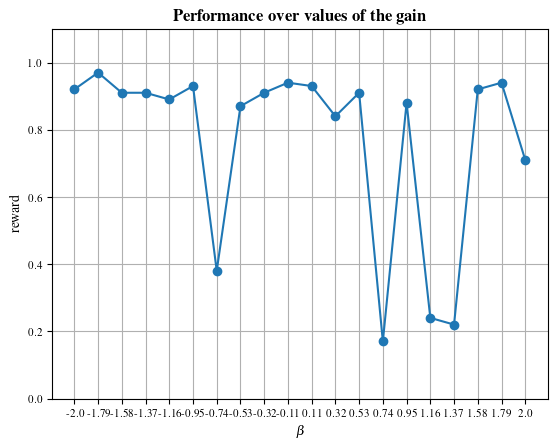

In [15]:
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times', 'Computer Modern Roman'],
    'text.usetex': True,
    'axes.labelsize': 10,
    'font.size': 10,
    'legend.fontsize': 8,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8
})
plt.plot(gain_values, z, '-o')
plt.xticks(gain_values, np.around(gain_values, 2))
plt.xlabel(r"$\beta$")
plt.ylabel("reward")
plt.ylim((0, 1.1))
plt.grid()
plt.title(r"\textbf{Performance over values of the gain}")
plt.show()

In [643]:
p = utils.make_probability_set(K=10,
                           nb_trials=1,
                           fixed_p=0.9,
                           normalize=False)
utils.calc_entropy(p)

2.052248035680213

---

In [645]:

def make_env(K: int,
             env_type: str,
             probabilities_set: list=None,
             tau: int=None,
             normalize=True):

    if env_type == "driftv0":
        env = envs.KABdriftv0(K=K,
                              probabilities_set=probabilities_set,
                              verbose=False,
                              tau=tau)
    elif env_type == "driftv1":
        env = envs.KABdriftv1(K=K,
                              verbose=False,
                              tau=tau,
                              normalize=normalize,
                              fixed_p=0.9)
    elif env_type == "sinv0":
        frequencies = np.linspace(0.1, 0.4, K)
        phases = np.random.uniform(0, 2*np.pi, K)
        env = envs.KABsinv0(K=K,
                            frequencies=frequencies,
                            phases=phases,
                            normalize=normalize,
                            verbose=False)
    elif env_type == "sinv1":
        frequencies = np.linspace(0.1, 0.4, K)
        phases = np.random.uniform(0, 2*np.pi, K)
        constants = np.random.uniform(0.1, 0.7, int(K/2))
        env = envs.KABsinv0(K=K,
                            frequencies=frequencies,
                            phases=phases,
                            normalize=normalize,
                            constants=constants,
                            verbose=False)
    else:
        env = envs.KABv0(K=K,
                         probabilities_set=probabilities_set,
                         verbose=False)

    return env

In [650]:
K = 10
frequencies = np.linspace(0.1, 0.4, K)
phases = np.random.uniform(0, 2*np.pi, K)
constants = np.random.uniform(0.1, 0.7, int(K/2))
env = envs.KABsinv0(K=K,
                    frequencies=frequencies,
                    phases=phases,
                    normalize=True,
                    constants=constants,
                    verbose=False)

In [651]:
utils.calc_entropy(env.probabilities)

2.0083564163542884

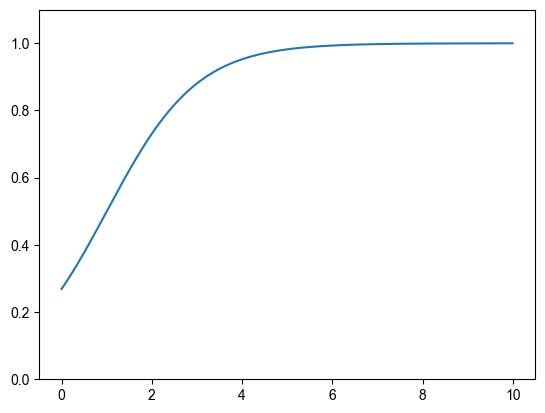

In [9]:
x = np.arange(0, 10, 0.01)
y = utils.neural_response_func(x, 1, 1, 0.)
plt.plot(x, y)
plt.ylim(0, 1.1)
plt.show()

In [10]:
model_params.keys()

dict_keys(['tau_u', 'tau_v', 'gain_v', 'offset_v', 'threshold_v', 'gain_u', 'offset_u', 'threshold_u', 'alpha', 'beta', 'mu', 'sigma', 'r', 'alpha_lr', 'beta_lr', 'mu_lr', 'sigma_lr', 'r_lr', 'w_max', 'dur_pre', 'dur_post'])

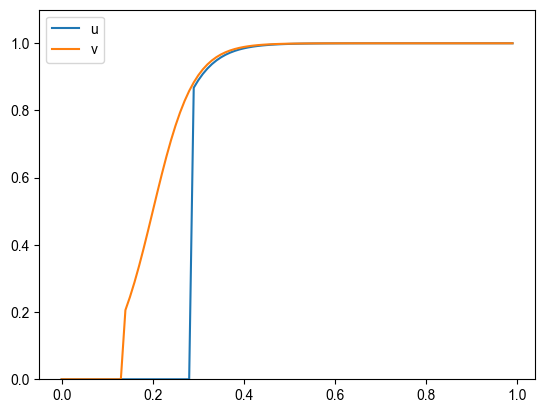

In [11]:
x = np.arange(0, 1, 0.01)

yu = utils.neural_response_func(x=x, offset=model_params['offset_u'], gain=model_params['gain_u'], threshold=model_params['threshold_u'])
yv = utils.neural_response_func(x=x, offset=model_params['offset_v'], gain=model_params['gain_v'], threshold=model_params['threshold_v'])

plt.plot(x, yu, label=r"u")
plt.plot(x, yv, label=r"v")
plt.legend()
plt.ylim(0, 1.1)
plt.show()

#### what's the activation scale?

In [30]:
nb_rounds = 1000
nb_trials = 2
K = 50

probabilities_set = utils.make_probability_set(K=K,
                                               nb_trials=nb_trials,
                                               fixed_p=0.9,
                                               normalize=False)

env = envs.KABv0(K=K,
                 probabilities_set=probabilities_set,
                 verbose=False)

model_params = utils.load_model(idx=17)
model_params['K'] = K
model = mm.Model(**model_params)

for trial_i in range(nb_trials):

        if trial_i > 0:
            env.update()

        score = 0.
        for round_i in tqdm(range(nb_rounds)):

            k = model.select_arm()
            reward = env.sample(k=k)
            model.update(k=k, reward=reward)

            score += reward
            
        score /= nb_rounds
        logger(f"[{trial_i}] {score=:.3f}")

2024-12-13 15:08:13 | Invalid parameters for Model, using Modelv2 instead
 17%|██████████████████████████████████▊                                                                                                                                                                      | 173/1000 [00:04<00:23, 34.80it/s]


KeyboardInterrupt: 

KeyboardInterrupt: 

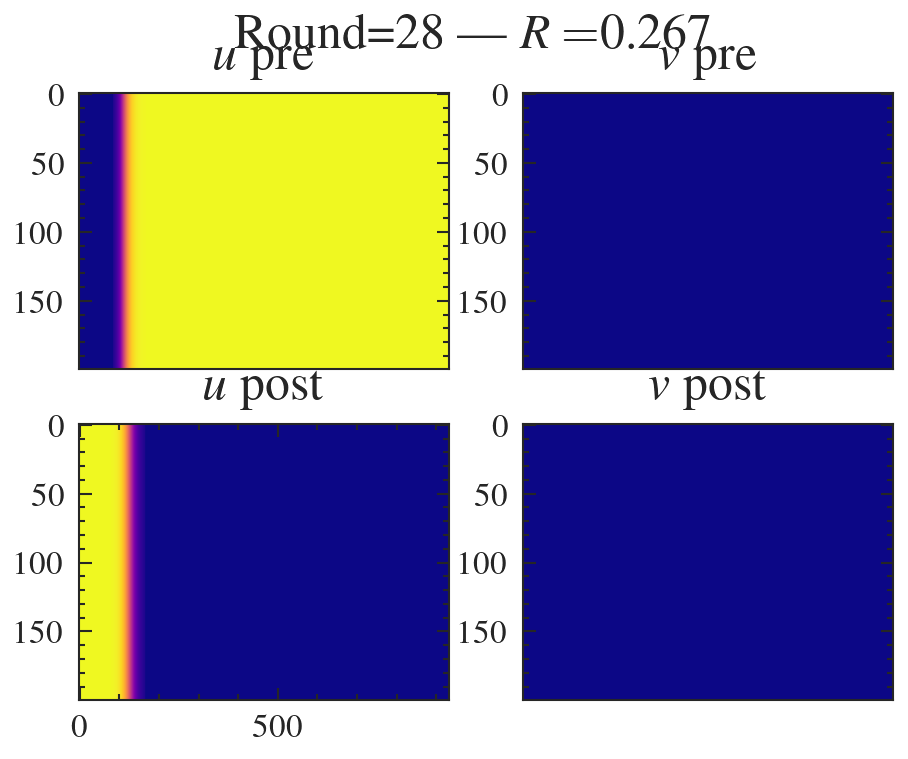

In [23]:
nb_rounds = 1000
nb_trials = 2
K = 200

probabilities_set = utils.make_probability_set(K=K,
                                               nb_trials=nb_trials,
                                               fixed_p=0.9,
                                               normalize=False)

env = envs.KABv0(K=K,
                 probabilities_set=probabilities_set,
                 verbose=False)

model_params = utils.load_model(idx=None)
model_params['K'] = K
model = mm.Model(**model_params)
window = 30
for trial_i in range(nb_trials):

        if trial_i > 0:
            env.reset()

        score = [0]*window
    
        for round_i in range(nb_rounds):

            k, record = model.select_arm(record=True)
            reward = env.sample(k=k)
            model.update(k=k, reward=reward)

            score += [reward]
            if len(score) > window: del score[0]
            
            # plot
            if round_i % 1 == 0:
                clear_output(wait=True)
                fig = plt.figure()
                fig.suptitle(f"Round={round_i} | $R=${sum(score)/window:.3f}")
                
                plt.subplot(221)
                plt.imshow(record['u']['pre'], cmap="plasma", vmin=0, vmax=1, aspect="auto")
                plt.title("$u$ pre")
                plt.xticks(())
                plt.subplot(222)
                plt.imshow(record['v']['pre'], cmap="plasma", vmin=0, vmax=1, aspect="auto")
                plt.title("$v$ pre")
                plt.xticks(())
                
                plt.subplot(223)
                plt.imshow(record['u']['post'], cmap="plasma", vmin=0, vmax=1, aspect="auto")
                plt.title("$u$ post")
                plt.subplot(224)
                plt.xticks(())

                plt.imshow(record['v']['post'], cmap="plasma", vmin=0, vmax=1, aspect="auto")
                plt.title("$v$ post")
                plt.xticks(())
    
                plt.pause(0.001)
            
            
            
        score = sum(score) / nb_rounds
        logger(f"[{trial_i}] {score=}")

2024-12-11 22:26:19 | selection=0


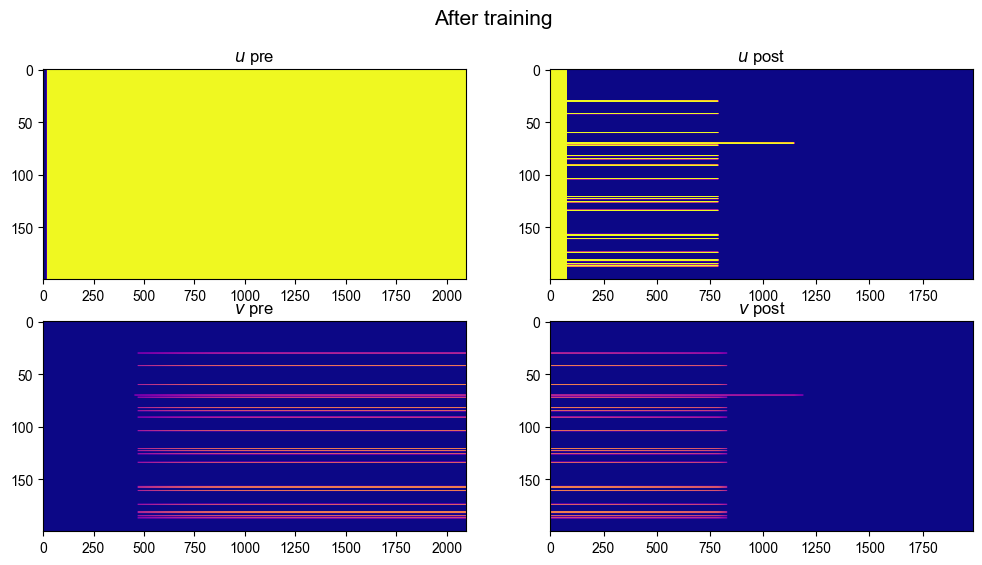

In [8]:
selection, record = model.select_arm(record=True)
pre_u = record['u']['pre']
post_u = record['u']['post']
pre_v = record['v']['pre']
post_v = record['v']['post']

logger(f"{selection=}")

""" plot """
fig, (axu, axv) = plt.subplots(2, 2, figsize=(12, 6))

VMIN = 0
VMAX = 0.5
axu[0].imshow(pre_u, cmap="plasma", vmin=VMIN, vmax=VMAX,  aspect="auto")
axu[0].set_title("$u$ pre")
axv[0].imshow(pre_v, cmap="plasma", vmin=VMIN, vmax=VMAX, aspect="auto")
axv[0].set_title("$v$ pre")

axu[1].imshow(post_u, cmap="plasma", vmin=VMIN, vmax=VMAX, aspect="auto")
axu[1].set_title("$u$ post")
axv[1].imshow(post_v, cmap="plasma", vmin=VMIN, vmax=VMAX, aspect="auto")
axv[1].set_title("$v$ post")
fig.suptitle("After training", fontsize=15)
plt.show()

In [12]:
""" activity before training """
model_params = utils.load_model(idx=16)
model_params['K'] = 20
model = mm.Model(**model_params)

2024-12-11 22:19:21 | Invalid parameters for Model, using Modelv2 instead


2024-12-11 22:19:22 | selection=0


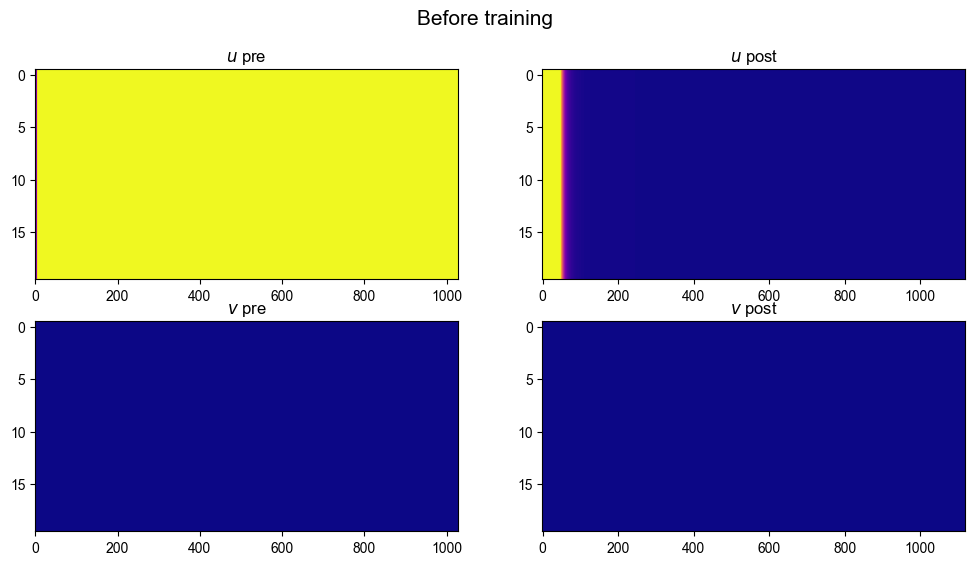

In [13]:
selection, record = model.select_arm(record=True)
pre_u = record['u']['pre']
post_u = record['u']['post']
pre_v = record['v']['pre']
post_v = record['v']['post']

logger(f"{selection=}")

""" plot """
fig, (axu, axv) = plt.subplots(2, 2, figsize=(12, 6))

VMIN = 0
VMAX = 0.5
axu[0].imshow(pre_u, cmap="plasma", vmin=VMIN, vmax=VMAX,  aspect="auto")
axu[0].set_title("$u$ pre")
axv[0].imshow(pre_v, cmap="plasma", vmin=VMIN, vmax=VMAX, aspect="auto")
axv[0].set_title("$v$ pre")

axu[1].imshow(post_u, cmap="plasma", vmin=VMIN, vmax=VMAX, aspect="auto")
axu[1].set_title("$u$ post")
axv[1].imshow(post_v, cmap="plasma", vmin=VMIN, vmax=VMAX, aspect="auto")
axv[1].set_title("$v$ post")
fig.suptitle("Before training", fontsize=15)
plt.show()

---
### Pre-processing

In [36]:
evo_data['info']['record_genome'].keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127'])

In [32]:
variables_names = list(evo_data['info']['record_genome']['3']['genome'].keys())
for v in variables_names:
    print(f"'{v}'", end=", ")
variables_names = ('tau_u', 'tau_v', 'gain_v', 'offset_v', 'threshold_v', 'gain_u', 
                   'offset_u', 'threshold_u', 'alpha', 'beta', 'mu', 'sigma',
                   'r', 'alpha_lr', 'beta_lr', 'mu_lr', 'sigma_lr', 'r_lr', 
                   'w_max', 'dur_pre', 'dur_post', 'Iext_intensity')

variables_names = list(evo_data['info']['record_genome']['3']['genome'].keys())
variables = np.zeros((len(variables_names)+1, len(list(evo_data['info']['record_genome']))))
D, N = variables.shape
logger(f"shape: {D}, {N}")
for q, (k, v) in enumerate(evo_data['info']['record_genome'].items()):
    print(k, end="  ")
    for i, (kg, vg) in enumerate(v['genome'].items()):
        #print(kg, end=",")
        variables[i, q] = vg
    variables[-1, q] = evo_data['info']['record_genome'][k]['fitness']

2025-01-30 12:20:25 | shape: 23, 128


'tau_u', 'tau_v', 'gain_v', 'offset_v', 'threshold_v', 'gain_u', 'offset_u', 'threshold_u', 'alpha', 'beta', 'mu', 'sigma', 'r', 'alpha_lr', 'beta_lr', 'mu_lr', 'sigma_lr', 'r_lr', 'w_max', 'dur_pre', 'dur_post', 'Iext_intensity', 0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99  100  101  102  103  104  105  106  107  108  109  110  111  112  113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  

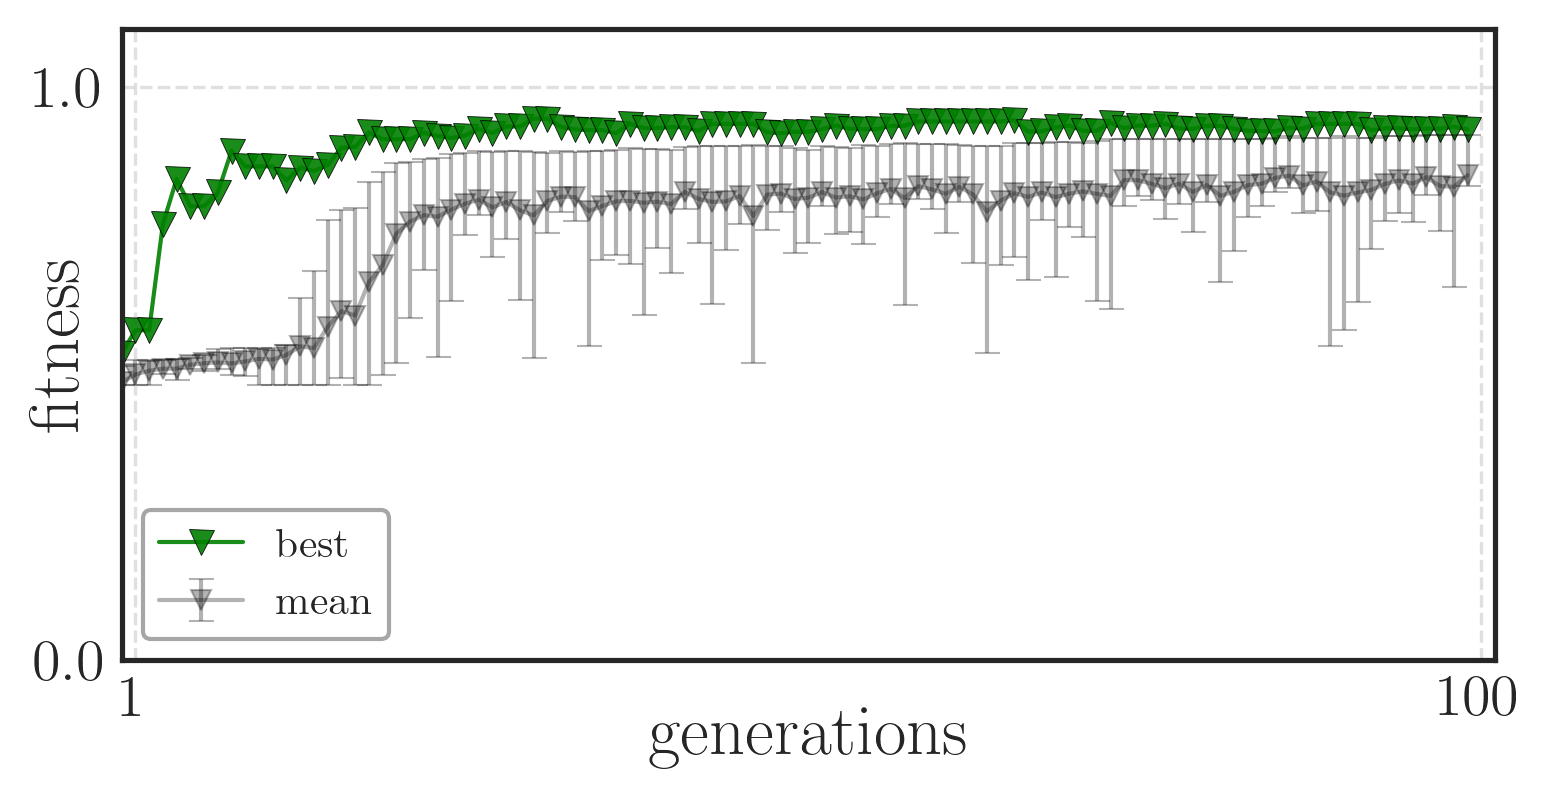

In [165]:
plt.style.use('seaborn-v0_8-white')  # Requires matplotlib-style package

plt.rcParams.update({
    'figure.figsize': (10, 4),
    'figure.dpi': 300,
    'figure.subplot.wspace': 0.1,
    'figure.subplot.hspace': 0.3,
    
    'text.usetex': True,
    
    'font.size': 17,
    'font.family': 'serif',
    'font.weight': 'normal',
    'font.serif': ['Computer Modern Roman'],
    
    'legend.fontsize': 10,
    'legend.frameon': False,

    'axes.labelsize': 17,
    'axes.titlesize': 17,
    'axes.labelweight': 'normal',
    'axes.spines.top': True,
    'axes.spines.right': True,

    'lines.linewidth': 1.0,
    'lines.markeredgewidth': 0.5,
    'lines.markeredgecolor': 'black',

    'xtick.labelsize': 14,
    'ytick.labelsize': 14,

    'savefig.format': 'pdf'
})

# Create figure with improved layout
fig, ax = plt.subplots(figsize=(5.5, 2.9))
fig.tight_layout()

# ==============================================================
# === evolution

xr = range(cutoff)
ax.plot(xr, e_max, '-v', color="green", alpha=0.9, label="best", markeredgewidth=0.2)

# p16 : array 
# p84 : array 

ax.errorbar(xr, 
            e_mean,
            yerr=[e_mean-e_p16, e_p84 - e_mean],
            fmt='-v', 
            color="black",
            label="mean",
            capsize=3,
            linewidth=1,
            alpha=0.3,
            markersize=5)

ax.legend(loc='lower left', 
          frameon=True, 
          fancybox=True, 
          framealpha=0.7, 
          edgecolor='gray')

ax.set_ylim((0, 1.1))
ax.set_xlim((0, 100))

ax.set_xlabel(r"generations", labelpad=-5)
ax.set_xticks(np.linspace(1, len(e_max), 2).astype(int))
ax.set_xticklabels(np.linspace(1, len(e_max)+1, 2).astype(int))

ax.set_ylabel(r"fitness", labelpad=-14)
ax.set_yticks(np.linspace(0, 1, 2).astype(float))
ax.set_yticklabels(np.linspace(0, 1, 2).astype(float))
ax.grid(alpha=0.6, linestyle='--')

# ==============================================================
# === Overall figure title

#fig.suptitle(r'\textbf{Evolution results}', 
#             fontsize=10, y=1.01)

# Save with high DPI for publication
plt.savefig('media/forfigures/evolution_plot.png', dpi=500, bbox_inches='tight')
plt.show()

### exploration

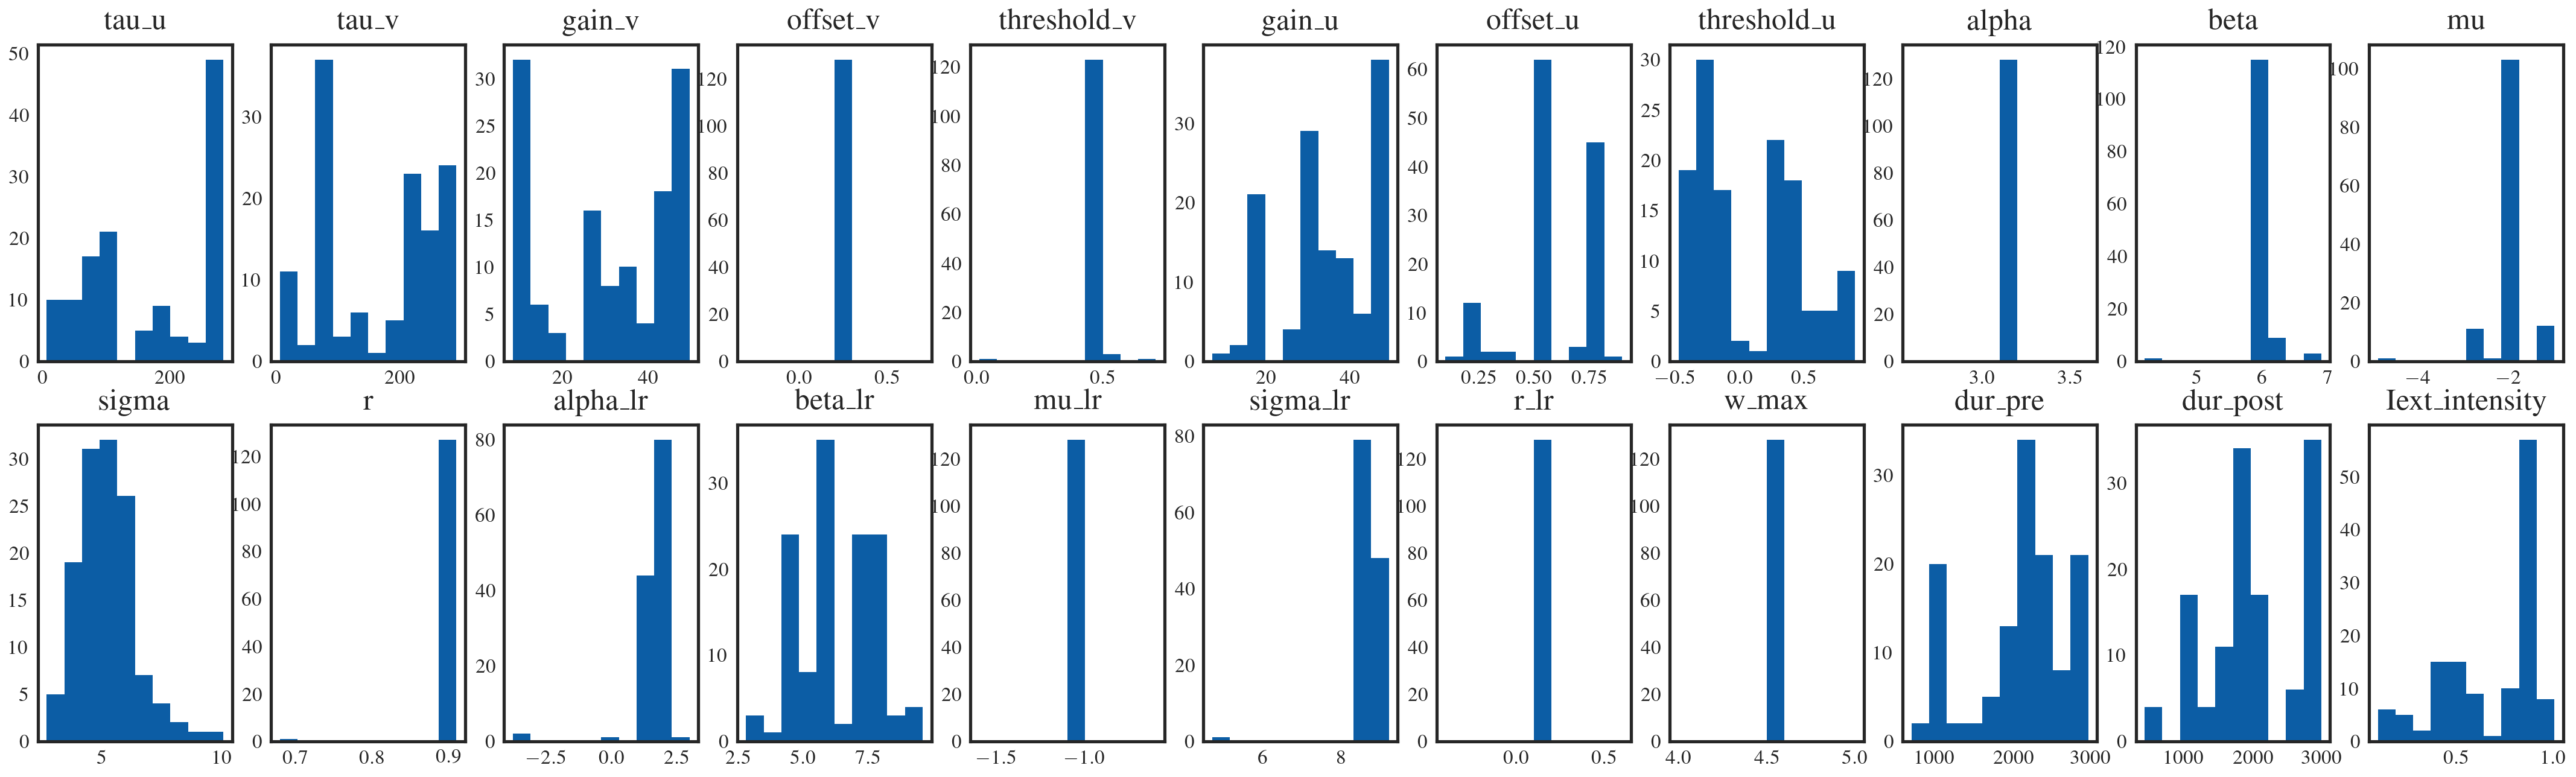

In [97]:
fig, axs = plt.subplots(2, 11, figsize=(18, 5))
axs = axs.flatten()
for i, ax in enumerate(axs):
    ax.hist(variables[i], bins=10)
    ax.set_title(variables_names[i])

plt.show()

In [293]:
histo, bin_edges = np.histogram(v, 10)

In [43]:
vnames = ('$\\tau_u$', '$\\tau_v$', '$g_v$', '$s_v$', '$\\theta_v$', '$g_u$', '$s_u$', '$\\theta_u$',
         '$\\alpha_v$', '$\\beta_v$', '$\\mu_v$', '$\\sigma_v$', 'r$_v$', '$\\alpha_{\\eta}$', '$\\beta_{\\eta}$',
         '$\\mu_{\\eta}$', '$\\sigma_{\\eta}$', 'r$_{\\eta}$','w$_{max}$', 'dur$_{pre}$', 'dur$_{post}$', 'I$_{ext}$')

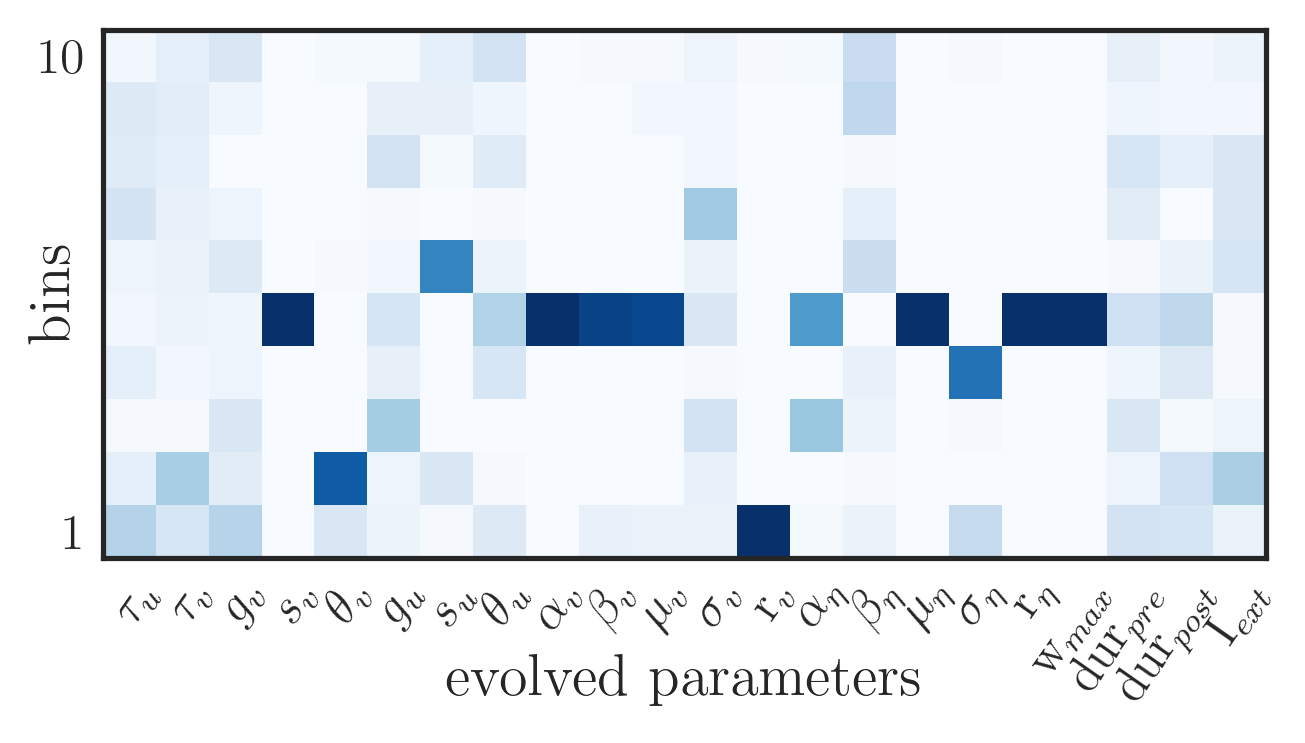

In [160]:
nbn = 10
heatm = np.zeros((22, nbn))
for i, v in enumerate(variables):
    if i > 21: break
    
    count, _ = np.histogram(v, 10)   
    heatm[i] = count
    
plt.style.use('seaborn-v0_8-white')  # Requires matplotlib-style package


plt.rcParams.update({
    'figure.figsize': (10, 4),
    'figure.dpi': 300,
    'figure.subplot.wspace': 0.1,
    'figure.subplot.hspace': 0.3,
    
    'text.usetex': True,
    
    'font.size': 14,
    'font.family': 'serif',
    'font.weight': 'normal',
    'font.serif': ['Computer Modern Roman'],
    
    'legend.fontsize': 14,
    'legend.frameon': False,

    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'axes.labelweight': 'normal',
    'axes.spines.top': True,
    'axes.spines.right': True,

    'lines.linewidth': 1.0,
    'lines.markeredgewidth': 0.5,
    'lines.markeredgecolor': 'black',

    'xtick.labelsize': 12,
    'ytick.labelsize': 12,

})


fig = plt.figure(figsize=(5., 3.5))
plt.imshow(heatm.T, cmap="Blues")
#plt.suptitle(r'')
plt.yticks((0, 9), (10, 1))
plt.xticks(range(22), vnames, rotation=55, ha='right', rotation_mode='anchor')
#plt.tight_layout(h_pad=-2)
plt.xlabel("evolved parameters", labelpad=-14)
plt.ylabel('bins', labelpad=-10)

#plt.gca().tick_params(axis='both', which='both', length=0)
#plt.xticks(range(0, 22, 1), vnames)

fig.savefig("media/forfigures/evodist_1.png", dpi=500, bbox_inches='tight')
plt.show()

In [292]:
lims = [
[1, 300], [1, 300], [1, 50], [0.1, 5], [-0.5, 0.9], [1, 50], [0.1, 5], [-0.5, 0.9], [-5, 5], [0.1, 10], [-5, 5],
    [0.1, 10], [-0.5, 1.5], [-5, 5], [0.1, 10], [-5, 5], [0.01, 10], [-0.5, 1.5], [2, 5], [400, 3000], [400, 3000], [0.1, 1]
]

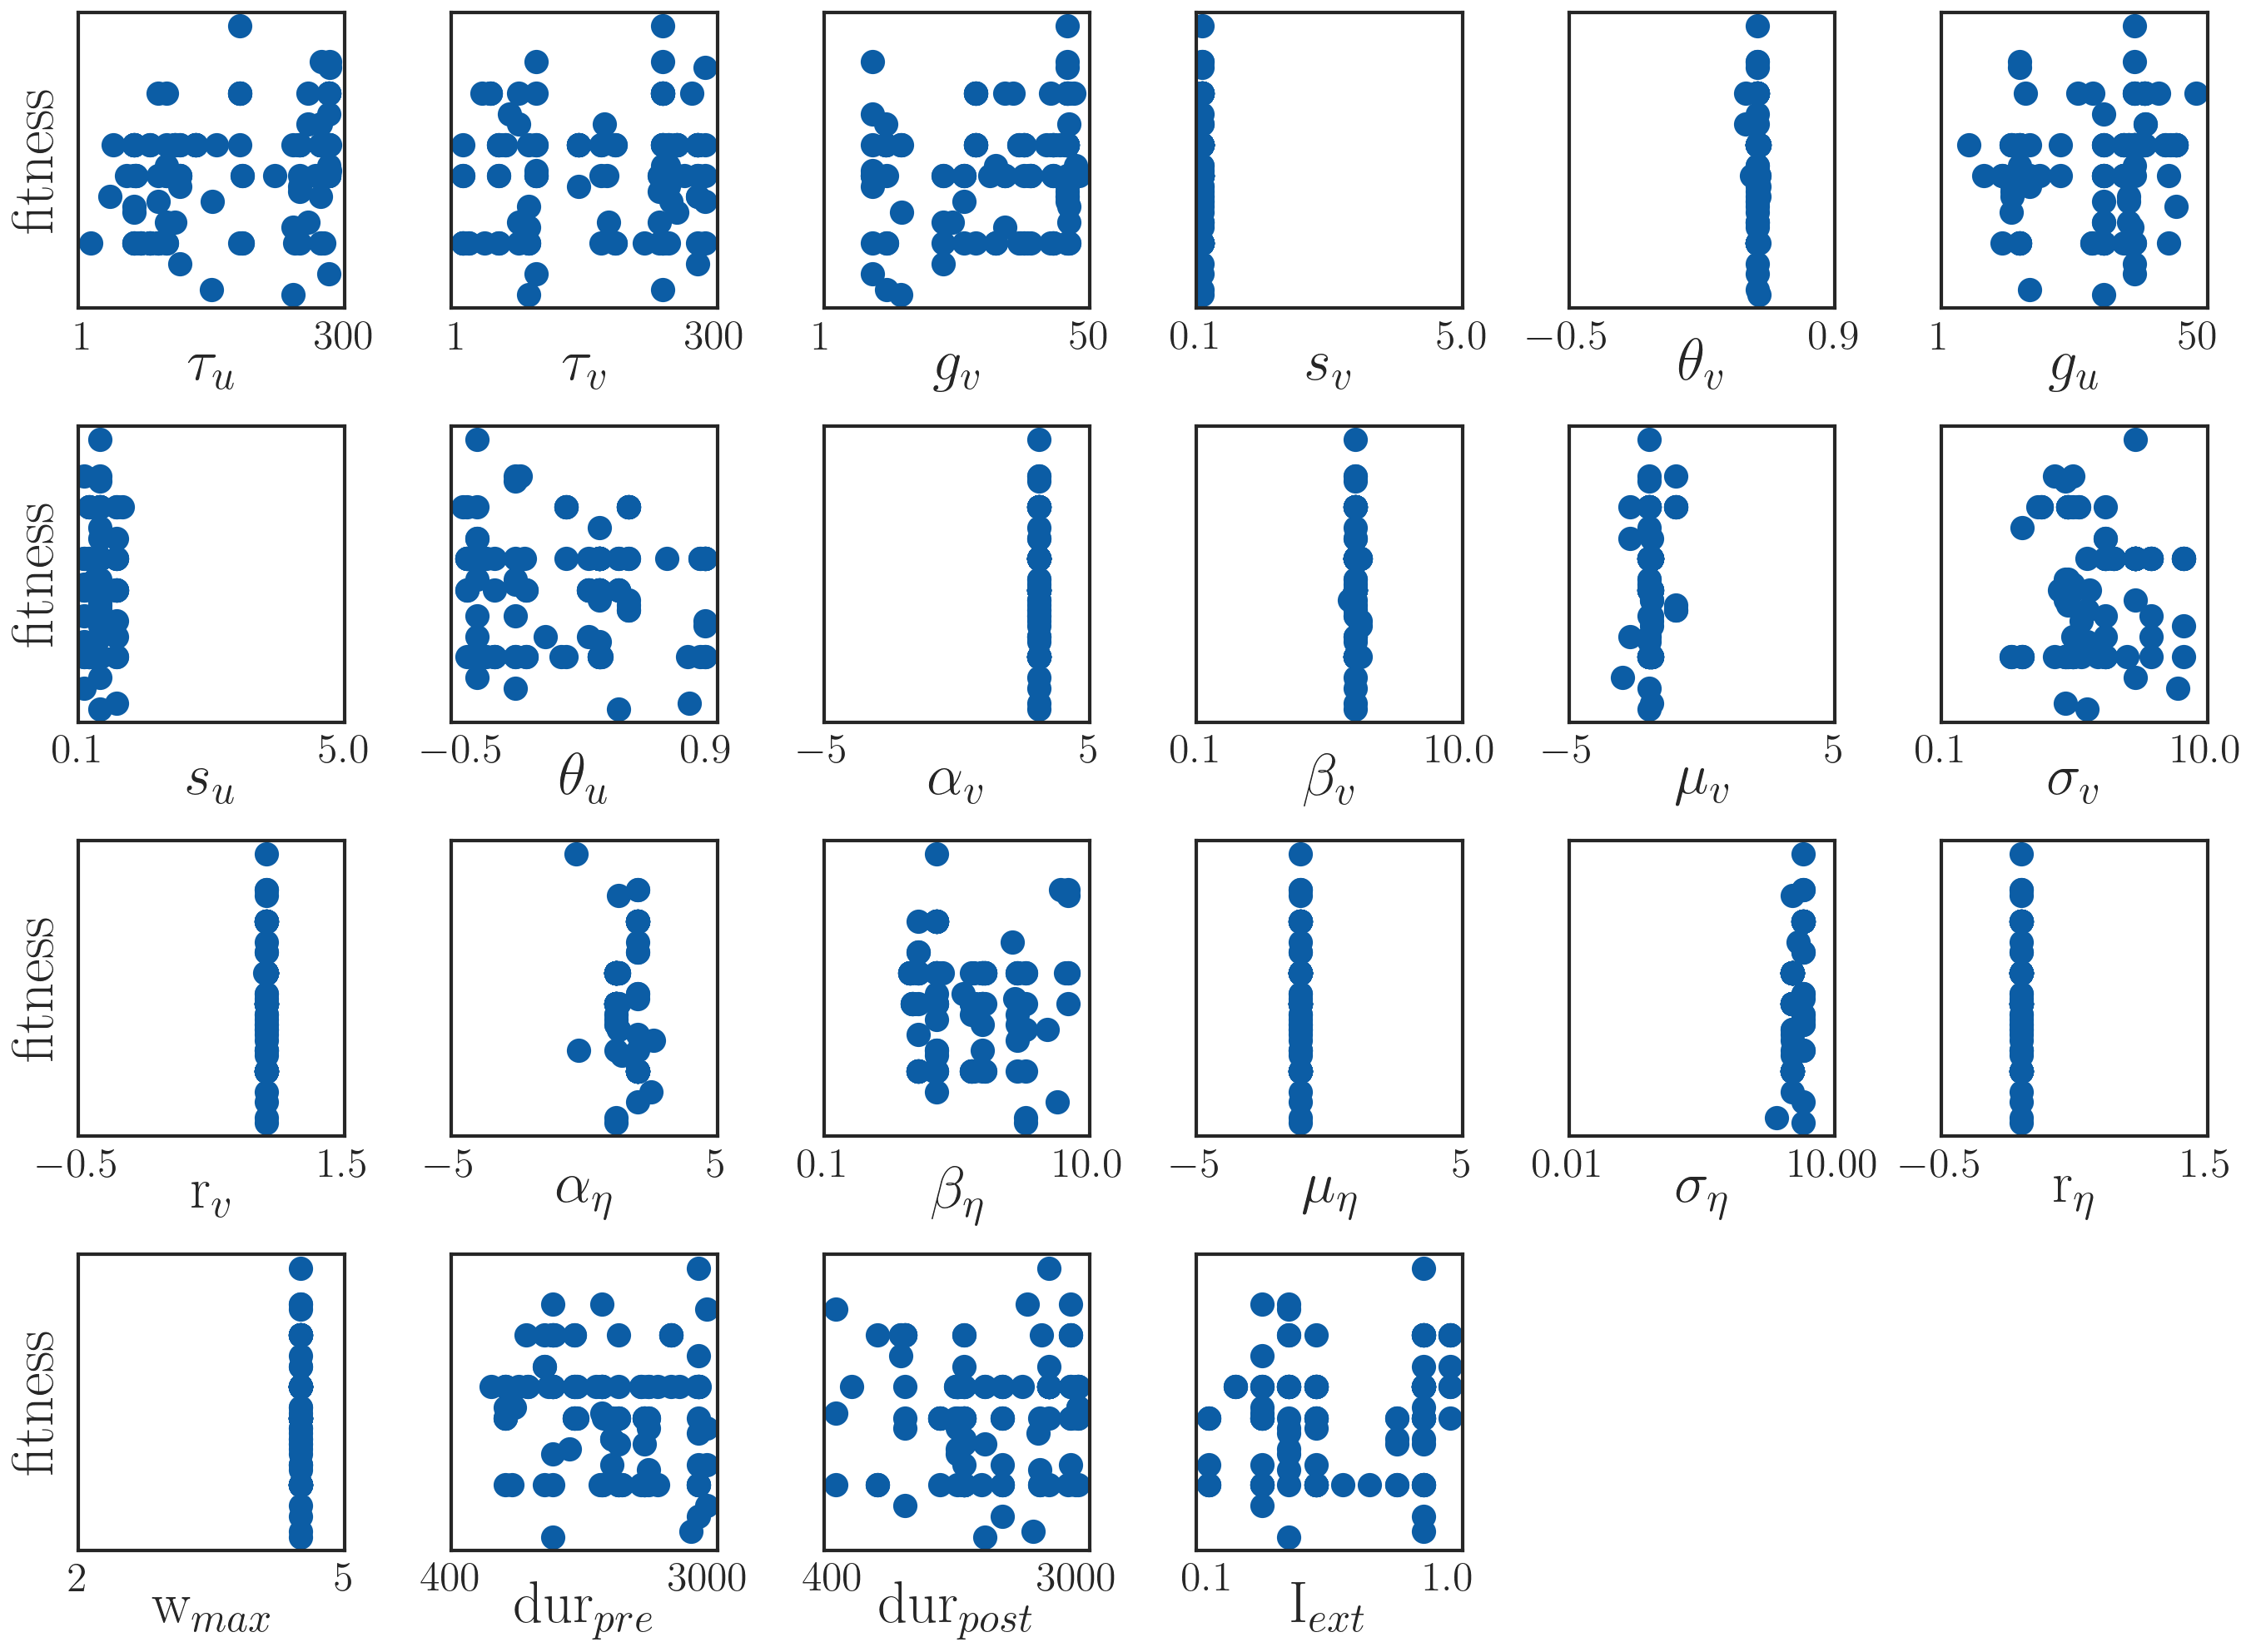

In [296]:
plt.style.use('seaborn-v0_8-white')  # Requires matplotlib-style package


plt.rcParams.update({
    'figure.figsize': (12, 4),
    'figure.dpi': 300,
    'figure.subplot.wspace': 0.4,
    'figure.subplot.hspace': 0.4,
    
    'text.usetex': True,
    
    'font.size': 13,
    'font.family': 'serif',
    'font.weight': 'normal',
    'font.serif': ['Computer Modern Roman'],
    
    'legend.fontsize': 8,
    'legend.frameon': False,

    'axes.labelsize': 17,
    'axes.titlesize': 17,
    'axes.labelweight': 'normal',
    'axes.spines.top': True,
    'axes.spines.right': True,
    'axes.linewidth': 1., 

    'lines.linewidth': 1.0,
    'lines.markeredgewidth': 0.5,
    'lines.markeredgecolor': 'black',

    'xtick.labelsize': 12,
    'ytick.labelsize': 12,

    'savefig.format': 'pdf'
})

fig, axs = plt.subplots(4, 6, figsize=(11, 8))
axs = axs.flatten()
for i, ax in enumerate(axs):
    if i < D-1:
        ax.scatter(variables[i], variables[-1])
        #ax.hist(variables[i], bins=10, density=True)
        ax.set_xlabel(f"{vnames[i]}", labelpad=-5)
        ax.set_xticks(lims[i])
        ax.set_yticks(())
        if i % 6 == 0:
            ax.set_ylabel("fitness")
        continue
    ax.axis('off')

plt.show()
fig.savefig("paper/figures/evo_tabplot.png", dpi=500)

In [263]:
variables[-1]

array([1.1105, 1.107 , 1.107 , 1.1065, 1.104 , 1.104 , 1.104 , 1.104 ,
       1.104 , 1.104 , 1.104 , 1.104 , 1.104 , 1.104 , 1.104 , 1.104 ,
       1.104 , 1.104 , 1.102 , 1.101 , 1.101 , 1.099 , 1.099 , 1.099 ,
       1.099 , 1.099 , 1.099 , 1.099 , 1.099 , 1.099 , 1.099 , 1.099 ,
       1.099 , 1.099 , 1.099 , 1.099 , 1.099 , 1.099 , 1.099 , 1.099 ,
       1.099 , 1.099 , 1.099 , 1.099 , 1.099 , 1.099 , 1.099 , 1.099 ,
       1.099 , 1.099 , 1.099 , 1.099 , 1.099 , 1.099 , 1.099 , 1.099 ,
       1.099 , 1.099 , 1.099 , 1.099 , 1.099 , 1.099 , 1.097 , 1.097 ,
       1.0965, 1.096 , 1.096 , 1.096 , 1.096 , 1.096 , 1.096 , 1.096 ,
       1.096 , 1.096 , 1.096 , 1.096 , 1.096 , 1.096 , 1.096 , 1.096 ,
       1.096 , 1.096 , 1.096 , 1.096 , 1.096 , 1.096 , 1.096 , 1.095 ,
       1.095 , 1.0945, 1.094 , 1.094 , 1.0935, 1.0935, 1.093 , 1.0925,
       1.0915, 1.0915, 1.0915, 1.091 , 1.0895, 1.0895, 1.0895, 1.0895,
       1.0895, 1.0895, 1.0895, 1.0895, 1.0895, 1.0895, 1.0895, 1.0895,
      

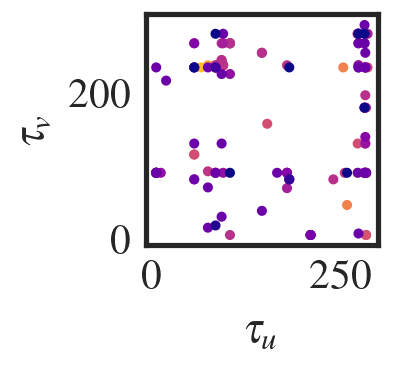

In [160]:
fig, ax = plt.subplots(figsize=(1, 1))
ax.scatter(variables[0], variables[1], c=variables[-1], s=2, cmap="plasma")
ax.set_xlabel("$\\tau_u$")
ax.set_ylabel("$\\tau_v$")
plt.show()

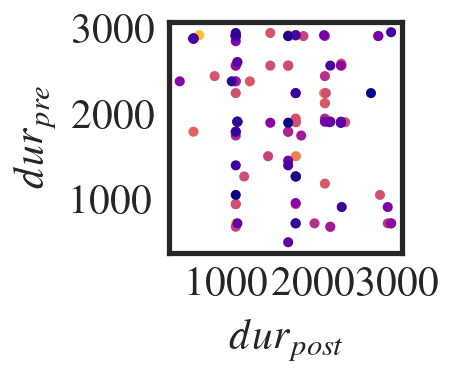

In [59]:
fig, ax = plt.subplots(figsize=(1, 1))
ax.scatter(variables[-3], variables[-4], c=variables[-1], s=2, cmap="plasma")
ax.set_xlabel("$dur_{post}$")
ax.set_ylabel("$dur_{pre}$")
plt.show()

In [158]:
cmap = plt.colormaps.get_cmap('Reds')

In [138]:
variables[-1].max()

1.1219999999999999

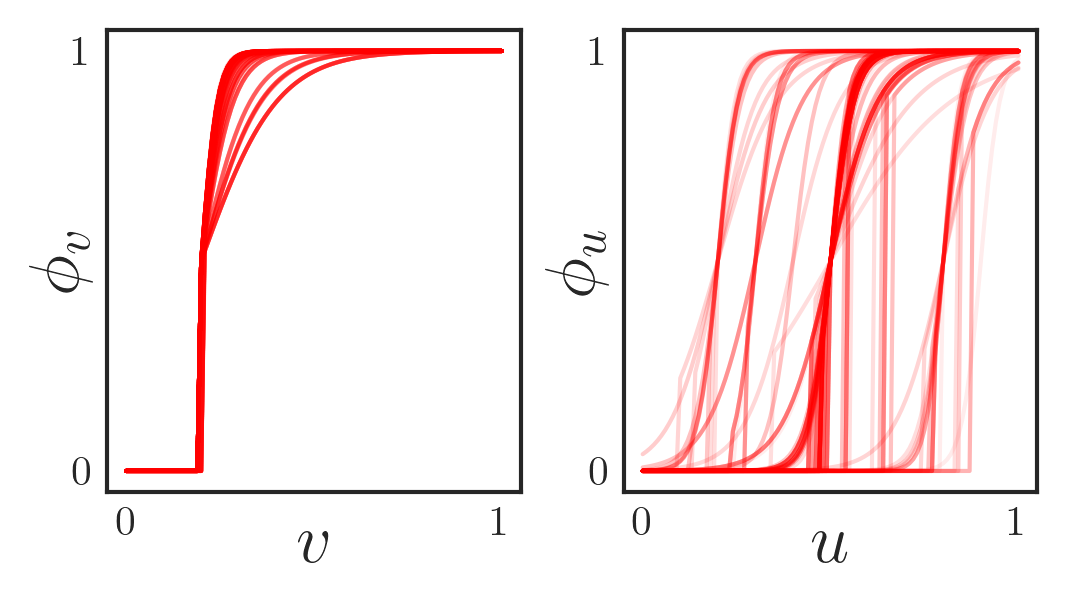

In [178]:
plt.style.use('seaborn-v0_8-white')  # Requires matplotlib-style package
plt.rcParams.update({
    'figure.figsize': (10, 4),
    'figure.dpi': 300,
    'figure.subplot.wspace': 0.25,
    'figure.subplot.hspace': 0.3,
    
    'text.usetex': True,
    
    'font.size': 17,
    'font.family': 'serif',
    'font.weight': 'normal',
    'font.serif': ['Computer Modern Roman'],
    
    'legend.fontsize': 10,
    'legend.frameon': False,

    'axes.labelsize': 17,
    'axes.titlesize': 17,
    'axes.labelweight': 'normal',
    'axes.spines.top': True,
    'axes.spines.right': True,
    'axes.linewidth': 1., 

    'lines.linewidth': 1.0,
    'lines.markeredgewidth': 0.5,
    'lines.markeredgecolor': 'black',

    'xtick.labelsize': 10,
    'ytick.labelsize': 10,

    'savefig.format': 'pdf'
})

fig, (axv, axu) = plt.subplots(1, 2, figsize=(4, 2))
#fig.tight_layout(h_pad=0.1)
x = np.arange(0, 1+0.01, 0.01)

for i in range(128):
    yv = utils.neural_response_func(x=x,
                         gain=variables[2, i],
                         offset=variables[3, i],
                         threshold=variables[4, i])
    yu = utils.neural_response_func(x=x,
                         gain=variables[5, i],
                         offset=variables[6, i],
                         threshold=variables[7, i])
    z = (variables[-1].max() - variables[-1, i])/(variables[-1].max() - variables[-1].min())
    axv.plot(x, yv, color='red', alpha=0.3*z)
    axv.set_xlabel("$v$", labelpad=-7)
    axv.set_xticks((0, 1.))
    axv.set_ylabel("$\phi_v$", labelpad=-5)
    axv.set_yticks((0, 1.))

    #
    axu.plot(x, yu, color='red', alpha=0.3*z)
    axu.set_xlabel("$u$", labelpad=-7)
    axu.set_xticks((0, 1.))
    axu.set_ylabel("$\phi_u$", labelpad=-5)
    axu.set_yticks((0, 1.))
    
fig.savefig("media/forfigures/nrf_1.png", dpi=500, bbox_inches='tight')
plt.show()

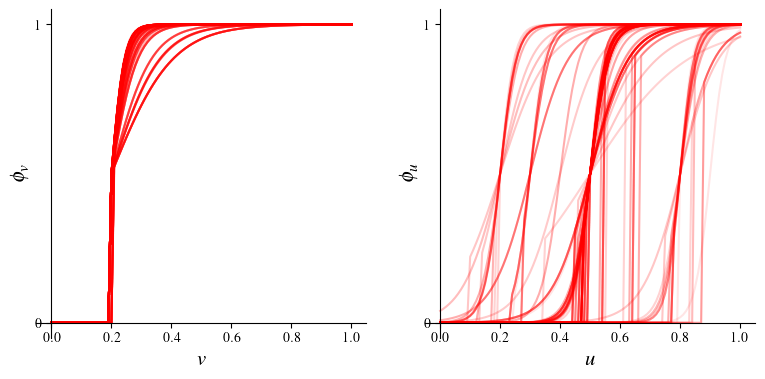

In [40]:
plt.style.use('default')  # Requires matplotlib-style package
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times', 'Computer Modern Roman'],
    'text.usetex': True,
    'axes.labelsize': 15,
    'font.size': 15,
    'legend.fontsize': 15,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})

fig, (axv, axu) = plt.subplots(1, 2, figsize=(8, 4))
fig.tight_layout(h_pad=0.1)

x = np.arange(0, 1+0.01, 0.01)
for i in range(128):
    yv = utils.neural_response_func(x=x,
                         gain=variables[2, i],
                         offset=variables[3, i],
                         threshold=variables[4, i])
    yu = utils.neural_response_func(x=x,
                         gain=variables[5, i],
                         offset=variables[6, i],
                         threshold=variables[7, i])
    z = (variables[-1].max() - variables[-1, i])/(variables[-1].max() - variables[-1].min())
    
    for ax in [axv, axu]:
        # Remove top and right spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        # Keep only bottom and left spines
        ax.spines['bottom'].set_position(('data', 0))
        ax.spines['left'].set_position(('data', 0))
        
        # Remove top and right ticks
        ax.tick_params(top=False, right=False)

    axv.plot(x, yv, color='red', alpha=0.4*z)
    axv.set_xlabel("$v$")
    axv.set_ylabel("$\phi_v$")
    axv.set_yticks((0, 1.))
    
    axu.plot(x, yu, color='red', alpha=0.4*z)
    axu.set_xlabel("$u$")
    axu.set_ylabel("$\phi_u$")
    axu.set_yticks((0, 1.))

plt.show()

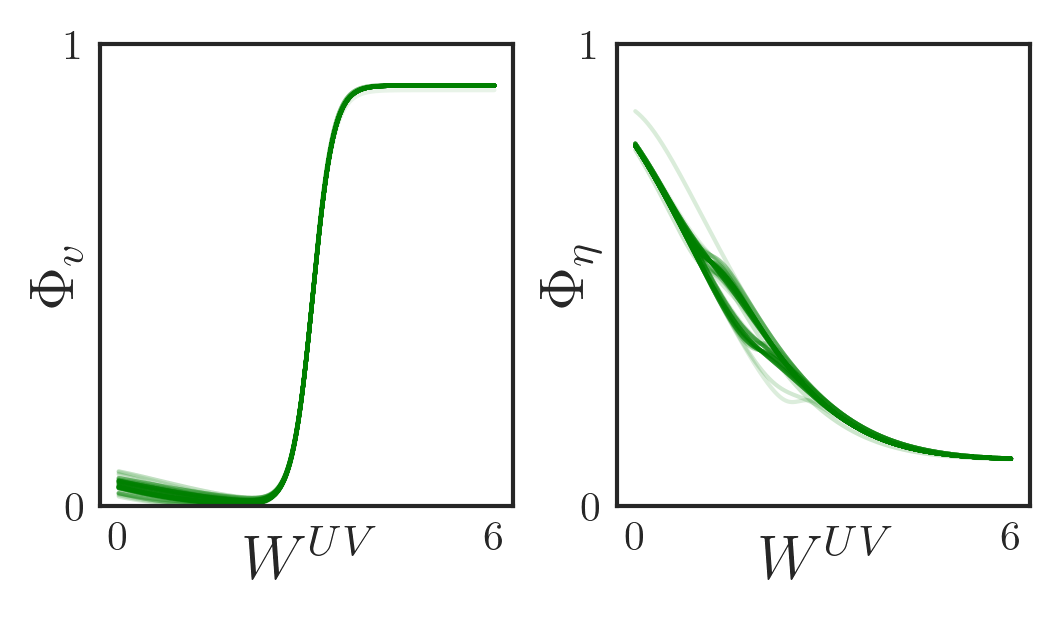

In [176]:
plt.style.use('seaborn-v0_8-white')  # Requires matplotlib-style package
plt.rcParams.update({
    'figure.figsize': (10, 4),
    'figure.dpi': 300,
    'figure.subplot.wspace': 0.25,
    'figure.subplot.hspace': 0.3,
    
    'text.usetex': True,
    
    'font.size': 17,
    'font.family': 'serif',
    'font.weight': 'normal',
    'font.serif': ['Computer Modern Roman'],
    
    'legend.fontsize': 10,
    'legend.frameon': False,

    'axes.labelsize': 15,
    'axes.titlesize': 15,
    'axes.labelweight': 'normal',
    'axes.spines.top': True,
    'axes.spines.right': True,
    'axes.linewidth': 1.,

    'lines.linewidth': 1.0,
    'lines.markeredgewidth': 0.5,
    'lines.markeredgecolor': 'black',

    'xtick.labelsize': 10,
    'ytick.labelsize': 10,

    'savefig.format': 'pdf'
})

fig, (axv, axu) = plt.subplots(1, 2, figsize=(4, 2))
#fig.tight_layout(h_pad=0.4)
x = np.arange(0, 6+0.01, 0.01)

for i in range(128):
    yv = utils.gaussian_sigmoid(x, 
                     alpha=variables[8, i],
                     beta=variables[9, i],
                     mu=variables[10, i],
                     sigma=variables[11, i],
                     r=variables[12, i])
    yu = utils.gaussian_sigmoid(x, 
                     alpha=variables[13, i],
                     beta=variables[14, i],
                     mu=variables[15, i],
                     sigma=variables[16, i],
                     r=variables[17, i])
    axv.plot(x, yv, color='green',
             alpha=0.2*(variables[-1].max() - variables[-1, i])/(variables[-1].max() - variables[-1].min()))
    axv.set_ylabel("$\Phi_v$", labelpad=-5)
    axv.set_ylim((0, 1.))
    axv.set_yticks((0, 1.))
    axv.set_xticks((0, 6.))
    axv.set_xlabel("$W^{UV}$", labelpad=-5)
    
    axu.plot(x, yu, color='green',
             alpha=0.2*(variables[-1].max() - variables[-1, i])/(variables[-1].max() - variables[-1].min()))
    axu.set_ylabel("$\Phi_{\eta}$", labelpad=-5)
    axu.set_ylim((0, 1.))
    axu.set_yticks((0, 1.))
    axu.set_xticks((0, 6.))
    axu.set_xlabel("$W^{UV}$", labelpad=-5)

fig.savefig("media/forfigures/gs_1.png", dpi=500, bbox_inches='tight')
plt.show()

### data analysis

In [257]:
corr_matrix = np.corrcoef(variables[:-1], rowvar=True)

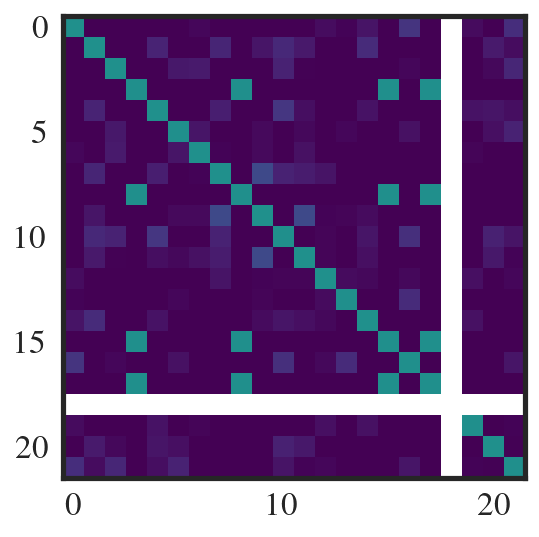

In [258]:
plt.figure(figsize=(2, 2))
plt.imshow(cov_matrix, vmin=0, vmax=2, cmap="viridis")
plt.show()

In [255]:
cov_matrix

array([[ 1.00000000e+00, -1.19341713e-01, -1.39377951e-02,
         0.00000000e+00, -1.27291917e-02, -1.59604373e-02,
         3.41828363e-02, -1.47423038e-01,  0.00000000e+00,
        -3.22738919e-01, -1.57978360e-02, -1.32995607e-01,
         6.35549590e-02,  1.84024230e-02,  1.03364280e-01,
         0.00000000e+00,  2.97336814e-01,  0.00000000e+00,
                    nan,  6.06857446e-02, -4.47328447e-02,
         2.62897966e-01],
       [-1.19341713e-01,  1.00000000e+00,  7.69829736e-03,
         0.00000000e+00,  1.96631106e-01,  6.57338714e-03,
        -4.94628224e-02,  2.04339374e-01,  0.00000000e+00,
         1.16647836e-01,  2.32293076e-01,  1.38719097e-01,
        -6.35945895e-02, -2.19729782e-01,  2.44791224e-01,
         0.00000000e+00, -1.50243915e-02,  0.00000000e+00,
                    nan, -4.24446123e-02,  1.42005610e-01,
         6.48037014e-02],
       [-1.39377951e-02,  7.69829736e-03,  1.00000000e+00,
        -9.57382039e-17, -6.03447416e-02,  1.30074996e-01,
    

In [191]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression

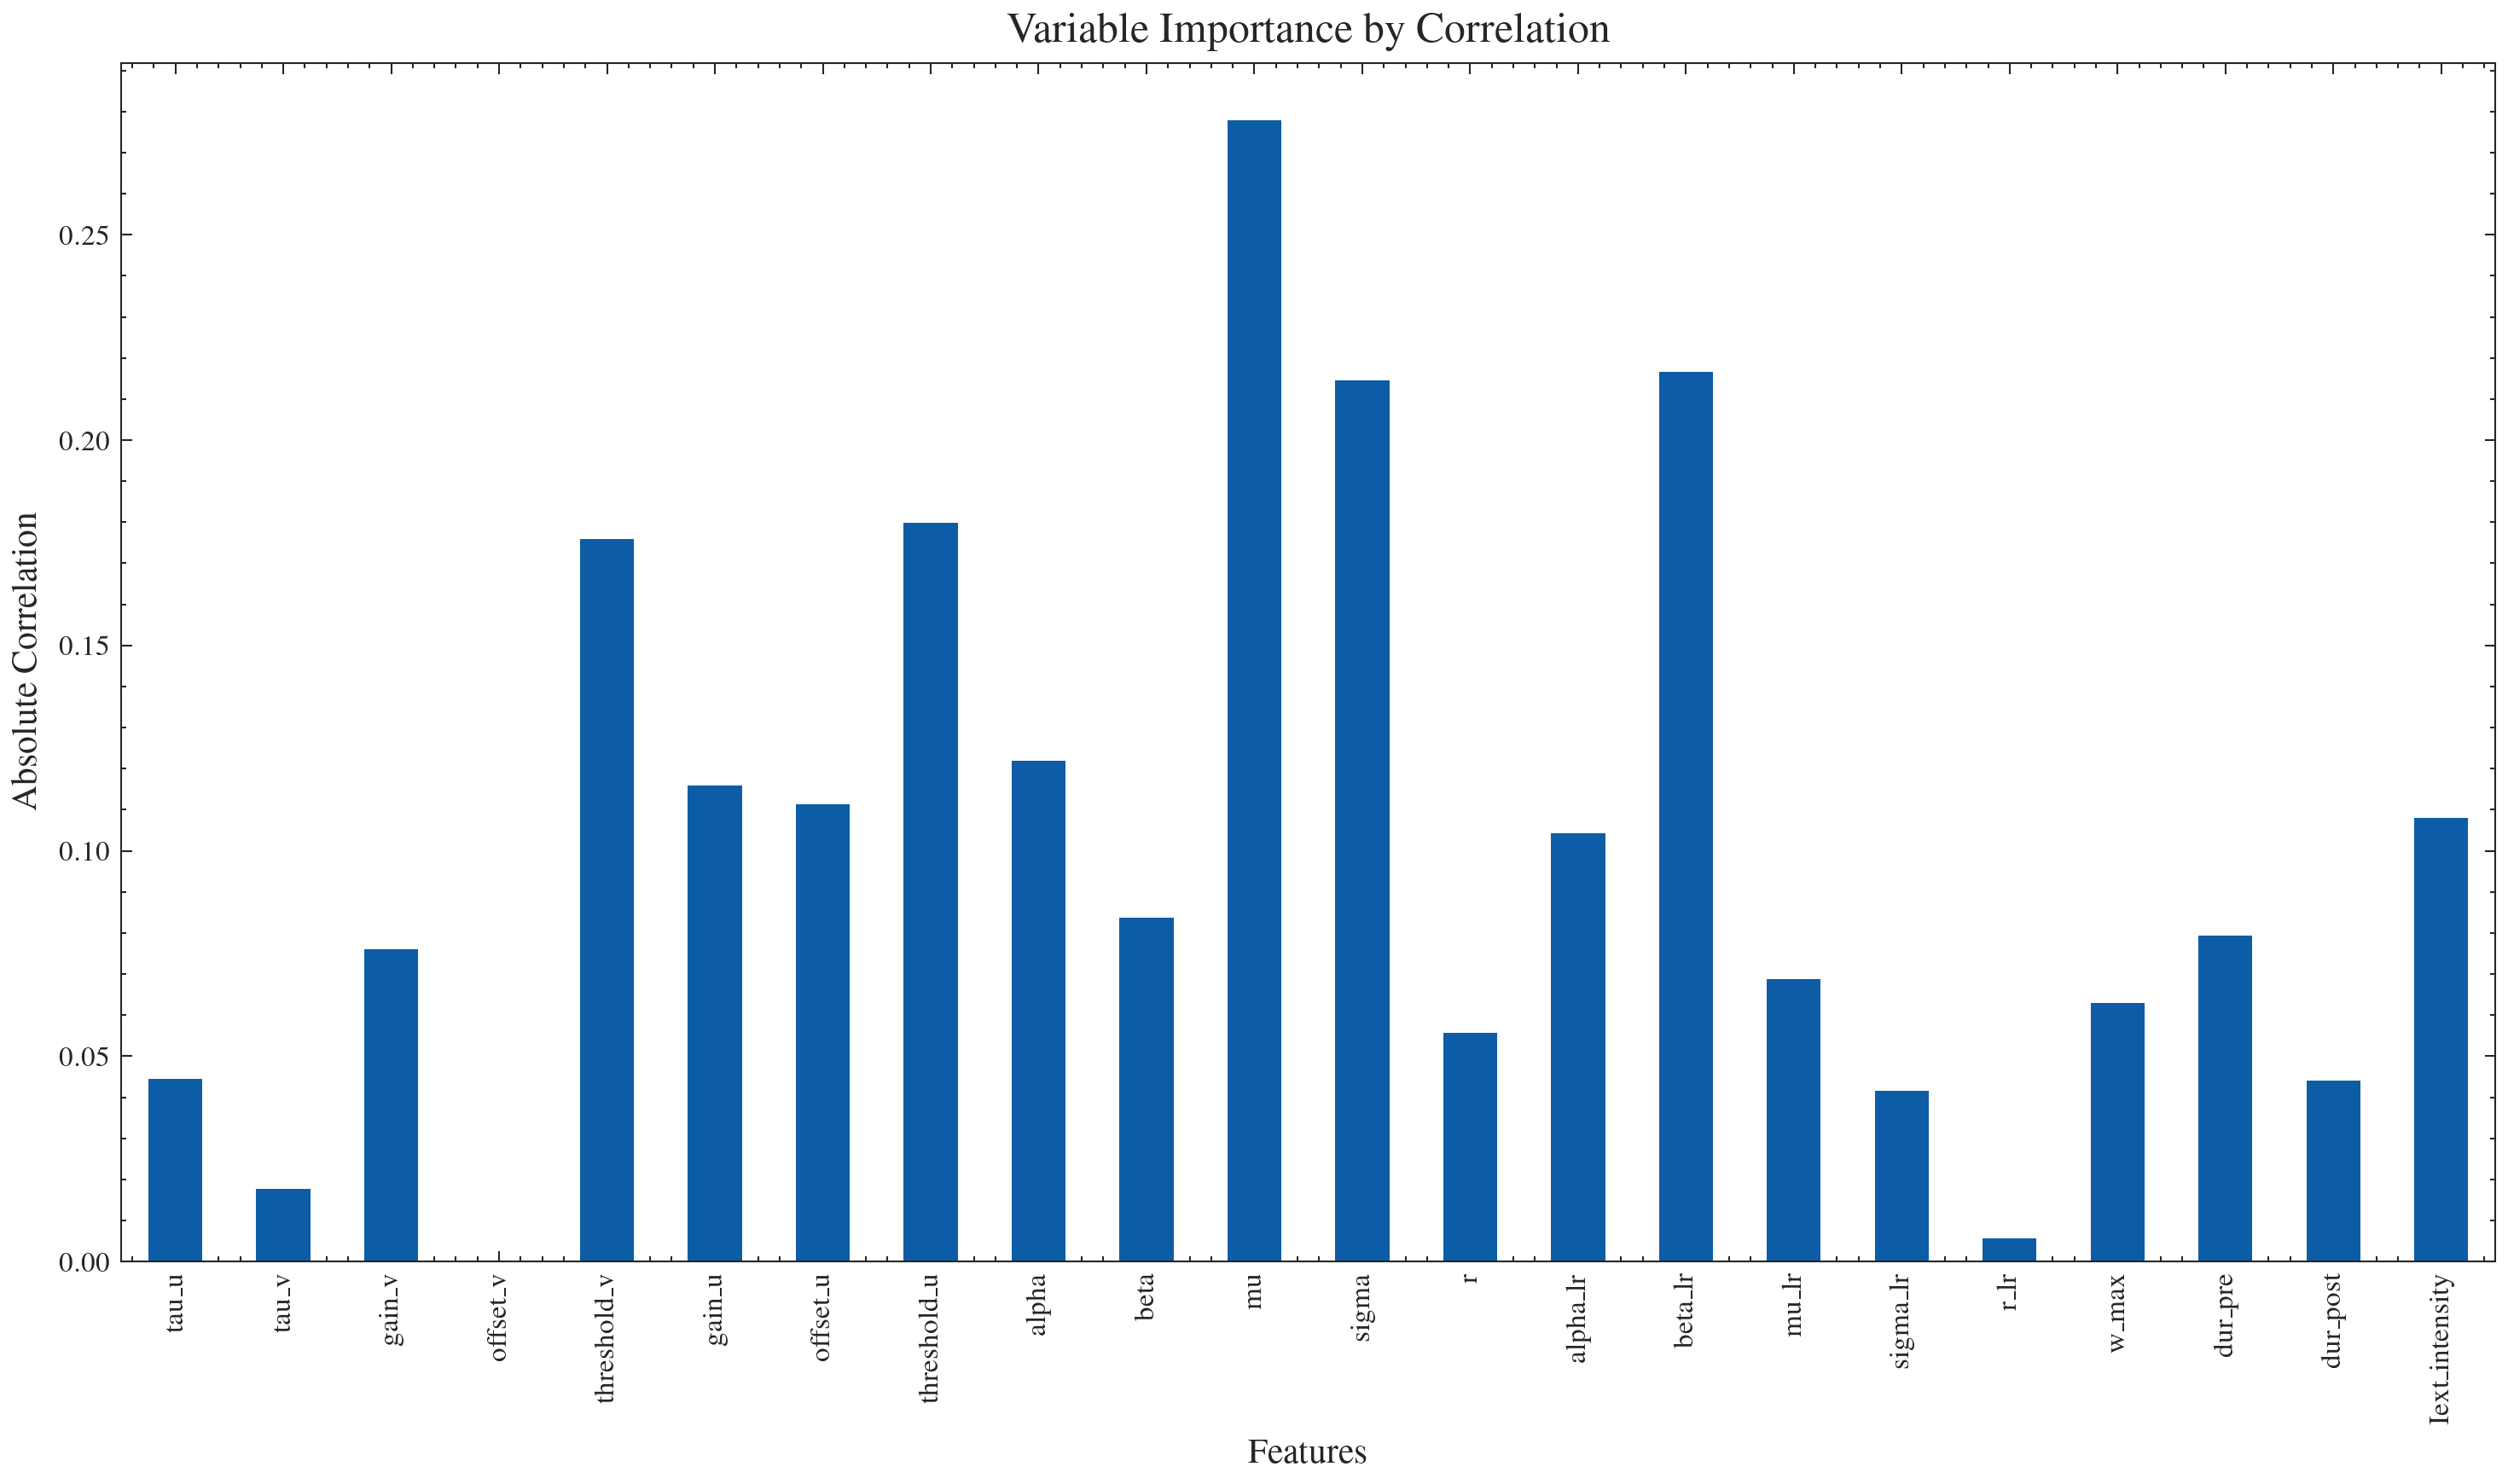

In [202]:
""" correlation """
# Calculate absolute correlations
correlations = df.corr()['y'].drop('y')
correlations_abs = np.abs(correlations)

plt.figure(figsize=(10, 6))
correlations_abs.plot(kind='bar')
plt.title('Variable Importance by Correlation')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation')
plt.tight_layout()
plt.show()

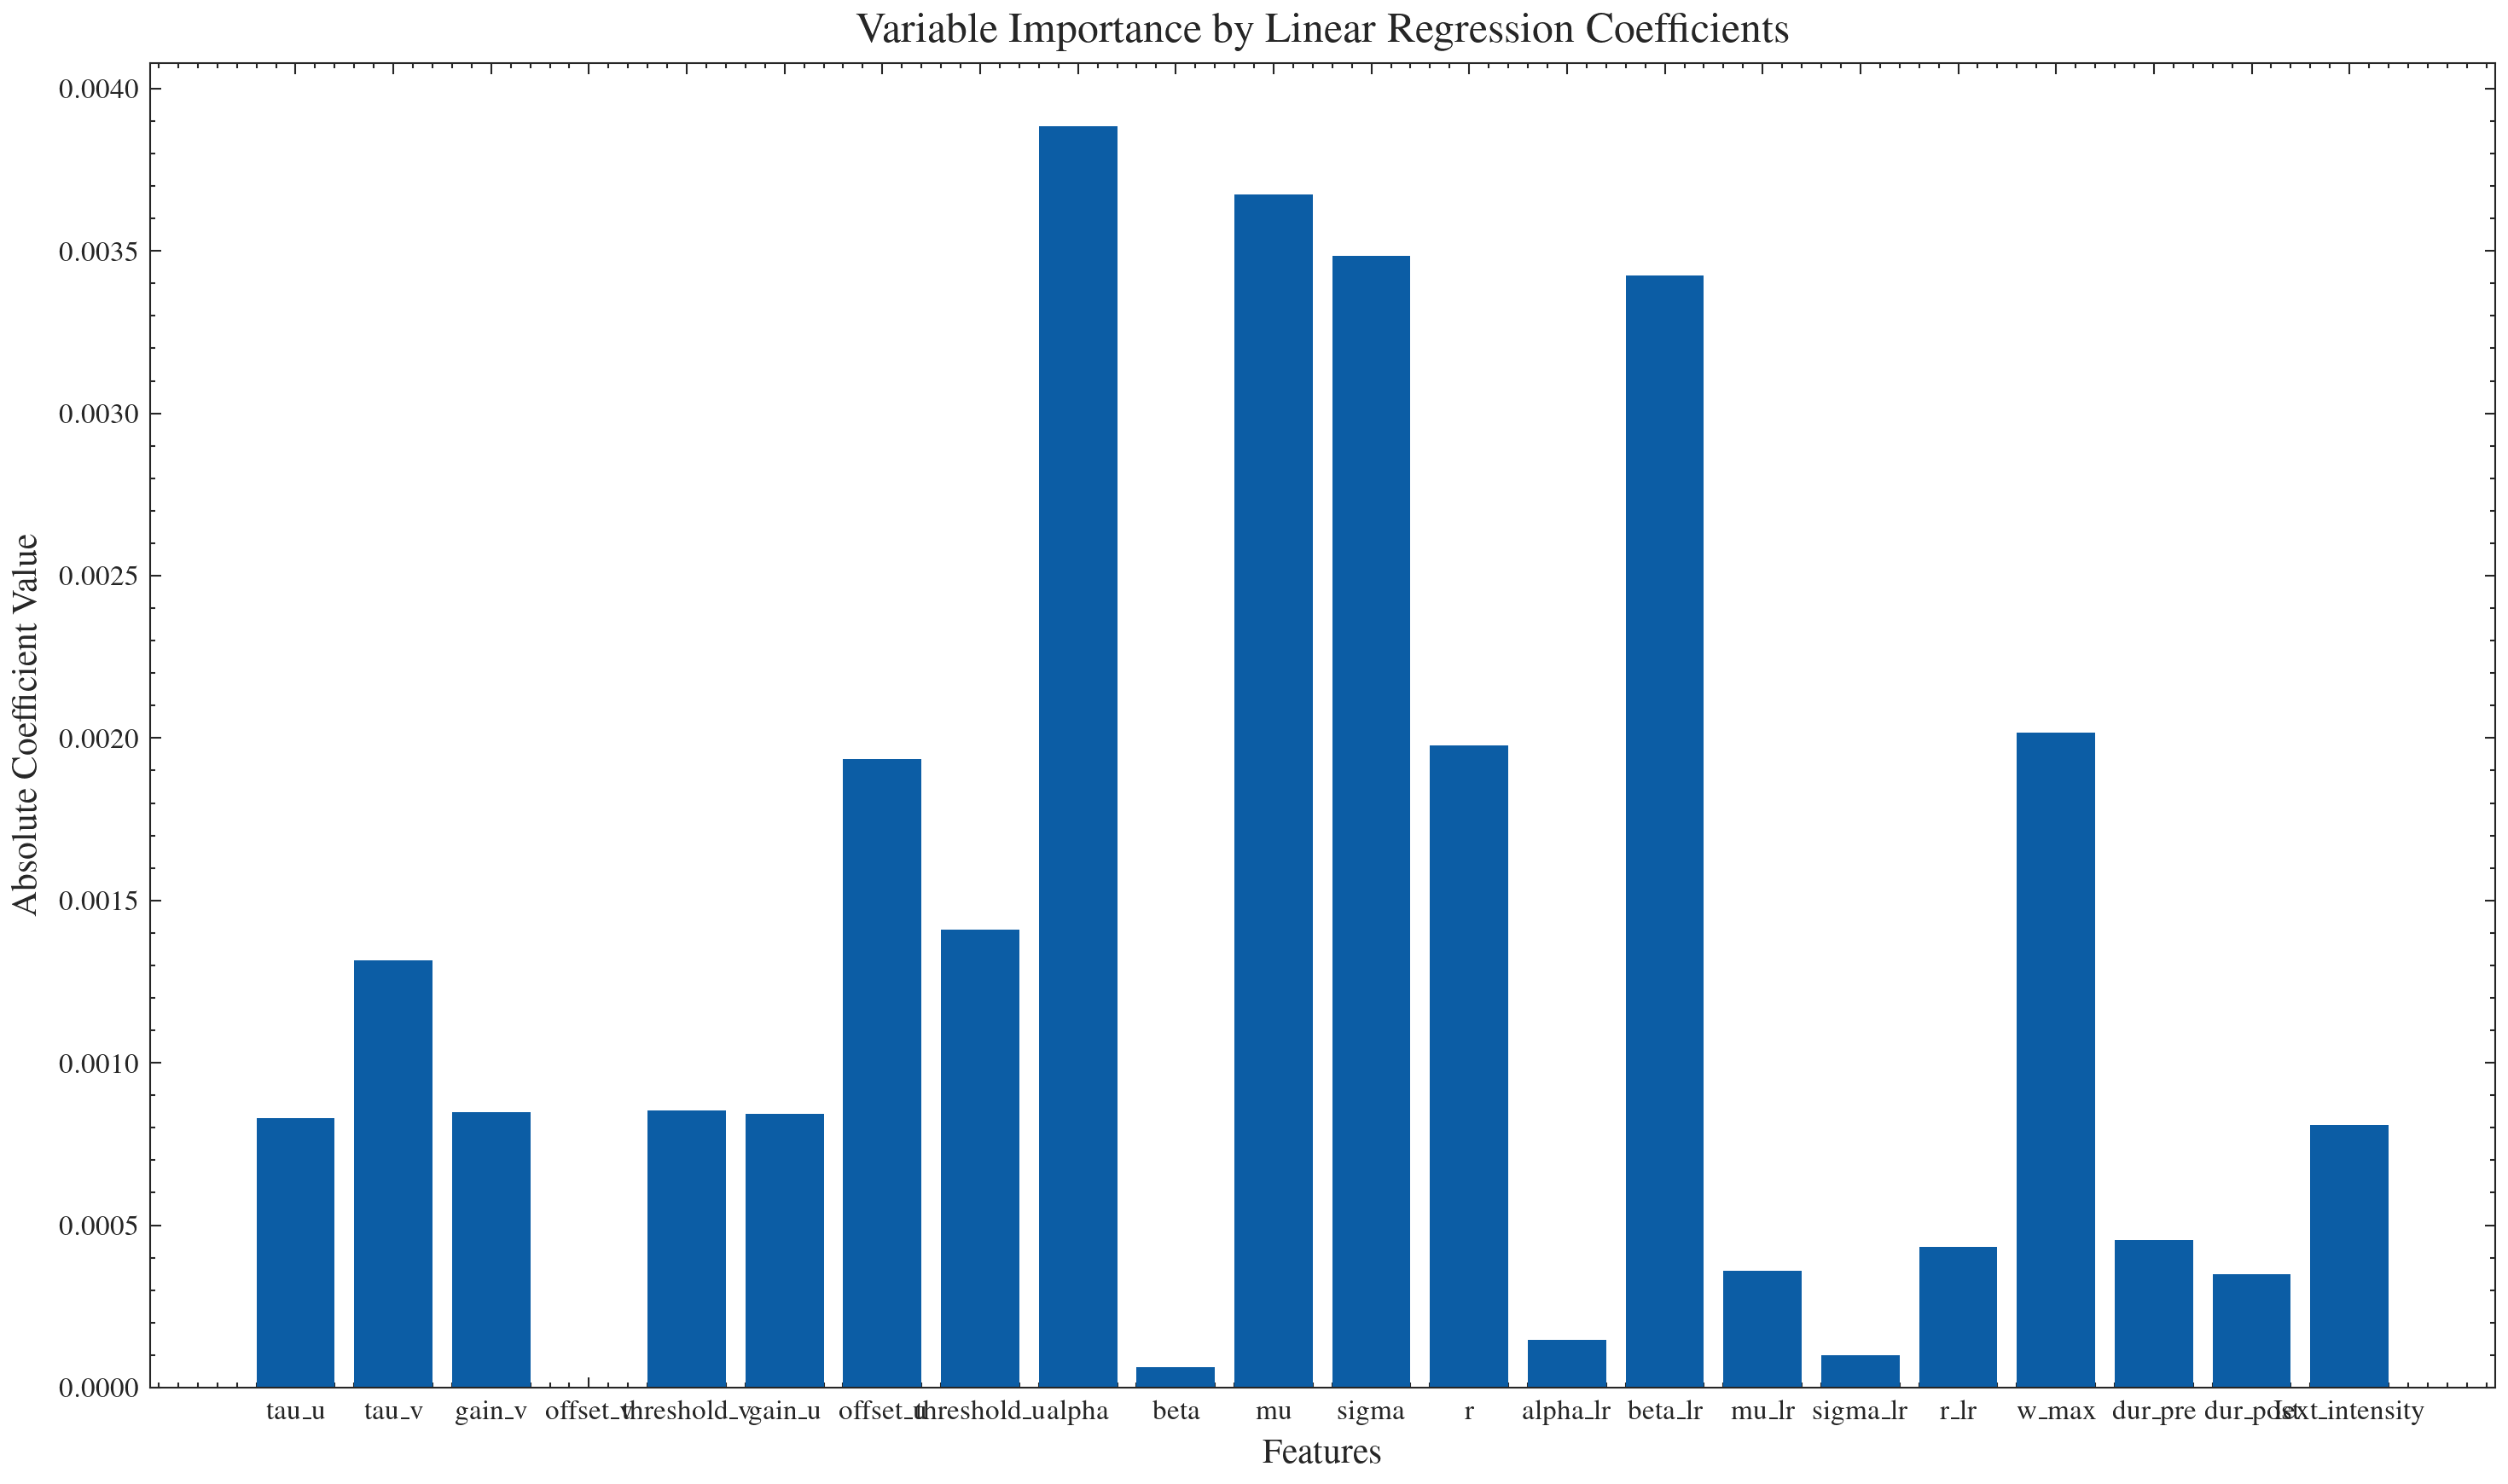

In [203]:
""" linear coefficients """
# Prepare the data
X = df.drop('y', axis=1)
y = df['y']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit linear regression
lr = LinearRegression()
lr.fit(X_scaled, y)

# Get absolute coefficient values
coef_importance = np.abs(lr.coef_)

plt.figure(figsize=(10, 6))
plt.bar(X.columns, coef_importance)
plt.title('Variable Importance by Linear Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

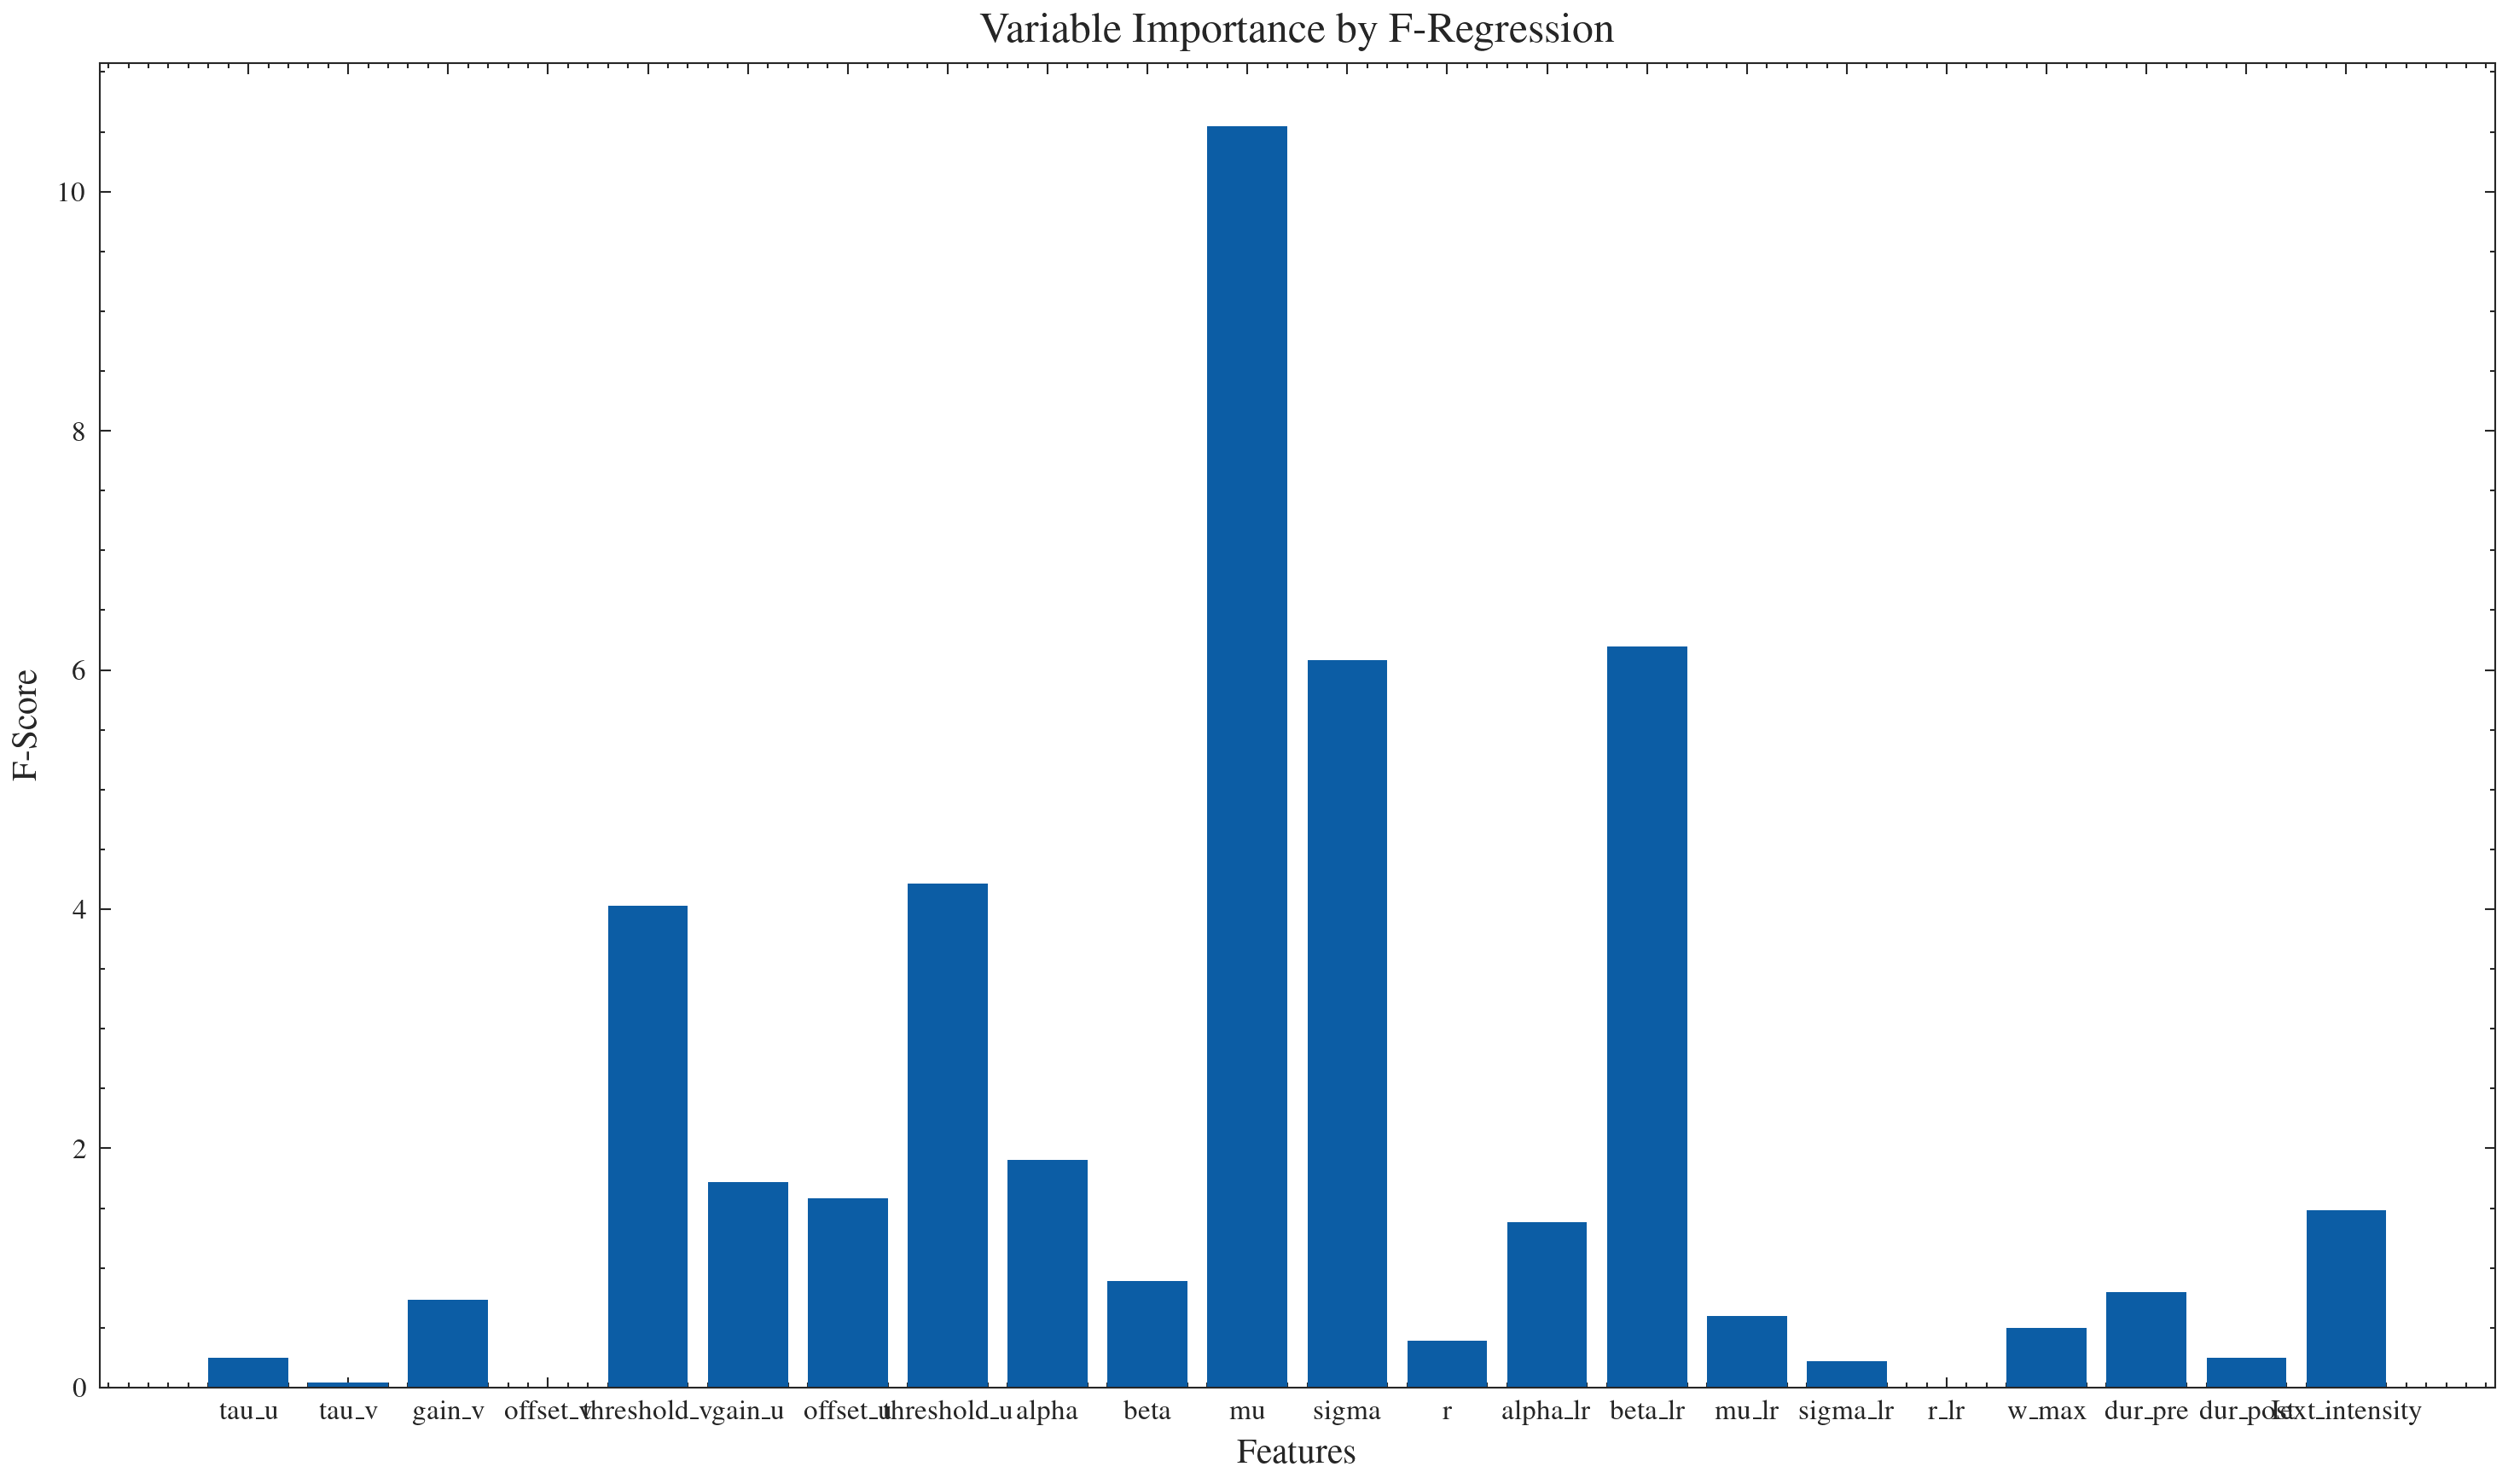

In [204]:
""" F-test """

# Prepare the data
X = df.drop('y', axis=1)
y = df['y']

# Compute F-scores
f_scores, p_values = f_regression(X, y)

plt.figure(figsize=(10, 6))
plt.bar(X.columns, f_scores)
plt.title('Variable Importance by F-Regression')
plt.xlabel('Features')
plt.ylabel('F-Score')
plt.tight_layout()
plt.show()

In [232]:
plt.figure(figsize=(5, 3))
plt.bar(X.columns, f_scores)
plt.title('Variable Importance by F-Regression')
plt.xlabel('Features')
plt.ylabel('F-Score')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')  # Additional refinement
plt.tight_layout(pad=2)  # Optional: add some extra padding
plt.show()

NameError: name 'X' is not defined

<Figure size 1500x900 with 0 Axes>

In [277]:
X.columns = 

'tau_u'

In [60]:
vnames = ('$\\tau_u$', '$\\tau_v$', '$g_v$', '$s_v$', '$\\theta_v$', '$g_u$', '$s_u$', '$\\theta_u$',
         '$\\alpha_v$', '$\\beta_v$', '$\\mu_v$', '$\\sigma_v$', 'r$_v$', '$\\alpha_{\\eta}$', '$\\beta_{\\eta}$',
         '$\\mu_{\\eta}$', '$\\sigma_{\\eta}$', 'r$_{\\eta}$','w$_{max}$', 'dur$_{pre}$', 'dur$_{post}$', 'I$_{ext}$')
X.columns = vnames
plt.figure(figsize=(5, 3))
plt.bar(X.columns, f_scores)
plt.title('Variable Importance by F-Regression')
plt.xlabel('Features')
plt.ylabel('F-Score')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')  # Additional refinement
plt.tight_layout(pad=2)  # Optional: add some extra padding
plt.show()

NameError: name 'X' is not defined

#### clustering

In [223]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

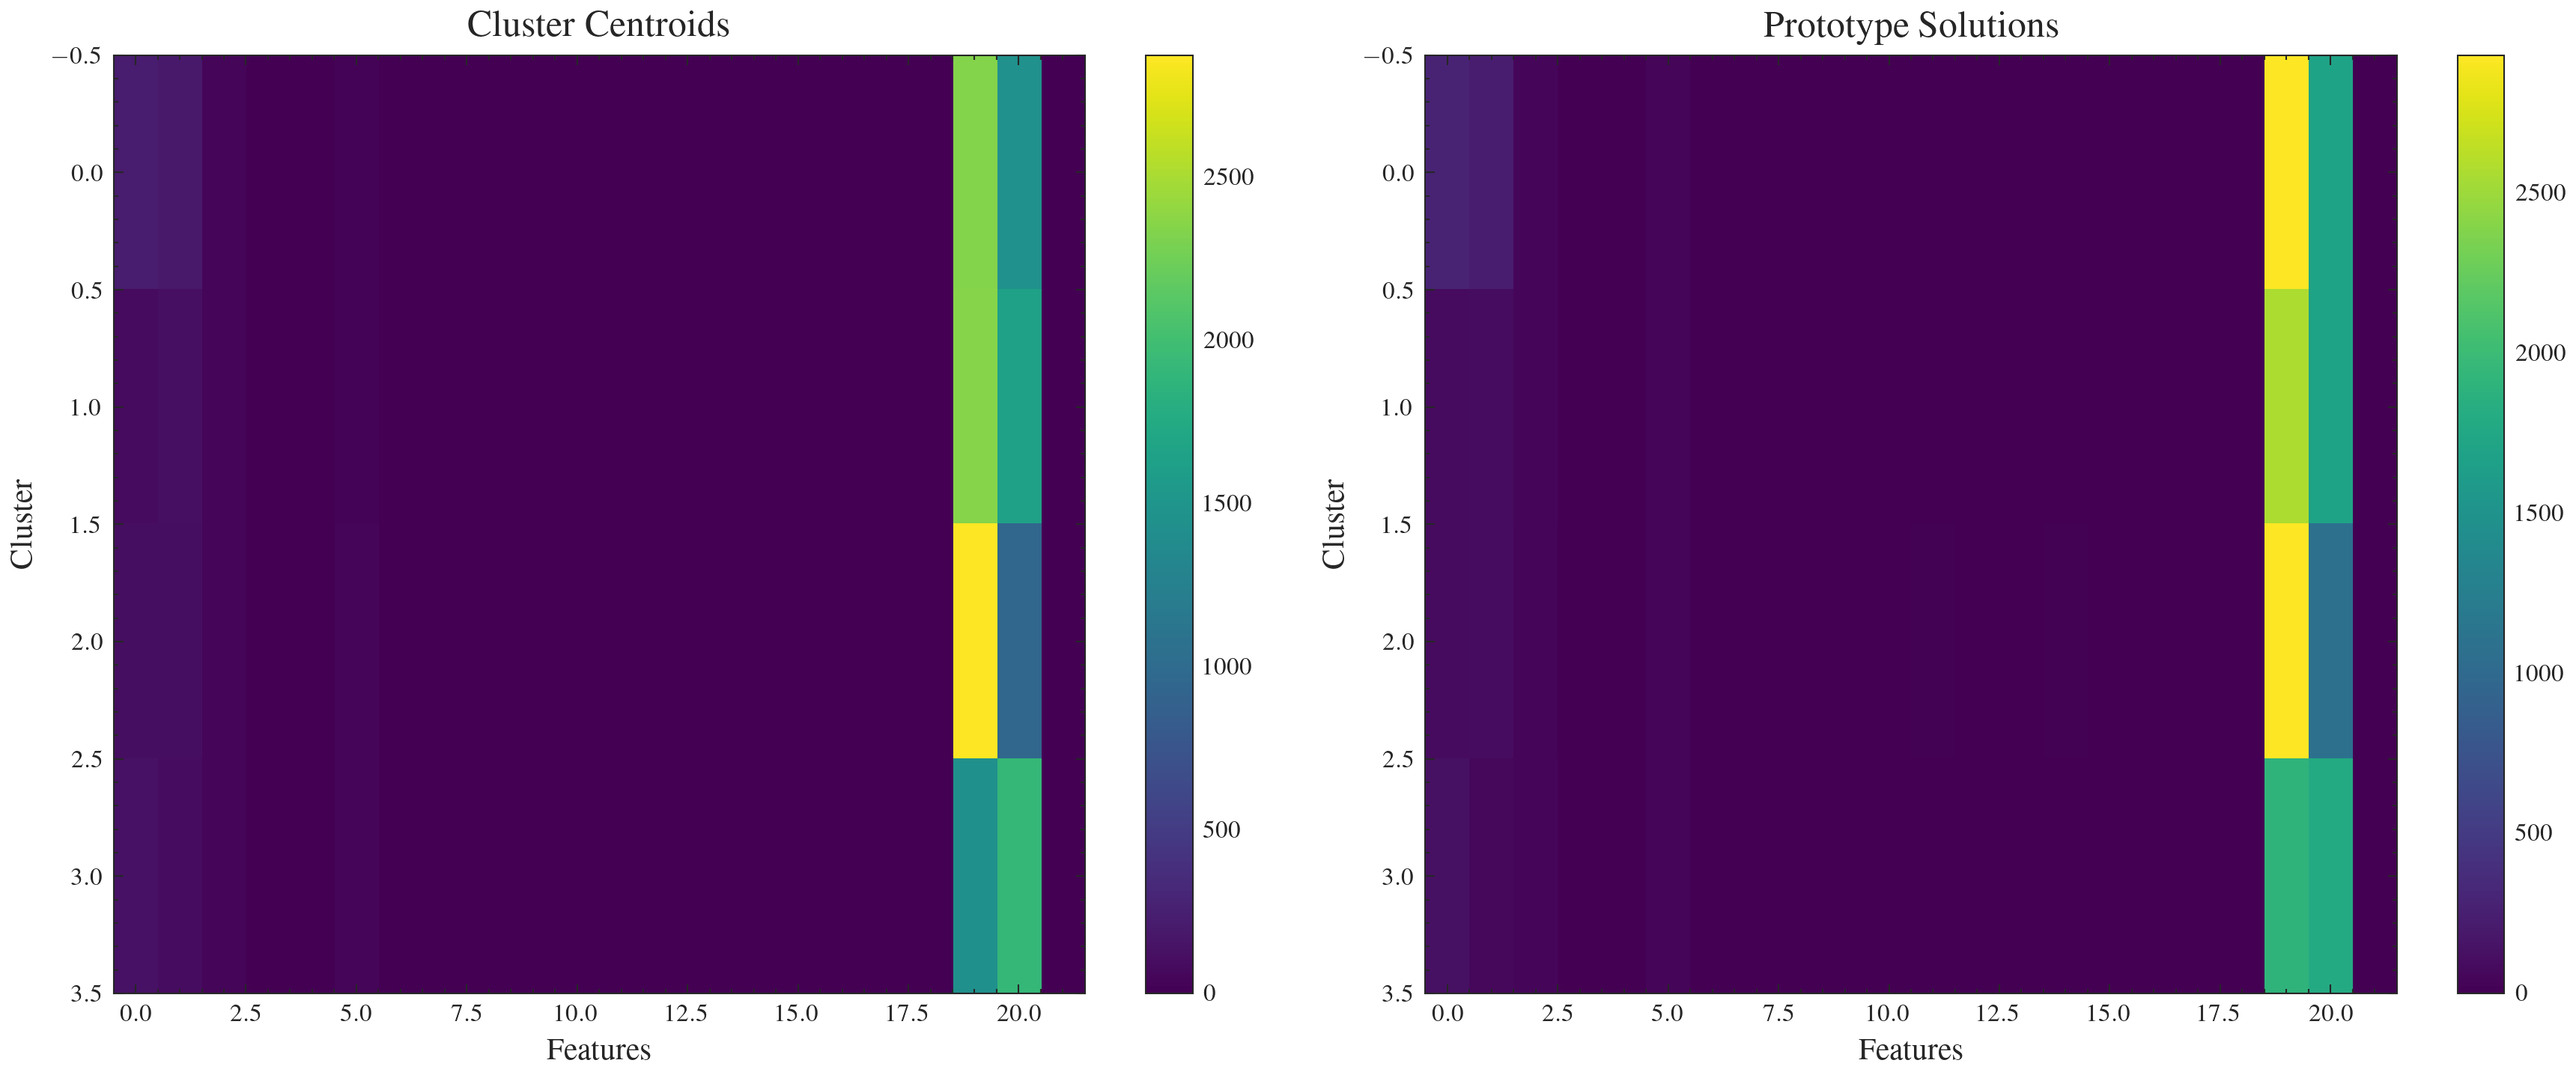

In [225]:
""" k-means """

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=5)
labels = kmeans.fit_predict(X_scaled)

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Find the closest point to each centroid (most representative solution)
prototypes = []
for i in range(n_clusters):
    cluster_points = X_scaled[labels == i]
    distances = cdist(cluster_points, [centroids[i]], metric='euclidean')
    prototype_idx = np.argmin(distances)
    prototypes.append(cluster_points[prototype_idx])

# Convert back to original scale
centroids_original = scaler.inverse_transform(centroids)
prototypes_original = scaler.inverse_transform(prototypes)

# Visualization
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.title('Cluster Centroids')
plt.imshow(centroids_original, aspect='auto', cmap='viridis')
plt.colorbar()
plt.ylabel('Cluster')
plt.xlabel('Features')

plt.subplot(122)
plt.title('Prototype Solutions')
plt.imshow(prototypes_original, aspect='auto', cmap='viridis')
plt.colorbar()
plt.ylabel('Cluster')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

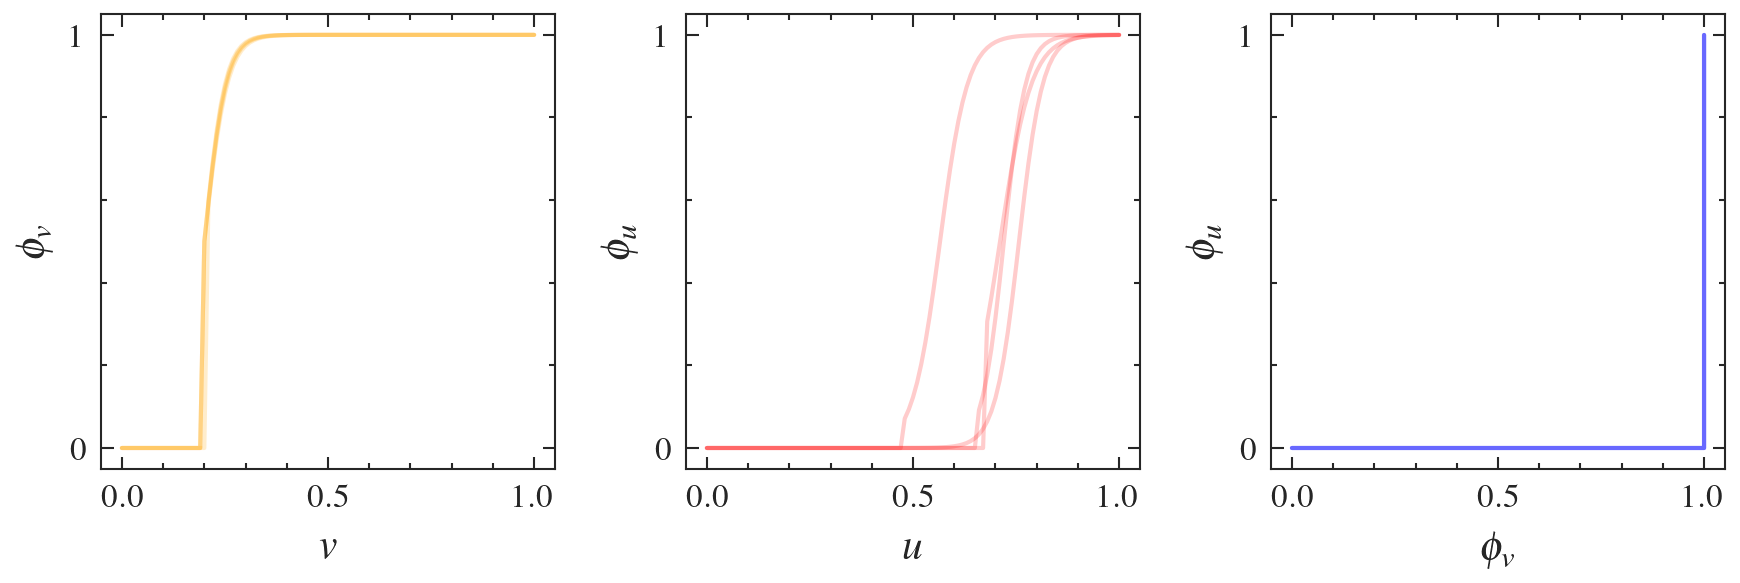

In [231]:
plt.style.use('science')  # Requires matplotlib-style package
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times', 'Computer Modern Roman'],
    'text.usetex': True,
    'axes.labelsize': 10,
    'font.size': 10,
    'legend.fontsize': 10,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8
})

fig, (axv, axu, axuv) = plt.subplots(1, 3, figsize=(6, 2))
fig.tight_layout(h_pad=0.1)
x = np.arange(0, 1+0.01, 0.01)

for i, prototype in enumerate(centroids_original):
    yv = utils.neural_response_func(x=x,
                         gain=prototype[2],
                         offset=prototype[3],
                         threshold=prototype[4])
    yu = utils.neural_response_func(x=x,
                         gain=prototype[5],
                         offset=prototype[6],
                         threshold=prototype[7])
    #z = (variables[-1].max() - prototype[-1, i])/(variables[-1].max() - variables[-1].min())
    z = 1
    axv.plot(x, yv, color='orange', alpha=0.2*z)
    axv.set_xlabel("$v$")
    axv.set_ylabel("$\phi_v$")
    axv.set_yticks((0, 1.))

    #
    axu.plot(x, yu, color='red', alpha=0.2*z)
    axu.set_xlabel("$u$")
    axu.set_ylabel("$\phi_u$")
    axu.set_yticks((0, 1.))

    #
    axuv.plot(yv, yu, color='blue', alpha=0.2*z)
    axuv.set_xlabel("$\phi_v$")
    axuv.set_ylabel("$\phi_u$")
    axuv.set_yticks((0, 1.))

plt.show()

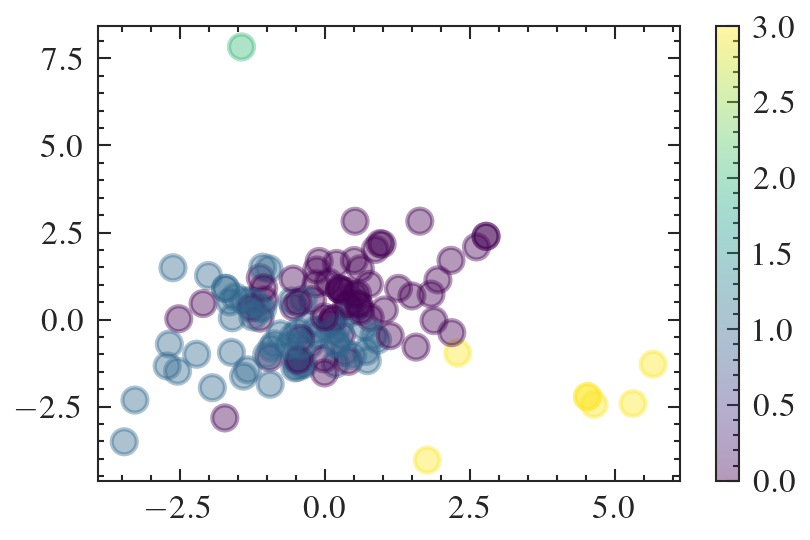

In [220]:
""" pca """
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering
clustering = AgglomerativeClustering(n_clusters=n_clusters)
labels = clustering.fit_predict(X_scaled)

#labels = variables[-1]

# Visualize clusters using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(3, 2))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, alpha=0.4, cmap='viridis')
#plt.title('Hierarchical Clustering Visualization')
plt.colorbar(scatter)
plt.tight_layout()
plt.show()

In [210]:
X_pca.shape

(128, 2)

In [209]:
""" db-scan """

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Parameter grid for DBSCAN
eps_range = np.linspace(0.1, 2.0, 20)
min_samples_range = range(2, 10)

best_silhouette = -1
best_labels = None
best_eps = None
best_min_samples = None

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        
        # Skip if all points in one cluster
        if len(np.unique(labels)) > 1:
            try:
                score = silhouette_score(X_scaled, labels)
                if score > best_silhouette:
                    best_silhouette = score
                    best_labels = labels
                    best_eps = eps
                    best_min_samples = min_samples
            except:
                pass

print(f"Best DBSCAN Parameters: eps={best_eps}, min_samples={best_min_samples}")


Best DBSCAN Parameters: eps=0.7999999999999999, min_samples=3


### PCA

In [41]:
mean_genome = np.zeros(len(variables_names))
for j in range(len(variables_names)):
    mean_genome[j] = variables[j, :].mean()

    variables[:, j] = (variables[:, j] - variables[:, j].mean())/variables[:, j].std()


#variables = (variables - variables.mean(axis=1).reshape(-1, 1))# / variables.std(axis=0).reshape(1, -1)
np.around(mean_genome, 2)

array([ 1.50630e+02,  1.34260e+02,  3.70500e+01,  1.90000e-01,
        4.70000e-01,  3.02400e+01,  6.40000e-01,  1.20000e-01,
        2.88000e+00,  5.83000e+00, -1.99000e+00,  5.22000e+00,
        7.40000e-01,  1.73000e+00,  5.98000e+00, -1.03000e+00,
        7.22000e+00,  4.00000e-02,  3.82000e+00,  1.71318e+03,
        1.39383e+03,  5.30000e-01])

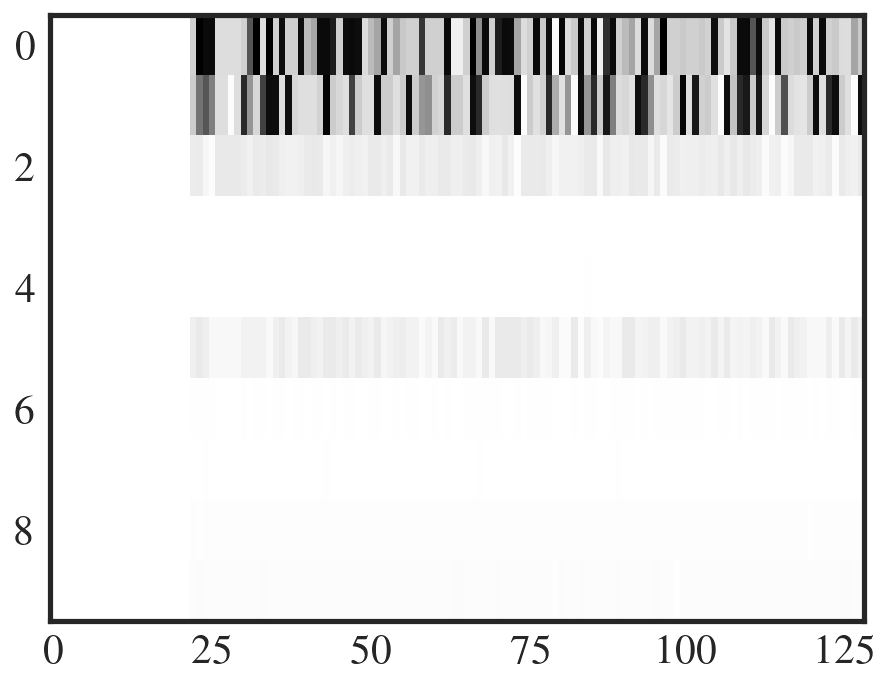

In [43]:
plt.imshow(variables[:10], aspect="auto");

In [61]:
# Example matrix of D variables (rows) for N samples (columns)
#D, N = 5, 100  # Example dimensions

# Standardize each row
scaler = StandardScaler()
data_standardized = scaler.fit_transform(variables.T).T


In [116]:
# Transpose data to shape (N, D) for PCA
pca = PCA(n_components=5)  # Choose number of principal components
principal_components = pca.fit_transform(variables.T)


In [118]:
principal_components.shape

(128, 5)

In [117]:
# View results
print("Principal Components:")
print(principal_components)

print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

Principal Components:
[[ 1.95205516e+03  6.95254864e-12 -1.23707611e-14  3.70202769e-42
   4.25367376e-45]
 [ 1.95205516e+03 -2.20830238e-13  1.53540722e-14  1.17213985e-27
  -5.49752150e-30]
 [ 1.95205516e+03 -2.20830238e-13  1.53540722e-14  1.75887432e-29
   8.46333287e-29]
 [ 1.95205516e+03 -2.20830238e-13  1.53540722e-14 -6.26172941e-29
  -4.16504248e-30]
 [ 1.95205516e+03 -2.20830238e-13  1.53540722e-14 -6.26172941e-29
  -4.16504248e-30]
 [ 1.95205516e+03 -2.20830238e-13  1.53540722e-14 -6.26172941e-29
  -4.16504248e-30]
 [ 1.95205516e+03 -2.20830238e-13  1.53540722e-14 -6.26172941e-29
  -4.16504248e-30]
 [ 1.95205516e+03 -2.20830238e-13  1.53540722e-14 -6.26172941e-29
  -4.16504248e-30]
 [ 1.95205516e+03 -2.20830238e-13  1.53540722e-14 -6.26172941e-29
  -4.16504248e-30]
 [ 1.95205516e+03 -2.20830238e-13  1.53540722e-14 -6.26172941e-29
  -4.16504248e-30]
 [ 1.95205516e+03 -2.20830238e-13  1.53540722e-14 -6.26172941e-29
  -4.16504248e-30]
 [ 1.95205516e+03 -2.20830238e-13  1.535407

In [98]:
# Transpose data to shape (N, D) for PCA
pca = PCA(n_components=2)  # Choose number of principal components
principal_components = pca.fit_transform(variables.T)

# View results
print("Principal Components:")
print(principal_components)

print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

Principal Components:
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0

/Users/daniekru/Research/codebase/myenvs/env_cl1/lib/python3.11/site-packages/sklearn/decomposition/_pca.py:543: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var


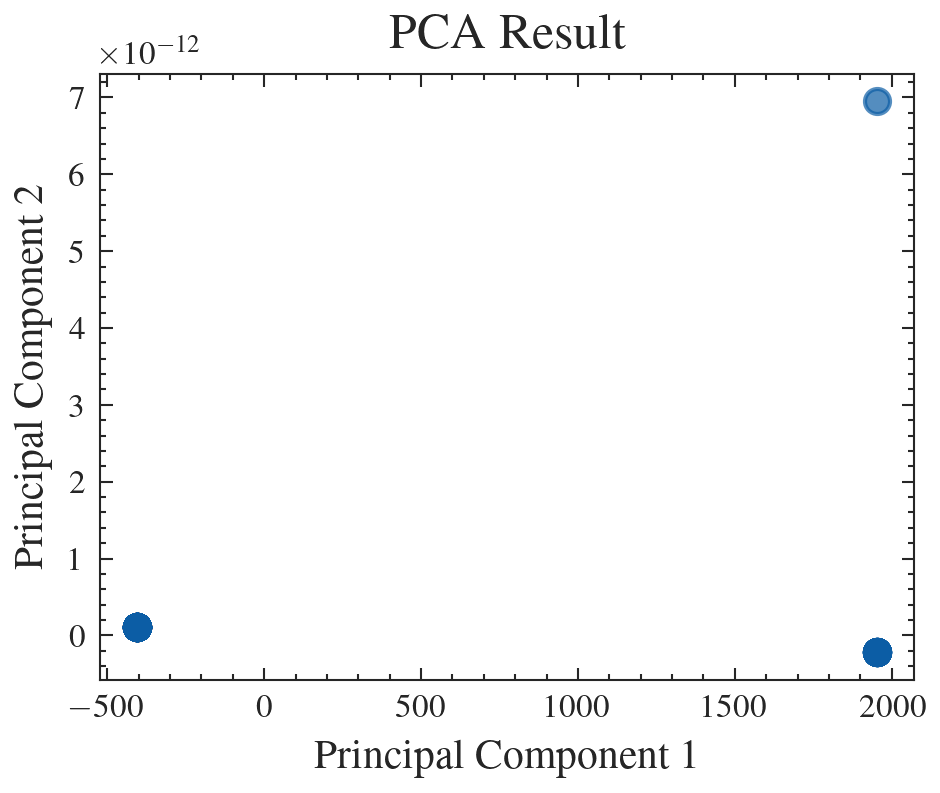

In [145]:
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Result")
plt.show()

### evolution test

In [476]:
fitness = 0.
nb_trials = 2
nb_rounds = 1000
nb_reps = 2
for env_type in tqdm(('v0', 'driftv0', 'sinv0')):

    # config-overwriting settings <<<< ! >>>>
    nb_rounds = 500 if env_type == "v0" else nb_rounds

    for K in (40, 200):

        env = envs.make_new_env(K=K,
                           env_type=env_type,
                           nb_trials=nb_trials)

        # initialize the genome
        params = evo_data['genome'].copy()
        params['K'] = K
        params['r'] = np.clip(params['r'], 0., 1.)
        params['r_lr'] = np.clip(params['r_lr'], 0., 1.)

        model = mm.Modelv2(**params)
        stats = envs.trial_multiple_models(models=[model],
                                   environment=env,
                                   nb_trials=nb_trials,
                                   nb_rounds=nb_rounds,
                                   nb_reps=nb_reps)

        fitness += stats["scores"].item()


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [05:23<00:00, 107.83s/it]


In [479]:
fitness/6

0.835

---
## **Other**

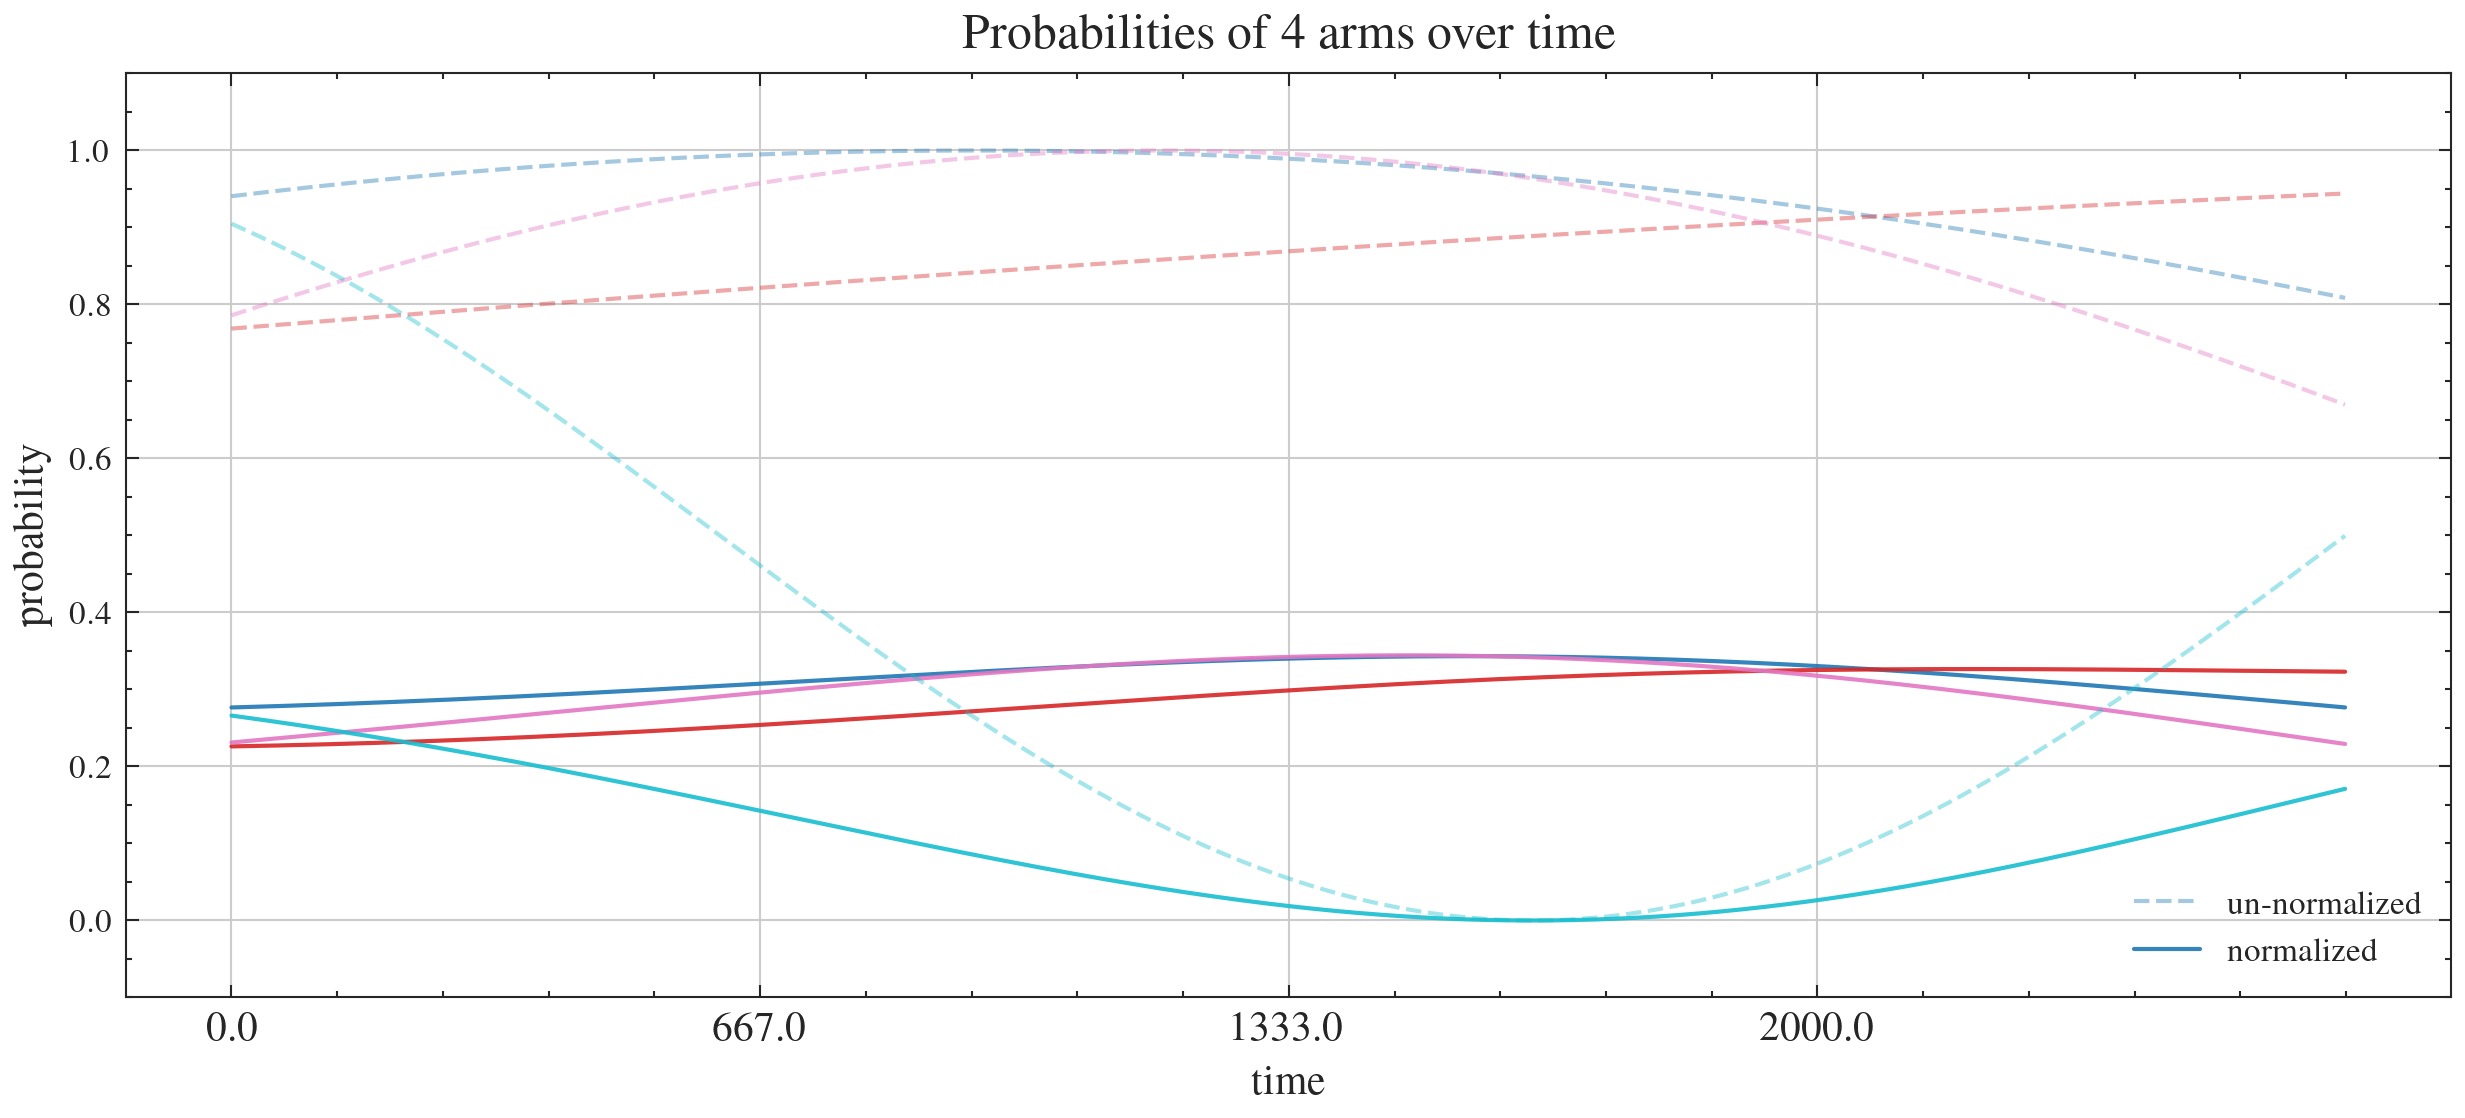

In [497]:
N = 4
#F = list(range(N))
H = np.zeros(N)

F = np.random.uniform(0.01, 0.4, N)
H = np.random.uniform(0, N, N)


x = np.arange(0, 2, 0.001)
y = np.zeros((len(F), len(x)))


fig, ax = plt.subplots(figsize=(10, 4))

for i in range(N):
    y[i] = 0.5*np.sin(2*np.pi*x*F[i] + H[i]) + 0.5

z = y/y.sum(axis=0)

colors = plt.cm.tab10(np.linspace(0, 1, N))

for i, (zi, yi) in enumerate(zip(z, y)):
    if i > 0:
        ax.plot(x, yi, linestyle='--', color=colors[i], alpha=0.4)
        ax.plot(x, zi, color=colors[i], alpha=0.9)
        continue
    ax.plot(x, yi, linestyle='--', color=colors[i], alpha=0.4,
           label="un-normalized")
    ax.plot(x, zi, color=colors[i], alpha=0.9, label="normalized")

ax.set_ylim((-0.1, 1.1))
xl = np.arange(0, max(x), 0.5)
ax.set_xticks(xl)
ax.set_xticklabels(np.around(np.linspace(0, len(x), len(xl)), 0))
ax.set_xlabel("time")
ax.set_ylabel("probability")
ax.set_title(f"Probabilities of {N} arms over time")
ax.grid()
ax.legend(loc="lower right")
plt.show()

In [78]:
xl

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [287]:
fig.savefig("paper/figures/kab_sinv0.png", dpi=500)
print("done")

done


In [311]:
a = np.arange(0, 10, 1)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [312]:
np.mode(a)

AttributeError: module 'numpy' has no attribute 'mode'

In [2]:
env = envs.KABsinv0(K=4, frequencies=list(range(4)), normalize=True)
print(env)

KABsinv0


In [40]:
args.K

5